# The Model

## Equations: overview

In what follows, we will not use the exact mean field reduction for BCs. The simulated dynamics are given by the following equations (microscopic level):

\\
Basket cells (QIF):

\begin{align*}
&\tau_m \dot{v}_{BC,j}(t) = v_{BC,j}(t)^2 + \tau_mJs(t) + g(v_{avg,BC}(t)-v_{BC,j}(t)) + \eta_j + w_{PFp,BC}PFp(t) + w_{PFm,BC}PFm(t), \\
&\tau_d \dot{s} = -s + r, \ j \in \{1, \ldots, N_{BC} \},
\end{align*}

with reset rule $v\geq 100 \Rightarrow v \leftarrow -100$.

\\
Purkinje cells (Izhikevich):

\begin{align*}
&\dot{v}_{PC,k}(t) = 0.04v_{PC,k}(t)^2 + 5v_{PC,k}(t) + 140 - u(t) + J_cs + w_{PFp,PC}PFp(t) + w_{PFm,PC}PFm(t) + I_{background}(t), \\
&\dot{u}_{k}(t) = a(bv_{PC,k}(t)-u_{k}(t)) \ k \in \{1, \ldots, N_{PC} \},
\end{align*}

with reset rule $v\geq 30 \Rightarrow v \leftarrow c$ and $u \leftarrow u+d,$

\\
where $w_{PFp}$ resp. $w_{PFm}$ represent the weights between the Parallel fibres PF+ resp. PF- and Basket cells / Purkinje cells. [see E. M. Izhikevich, "Simple model of spiking neurons," in IEEE Transactions on Neural Networks, vol. 14, no. 6, pp. 1569-1572, Nov. 2003, doi: 10.1109/TNN.2003.820440 & https://brainpy-examples.readthedocs.io/en/latest/neurons/Izhikevich_2003_Izhikevich_model.html].

\\
In the following configuration, 50% of BCs (neuron number 1 to 500) receive input from PF+ and 50% of BCs (neuron number 500 to 1000) receive input from PF-. PC1 and PC2 receive input from PF+. PC3 and PC4 receive input from PF-. All PCs receive a positive background input current ensuring intrinsic spiking.

### BC dynamics

Basket cells (QIF):

\begin{align*}
&\tau_m \dot{v}_{j}(t) = v_{j}(t)^2 + \tau_mJs(t) + g(v_{avg}(t)-v_{j}(t)) + \eta_j + PF(t), \\
&\tau_d \dot{s} = -s + r, \ j \in \{1, \ldots, N_{BC} \},
\end{align*}

with reset rule $v\geq v_{th}=100 \Rightarrow v \leftarrow v_r=-100$. We set $N_{BC}=1000, \tau_m=\tau_d=1, \bar{\eta}=0, \Delta=0.3, J= 0$ and $g=0.5$.

### PC dynamics

Purkinje cells (Izhikevich):

\begin{align*}
&\dot{v}_{k}(t) = 0.04v_{k}(t)^2 + 5v_{k}(t) + 140 - u(t) + J_cs + PF(t) + I_{background}(t), \\
&\dot{u}_{k}(t) = a(bv_{k}(t)-u_{k}(t)) \ k \in \{1, 2 \},
\end{align*}

with reset rule $v\geq v_{th}=30 \Rightarrow v \leftarrow c$ and $u \leftarrow u+d,$ and parameters $a=0.2, b=0.26, c=-65$ and $d=0$.

We consider type II excitability for PCs, as mentioned in https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1005000 (PC f-I curve is discontinuous).

#### Nullclines and Phase space

<ipython-input-1-c37ddff33cda>:25: RuntimeWarning: invalid value encountered in sqrt
  return (-5+np.sqrt(delta))/0.08
<ipython-input-1-c37ddff33cda>:29: RuntimeWarning: invalid value encountered in sqrt
  return (-5-np.sqrt(delta))/0.08


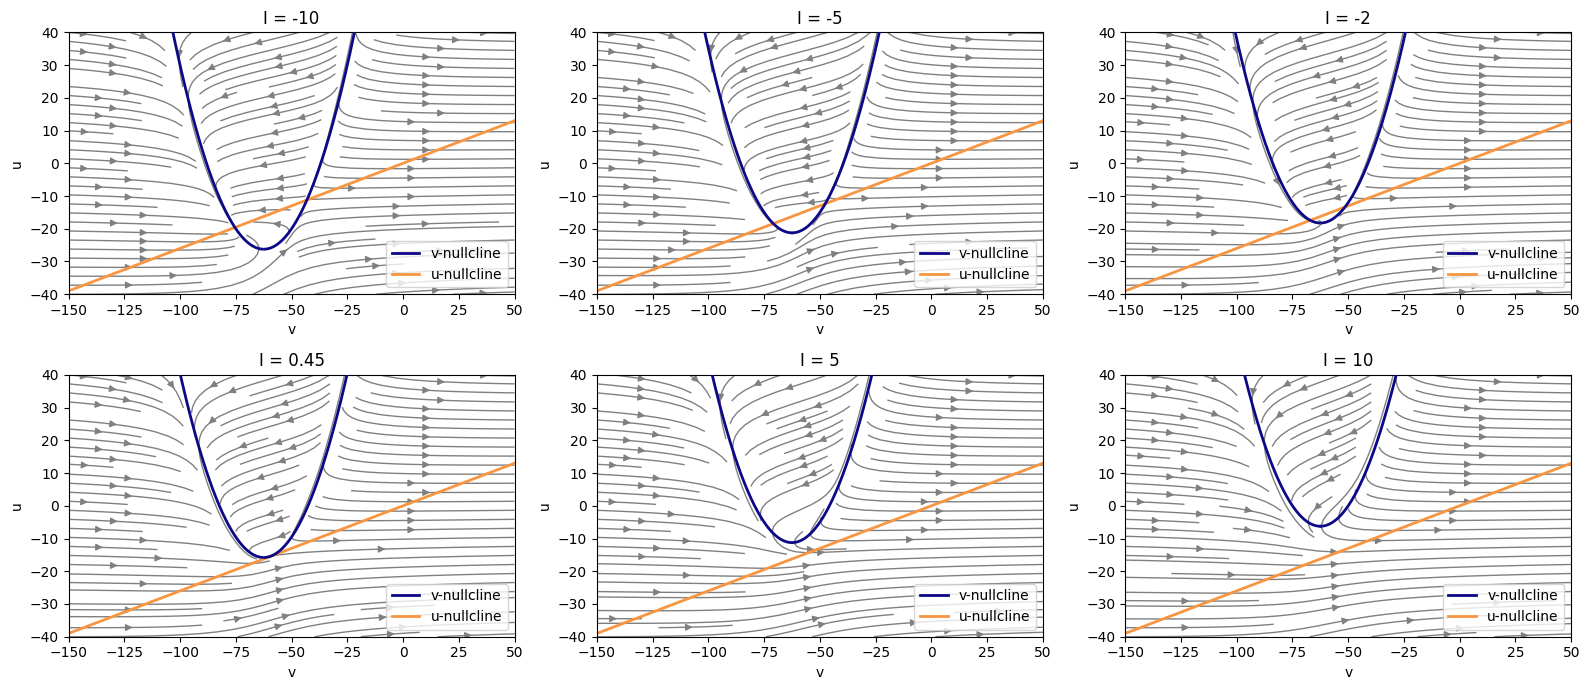

In [ ]:
from matplotlib import cm, rcParams
import matplotlib.pyplot as plt
import random as random
import math as math
import numpy as np
import os

# Range of r and v
v_min, v_max = -150, 50
u_min, u_max = -40, 40
# Matplotlib settings
plt.rc('axes', axisbelow=True)
# Parameters
a, b, c, d = 0.2, 0.26, -65, 0
inputs = [-10,-5,-2,0.45,5,10]
inputs[1], inputs[4] = inputs[4], inputs[1]
colors = plt.cm.plasma(np.linspace(0,0.75,len(inputs)))

# The nullclines
def u_nullcline(u) :
    return u/b

def v_nullcline_plus(u, I) :
    delta = 25-0.16*(140-u+I)
    return (-5+np.sqrt(delta))/0.08

def v_nullcline_minus(u, I) :
    delta = 25-0.16*(140-u+I)
    return (-5-np.sqrt(delta))/0.08

U = np.linspace(u_min, u_max, 5000)
V = np.linspace(v_min, v_max, 5000)
Vv, Uv = np.meshgrid(V, U)
U_point = a*(b*Vv-Uv)

fig, ax = plt.subplots(2, 3, figsize=(16,7))
for k in range(len(inputs)):
    V_point = 0.04*Vv**2 + 5*Vv + 140 - Uv + inputs[k]
    i, j = k%2, k%3

    #speed = np.sqrt(U_point**2 + V_point**2)
    #plt.pcolor(Vv, Uv, np.log10(speed), cmap='viridis')
    ax[i,j].streamplot(V, U, V_point, U_point, linewidth=1, color='grey', density=1)

    # Plotting the nullclines
    u = np.linspace(u_min, u_max, 5000)
    ax[i,j].set_ylim(u_min, u_max)
    ax[i,j].set_xlim(v_min, v_max)
    ax[i,j].set_xlabel('v')
    ax[i,j].set_ylabel('u')
    ax[i,j].plot(v_nullcline_plus(u, inputs[k]), u, linewidth=2, c=colors[0], label=f'v-nullcline', zorder=10)
    ax[i,j].plot(v_nullcline_minus(u, inputs[k]), u, linewidth=2, c=colors[0], zorder=10)
    ax[i,j].plot(u_nullcline(u), u, c=colors[-1], linewidth=2, label='u-nullcline')
    ax[i,j].set_title(f'I = {inputs[k]}')
    ax[i,j].legend()

plt.tight_layout()
plt.show()

#### Simulation under positive input

100%|██████████| 119999/119999 [00:00<00:00, 517895.18it/s]


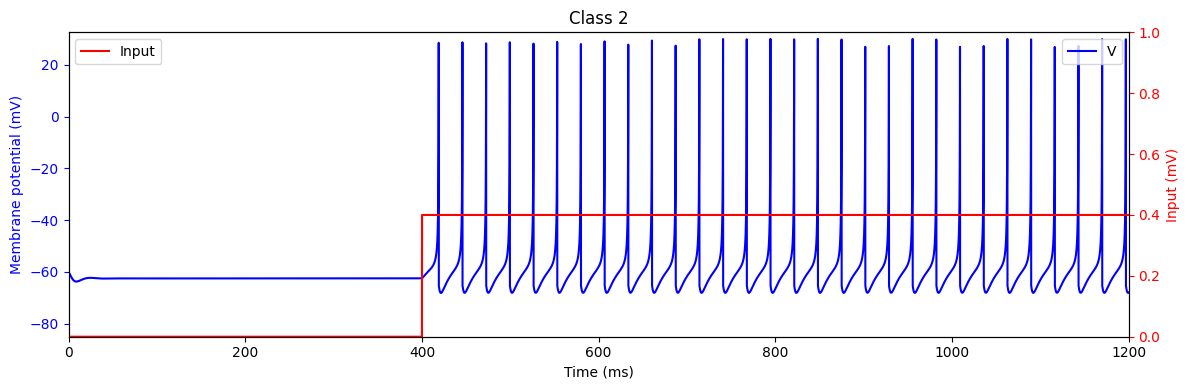

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math, jax, tqdm

STEP = 0.01
a, b, c, d = 0.2, 0.26, -65, 0

def create_input(values, durations):
    input = []
    for k in range(len(values)):
        for t in np.arange(0, durations[k], STEP):
            input.append(values[k])
    return np.array(input)


current = create_input(values=[0., 0.4, 0.4], durations=[400, 400, 400])

def QIF(v, u, I):
    dv = 0.04*v**2 + 5*v + 140 - u + I
    du = a*(b*v-u)
    return dv, du

def make_step(v, u, I):
    dv, du = QIF(v, u, I)
    v_next, u_next = v + STEP*dv, u + STEP*du
    if v_next >= 30:
        v_next = c
        u_next = u_next + d
    return v_next, u_next

def run(v, u):
    for t in tqdm.tqdm(range(0, len(current)-1)):
        # Compute next value of BCs and PCs
        v_next, u_next = make_step(v[-1], u[-1], current[t])
        # Update values
        v.append(v_next)
        u.append(u_next)
    return v, u

v, u = [-60], [-15.4]
v, u = run(v, u)
times = np.arange(0, int(len(current)*STEP), STEP)

fig, ax1 = plt.subplots(figsize=(12, 4))
plt.title('Class 2')
ax1.plot(times, v, 'b', label='V')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color='b')
ax1.set_xlim(-0.1, int(len(current)*STEP)+0.1)
ax1.set_ylim(-85,32.5)
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(times, current, 'r', label='Input')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Input (mV)', color='r')
ax2.set_ylim(0, 1)
ax2.tick_params('y', colors='r')

#ax3 = ax1.twinx()
#ax3.plot(times, u, 'purple', label='Input')
#ax3.set_xlabel('Time (ms)')
#ax3.set_ylabel('Adaptation', color='purple')
#ax3.set_ylim(-85,32.5)
#ax3.tick_params('y', colors='purple')

ax1.legend(loc=1)
ax2.legend(loc=2)

#plt.plot(v, u)

fig.tight_layout()
plt.show()

#### f-I curve

In [ ]:
from jax import jit, numpy as jnp
import numpy as np
import math, jax, tqdm, os, matplotlib, random
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams
from scipy.signal import find_peaks

# Parameters
T = 400
STEP = 1e-3

# PC properties: class 1 Izhikevich neuron
a = 0.2
b = 0.26
c = -65
d = 0

''' PURKINJE CELL SIMULATION '''
def Izh_PC(v, u, I):
    dv = 0.04*v**2 + 5*v + 140 - u + I
    du = a*(b*v-u)
    return dv, du

def make_step_PC(v, u, I):
    dv, du = Izh_PC(v, u, I)
    v_next, u_next = v + STEP*dv, u + STEP*du

    if v_next >= 30:
        v_next = c
        u_next = u_next + d

    return v_next, u_next

def run(I):
    # Initialize lists
    v_PC_list = []
    u_PC_list = []

    # Initialize BCs
    v_BC, r_BC, s_BC = 0, 0, 0.1

    # Initialize PCs
    v_PC = -60
    u_PC = 0

    for t in tqdm.tqdm(np.arange(0, T, STEP)):
        # Save PC values to list
        v_PC_list.append(v_PC)
        u_PC_list.append(u_PC)

        # Compute next value of BCs and PCs
        v_next_PC, u_next_PC = make_step_PC(v_PC, u_PC, I)

        # Update values
        v_PC, u_PC =  v_next_PC, u_next_PC

    return v_PC_list[int(3*T/(STEP*4)):]

Fr = []
inputs = np.linspace(0, 4, 100)
for I in inputs:
    v_PC = run(I)
    peaks, _ = find_peaks(v_PC, height=0.1)

    if len(peaks) > 1:
        # Period
        Period = peaks[-1] - peaks[-2]
        # Frequency
        fq = 1/Period*10**6
    else:
        fq = 0

    Fr.append(fq)

100%|██████████| 400000/400000 [00:00<00:00, 526574.65it/s]


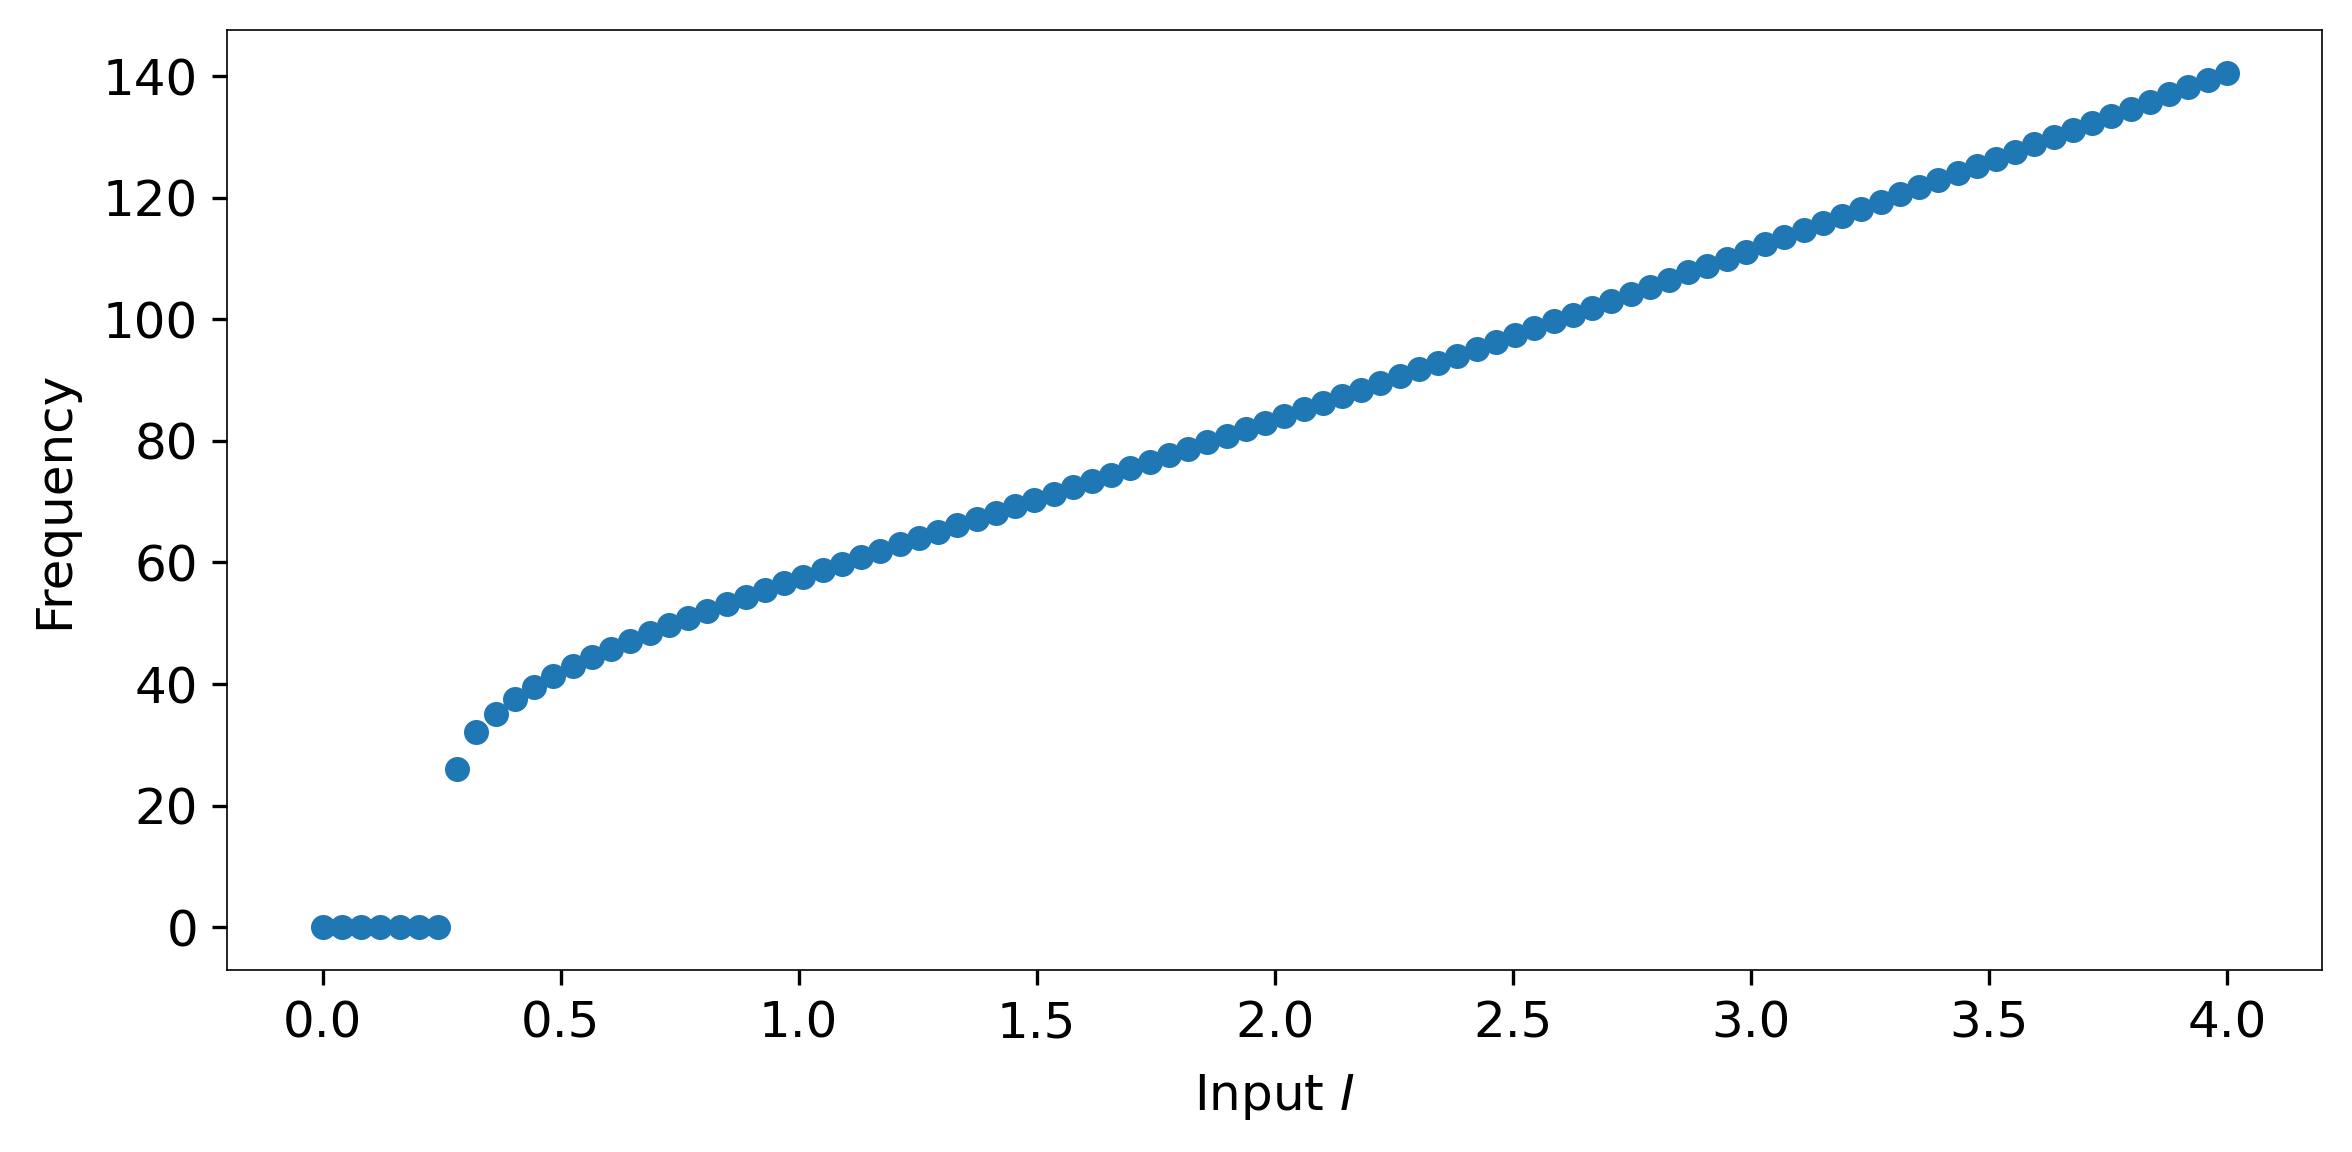

In [ ]:
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 12#9
plt.rcParams['legend.fontsize'] = 12#7.
plt.rcParams['lines.markersize'] = 5
plt.rcParams['axes.labelsize'] = 12#9
plt.rcParams['axes.labelpad'] = 6
plt.rcParams['axes.linewidth'] = '0.4'
plt.rcParams['font.serif'] = 'Helvetica'
plt.rc('axes', axisbelow=True)
plt.rcParams['figure.dpi'] = 300

plt.figure(figsize=(8,4))
plt.xlabel('Input $I$')
plt.ylabel('Frequency')

plt.scatter(inputs, Fr)

plt.tight_layout()
plt.show()

# Toy Model 1 (PF & BC)

We begin by trying to synchronize two PCs through co-activation of PF and BC input.

## Common libraries, parameters and functions

In [ ]:
from jax import jit, numpy as jnp
import numpy as np
import math, jax, tqdm, os, matplotlib, random
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams

# PC properties: class 1 Izhikevich neuron
a = 0.2
b = 0.26
c = -65
d = 0

''' BASKET CELL SIMULATION '''
def Analytical_BC(v, r, s, I):
    r_dot = ( delta/(tau_m*math.pi) + 2*r*v - g*r )/tau_m
    v_dot = ( v**2 + eta_mean + I - (math.pi*tau_m*r)**2 )/tau_m
    s_dot = ( -s + r )/tau_d

    return v_dot, r_dot, s_dot

def make_step_BC(v, r, s, I):
    dv, dr, ds = Analytical_BC(v, r, s, I)
    v_next = v + STEP*dv
    r_next = r + STEP*dr
    s_next = s + STEP*ds

    return v_next, r_next, s_next

''' PURKINJE CELL SIMULATION '''
def Izh_PC(v, u, I):
    dv = 0.04*v**2 + 5*v + 140 - u + I
    du = a*(b*v-u)

    return dv, du

def make_step_PC(v, u, I):
    dv, du = Izh_PC(v, u, I)
    v_next, u_next = v + STEP*dv, u + STEP*du

    if isinstance(v, np.ndarray):
        v_next[v_next >= 30] = c
        u_next[v_next >= 30] = u[v_next >= 30] + d
    else:
        if v_next >= 30:
            v_next = c

    return v_next, u_next

def create_input(values, durations, STEP=1e-3):
    input = []
    for k in range(len(values)):
        for t in np.arange(0, durations[k], STEP):
            input.append(values[k])

    return np.array(input)

## Setting ICs

In [ ]:
def initial_conditions(T, STEP, g, Jc, eta_mean, delta, tau_m, tau_d, I_background):
    v_BC_track, r_BC_track, s_BC_track =[], [], []
    v_PC_IC, u_PC_IC = [], []

    # Arbitrarily initialize BCs
    v_BC, r_BC, s_BC = 0, 0, 0

    # Arbitrarily initialize PC
    v_PC = -60
    u_PC = 0

    for t in tqdm.tqdm(np.arange(0, T, STEP)):
        v_BC_track.append(v_BC)
        r_BC_track.append(r_BC)
        s_BC_track.append(s_BC)
        v_PC_IC.append(v_PC)
        u_PC_IC.append(u_PC)

        # Input to PC
        I_PC = Jc*s_BC + I_background[int(t/STEP)-1]

        # Input to BCs
        I_BC = 0

        # Compute next value of BCs and PCs
        v_next_BC, r_next_BC, s_next_BC = make_step_BC(v_BC, r_BC, s_BC, I_BC)
        v_next_PC, u_next_PC = make_step_PC(v_PC, u_PC, I_PC)

        # Update values
        v_BC, v_PC = v_next_BC, v_next_PC
        u_PC, r_BC, s_BC = u_next_PC, r_next_BC, s_next_BC

    v_PC_IC, u_PC_IC = np.array(v_PC_IC), np.array(u_PC_IC)
    spikes = np.where(v_PC_IC == c)[0]
    T1, T2 = spikes[-1], spikes[-2]
    inc = int((T2-T1)/2)
    return np.array([v_PC_IC[T1], v_PC_IC[T1+inc]]), np.array([u_PC_IC[T1], u_PC_IC[T1+inc]]), np.array([v_BC, r_BC, s_BC])

## Mechanism 1: silencing PCs

In [ ]:
# Parameters
STEP = 1e-3
VR = -100
VP = 100

# Number of neurons in BCs, PCs
N = [1000, 2]

# Electrical coupling strength in BCs
g = 3

# Cross chemical coupling strength between BCs and PC
Jc = -10

# BC properties
tau_m = 1
tau_d = 1
eta_mean = 0
delta = .3

# Parameters
values = [0, 1, 0, 1, 0] #, 0.5, 0, 0.5, 0]
durations = [90, 20, 90, 20, 100] #, 10, 100, 10, 100]
T = sum(durations)

PF = create_input(values, durations)
I_background = 2*np.ones(int(T/STEP))

# Initial conditions
v_PC_ICs, u_PC_ICs, BC_ICs = initial_conditions(T, STEP, g, Jc, eta_mean, delta, tau_m, tau_d, I_background)


''' RUN THE SIMULATIONS OF BCs and PCs '''
def run():
    # Initialize BCs
    v_BC, r_BC, s_BC = BC_ICs[0], BC_ICs[1], BC_ICs[2]
    # Initialize PCs
    v_PC = v_PC_ICs
    u_PC = u_PC_ICs

    print(type(v_PC))

    for t in tqdm.tqdm(np.arange(0, T, STEP)):
        # Save PC values to list
        for n in range(N[1]):
            v_PC_list[n].append(v_PC[n])
            u_PC_list[n].append(u_PC[n])

        # Save BC values to list
        r_BC_list.append(r_BC)
        v_BC_list.append(v_BC)
        s_BC_list.append(s_BC)

        # Input to PCs
        I_PC = Jc*s_BC + PF[int(t/STEP)-1] + I_background[int(t/STEP)-1]

        # Input to BCs
        I_BC = PF[int(t/STEP)-1]

        # Compute next value of BCs and PCs
        v_next_BC, r_next_BC, s_next_BC = make_step_BC(v_BC, r_BC, s_BC, I_BC)
        v_next_PC, u_next_PC = make_step_PC(v_PC, u_PC, I_PC)

        # Update values
        v_PC, u_PC =  v_next_PC, u_next_PC
        v_BC, r_BC, s_BC = v_next_BC, r_next_BC, s_next_BC

''' MAIN '''
v_BC_list = []
r_BC_list = []
s_BC_list = []
v_PC_list = [[] for k in range(N[1])]
u_PC_list = [[] for k in range(N[1])]
raster_index = []
raster_time = []

run()

100%|██████████| 320000/320000 [00:01<00:00, 275719.41it/s]


<class 'numpy.ndarray'>


100%|██████████| 320000/320000 [00:09<00:00, 32897.02it/s]


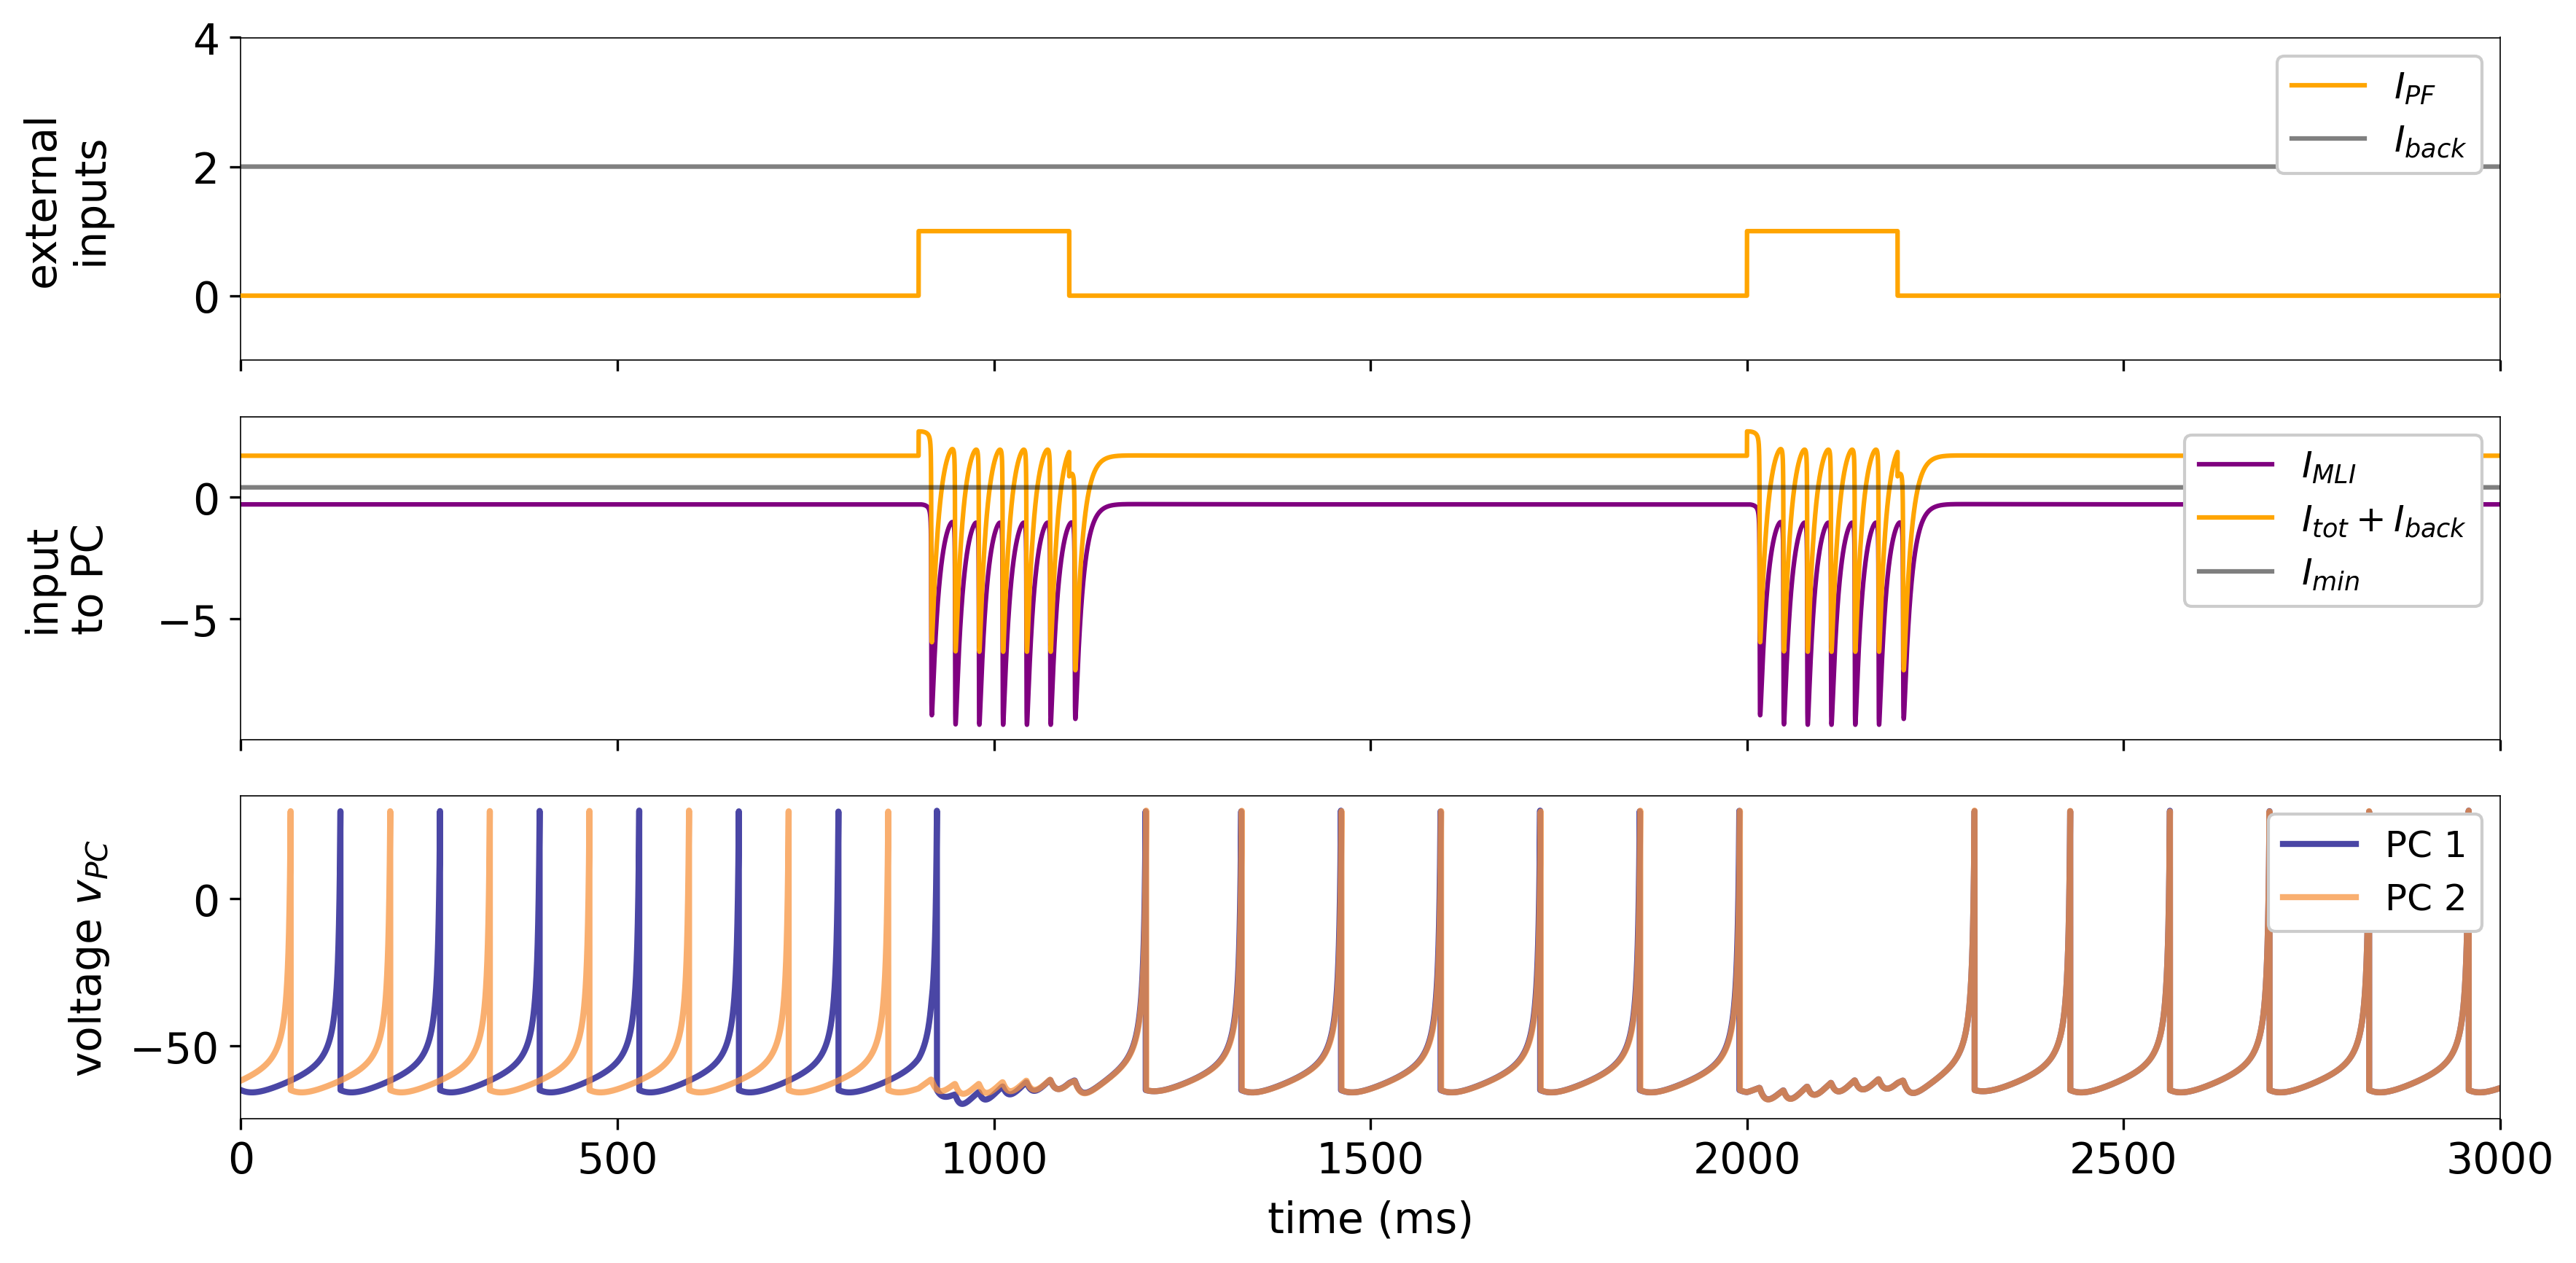

In [ ]:
from matplotlib.ticker import FormatStrFormatter
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 14#9
plt.rcParams['legend.fontsize'] = 12#7.
plt.rcParams['lines.markersize'] = 5
plt.rcParams['axes.labelsize'] = 14#9
plt.rcParams['axes.labelpad'] = 6
plt.rcParams['axes.linewidth'] = '0.4'
plt.rcParams['font.serif'] = 'Helvetica'
plt.rc('axes', axisbelow=True)
plt.rcParams['figure.dpi'] = 300

# Generating subplots
fig, ax = plt.subplots(3, 1, figsize=(12,6), sharex=True)
color = plt.cm.plasma(np.linspace(0,0.75,N[1]))

# Plotting injected current I
times = [float(STEP*k) for k in range(len(PF))]
t_min = int(2*len(times)/3)*0
ax[0].plot(times[t_min:], PF[t_min:], color='orange', label='$I_{PF}$', zorder=10)
ax[0].plot(times[t_min:], I_background[t_min:], color='grey', label=r'$I_{back}$')
ax[0].set_ylabel('external\ninputs')
ax[0].set_ylim(-1, 4)
ax[0].legend(loc='upper right', framealpha=1)

# Plotting output of BCs
times_v = [float(STEP*k) for k in range(len(v_BC_list))]
t_min = int(2*len(times_v)/3)*0
ax[1].plot(times_v[t_min:], Jc*np.array(s_BC_list)[t_min:], c='purple', label=r'$I_{MLI}$')
ax[1].plot(times_v[t_min:], Jc*np.array(s_BC_list)[t_min:] + PF[t_min:] + I_background[t_min:], c='orange', label=r'$I_{tot} + I_{back}$')
ax[1].plot(times_v, 0.4*np.ones_like(s_BC_list), c='k', alpha=.5, label=r'$I_{min}$')
ax[1].set_ylabel('input\nto PC')
ax[1].legend(loc='upper right', framealpha=1)

# Plotting voltage average of BCs
# Plotting voltage of PCs
for n in range(N[1]):
    ax[2].plot(times_v, v_PC_list[n], label=f'PC {n+1}', linestyle='-', linewidth=2, alpha=.75, c=color[n])
ax[2].set_ylabel(r'voltage $v_{PC}$')
ax[2].set_xlabel('time (ms)')
ax[2].tick_params('y', colors='k')
ax[2].legend(loc=1, framealpha=1)
ax[2].set_xlim(0,300)
ax[2].set_xticks(ax[2].get_xticks(), np.array([el*10 for el in ax[2].get_xticks()]).astype(int))

fig.align_ylabels(ax)
plt.show()

## Mechanism 2: phase-locking

In [ ]:
from jax import jit, numpy as jnp
import numpy as np
import math, jax, tqdm, os, matplotlib, random
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams

# Parameters
T = 400
STEP = 1e-3
VR = -100
VP = 100

# Number of neurons in BCs, PCs
N = [1000, 2]

# Electrical coupling strength in BCs
g = 1 #2.56

# Cross chemical coupling strength between BCs and PC
Jc = -8 #-13.89

# BC properties
tau_m = 3.5 #3.78
tau_d = 1 #3.55555555555555
eta_mean = 0
delta = .3

I_background = 2*np.ones(int(T/STEP)) #3*np.ones(int(T/STEP))
PF = 0*np.ones_like(I_background)
PF[int(3*T/(12*STEP)):int(5*T/(12*STEP))] = 1 #1.5

# Initial conditions
v_PC_ICs, u_PC_ICs, BC_ICs = initial_conditions(T, STEP, g, Jc, eta_mean, delta, tau_m, tau_d, I_background)

''' RUN THE SIMULATIONS OF BCs and PCs '''
def run():
    # Initialize BCs
    v_BC, r_BC, s_BC = BC_ICs[0], BC_ICs[1], BC_ICs[2]

    # Initialize PCs
    v_PC = v_PC_ICs
    u_PC = u_PC_ICs

    for t in tqdm.tqdm(np.arange(0, T, STEP)):
        # Save PC values to list
        for n in range(N[1]):
            v_PC_list[n].append(v_PC[n])
            u_PC_list[n].append(u_PC[n])

        # Save BC values to list
        r_BC_list.append(r_BC)
        v_BC_list.append(v_BC)
        s_BC_list.append(s_BC)

        # Input to PCs
        I_PC = Jc*s_BC + PF[int(t/STEP)-1] + I_background[int(t/STEP)-1]

        # Input to BCs
        I_BC = PF[int(t/STEP)-1]

        # Compute next value of BCs and PCs
        v_next_BC, r_next_BC, s_next_BC = make_step_BC(v_BC, r_BC, s_BC, I_BC)
        v_next_PC, u_next_PC = make_step_PC(v_PC, u_PC, I_PC)

        # Update values
        v_PC, u_PC =  v_next_PC, u_next_PC
        v_BC, r_BC, s_BC = v_next_BC, r_next_BC, s_next_BC

''' MAIN '''
v_BC_list = []
r_BC_list = []
s_BC_list = []
v_PC_list = [[] for k in range(N[1])]
u_PC_list = [[] for k in range(N[1])]
raster_index = []
raster_time = []

run()

100%|██████████| 400000/400000 [00:20<00:00, 19663.31it/s]


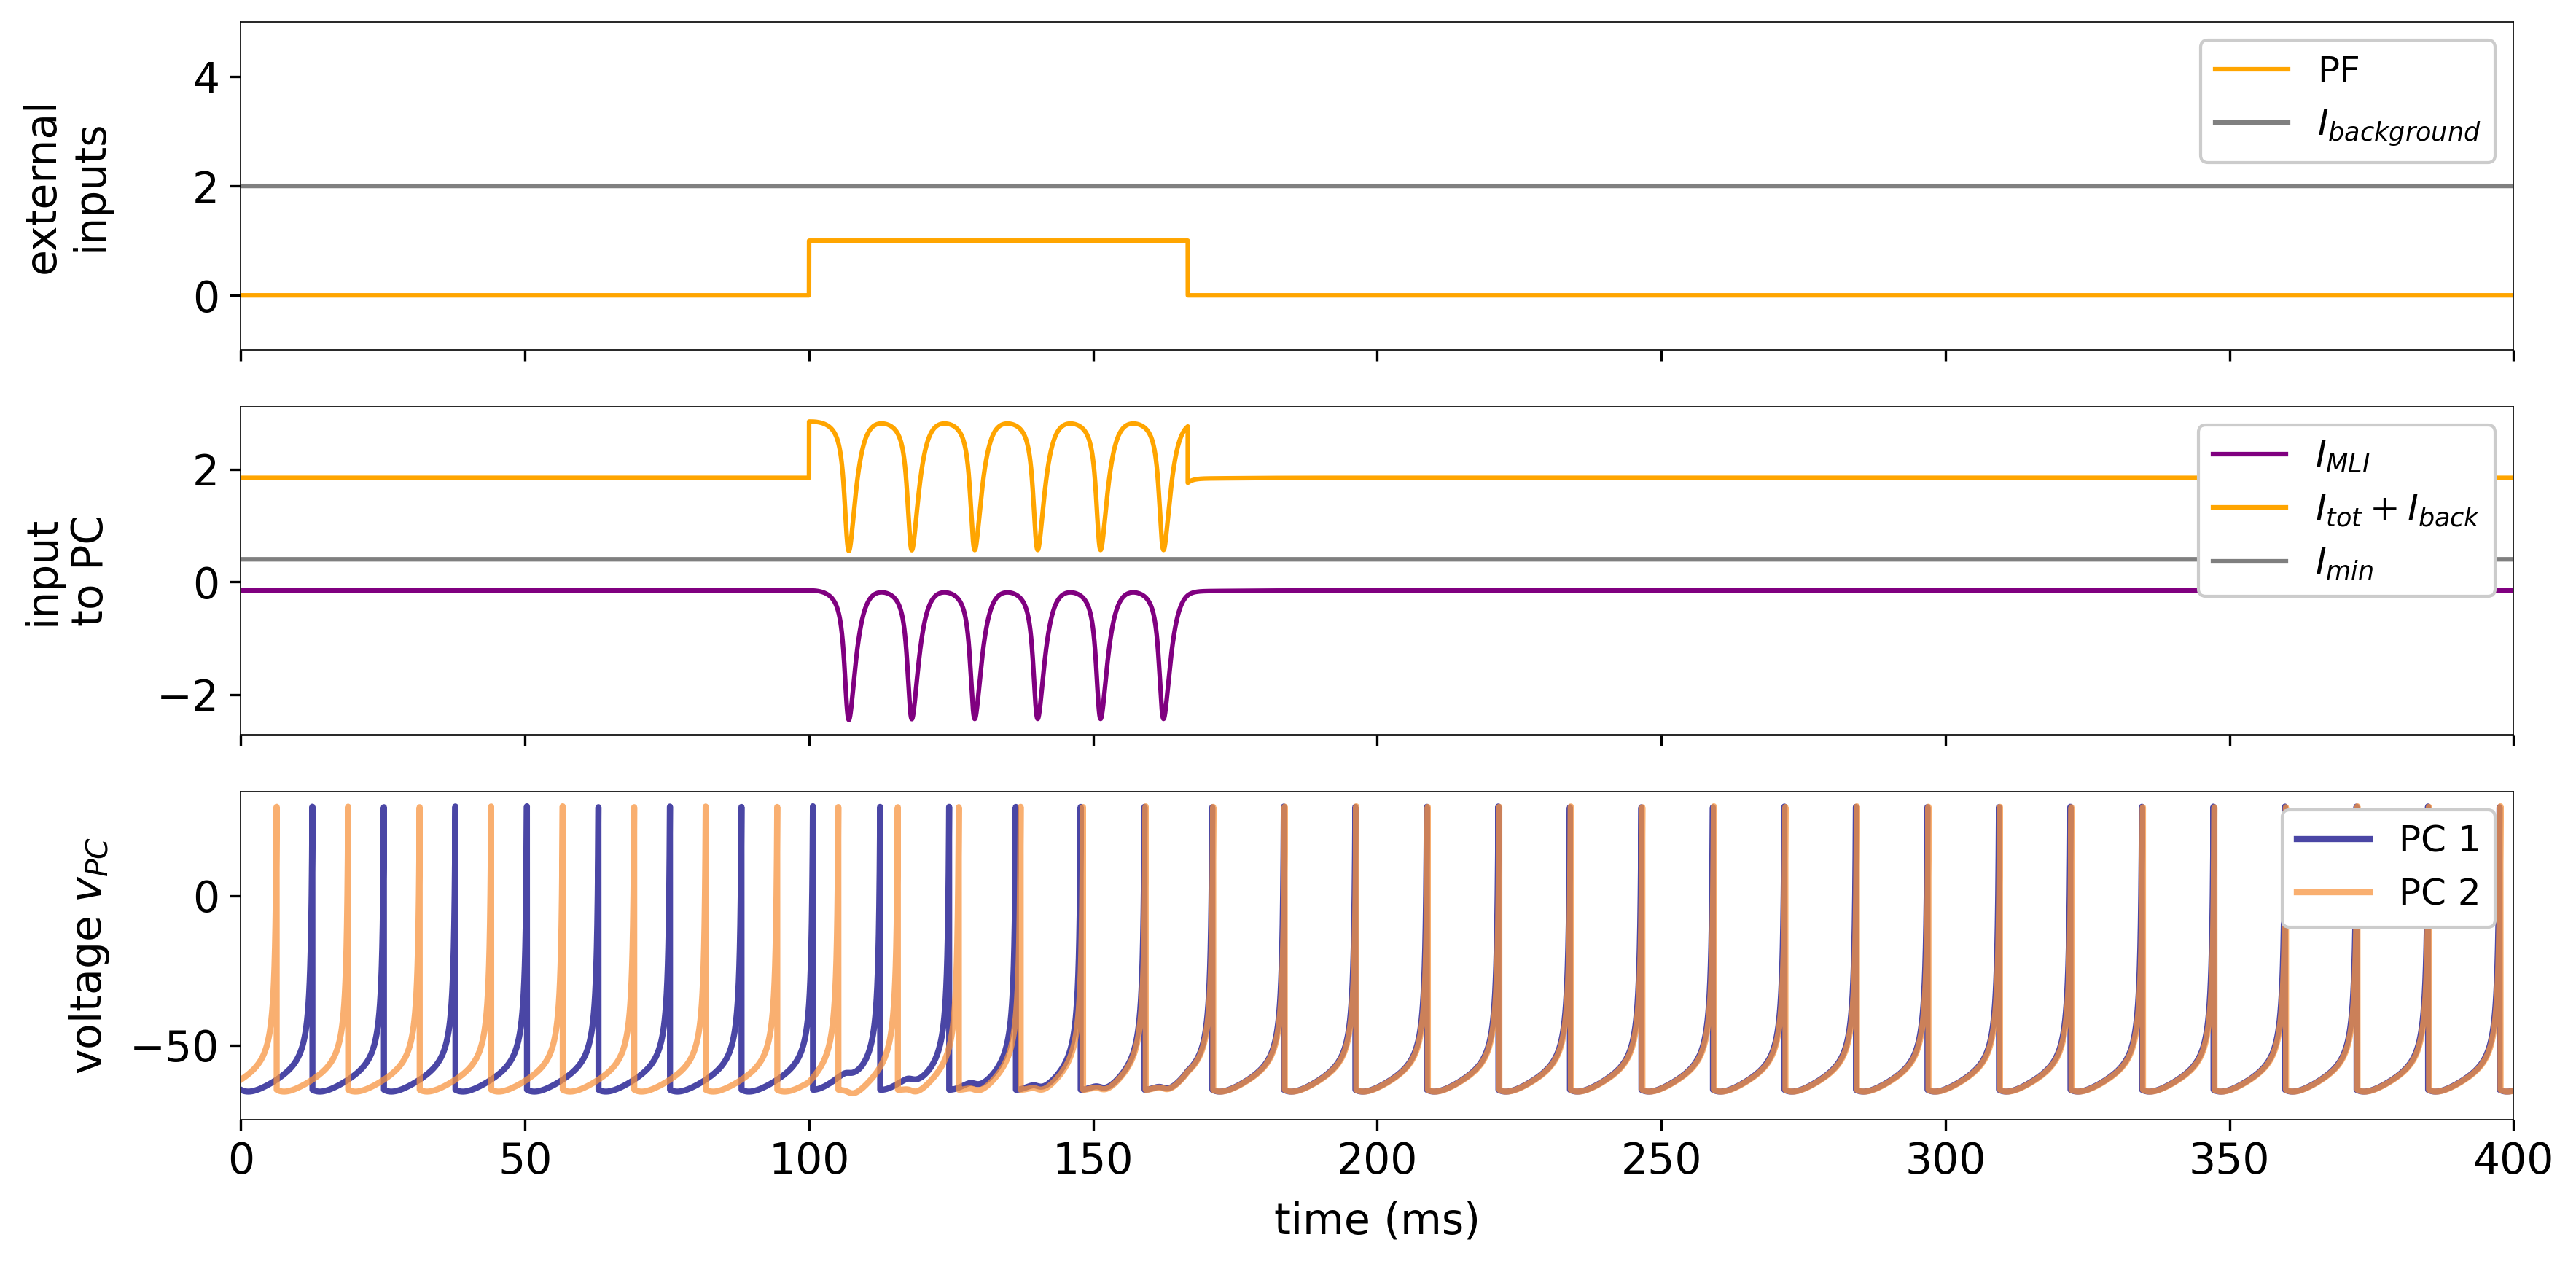

In [ ]:
# Generating subplots
fig, ax = plt.subplots(3, 1, figsize=(12,6), sharex=True)
color = plt.cm.plasma(np.linspace(0,0.75,N[1]))

# Plotting injected current I
times = [float(STEP*k) for k in range(len(PF))]
t_min = int(2*len(times)/3)*0
ax[0].plot(times[t_min:], PF[t_min:], color='orange', label='PF', zorder=10)
ax[0].plot(times[t_min:], I_background[t_min:], color='grey', label=r'$I_{background}$')
ax[0].set_ylabel('external\ninputs')
ax[0].set_ylim(-1, 5)
ax[0].legend(loc='upper right', framealpha=1)

# Plotting output of BCs
times_v = [float(STEP*k) for k in range(len(v_BC_list))]
t_min = int(2*len(times_v)/3)*0
ax[1].plot(times_v[t_min:], Jc*np.array(s_BC_list)[t_min:], c='purple', label=r'$I_{MLI}$')
ax[1].plot(times_v[t_min:], Jc*np.array(s_BC_list)[t_min:] + PF[t_min:] + I_background[t_min:], c='orange', label=r'$I_{tot} + I_{back}$')
ax[1].plot(times_v, 0.4*np.ones_like(s_BC_list), c='k', alpha=.5, label=r'$I_{min}$')
ax[1].set_ylabel('input\nto PC')
ax[1].legend(loc='upper right', framealpha=1)
'''
# Plotting voltage average of BCs
#ax[2].plot(times_v[t_min:], v_BC_list[t_min:], c='k', label='BCs')
ax[2].plot(times_v[t_min:], Jc*np.array(s_BC_list)[t_min:], c='k', label='BCs')
ax[2].set_ylabel(r'Voltage')
ax[2].set_xlabel('Time (ms)')
ax[2].set_ylim(-5, 0)
ax[2].tick_params('y', colors='k')

ax2 = ax[2].twinx()
# Plotting voltage of PCs
for n in range(N[1]):
    ax2.plot(times_v[t_min:], v_PC_list[n][t_min:], label=f'PC {n+1}', linestyle='-', linewidth=2, alpha=.75, c=color[n])
ax2.set_ylim(-75, 35)
ax2.tick_params('y', colors='r')

ax[2].legend(loc=1)
ax2.legend(loc=2)
'''
# Plotting voltage of PCs
for n in range(N[1]):
    ax[2].plot(times_v[t_min:], v_PC_list[n][t_min:], label=f'PC {n+1}', linestyle='-', linewidth=2, alpha=.75, c=color[n])
ax[2].set_ylim(-75, 35)
ax[2].legend(loc=1, framealpha=1)
ax[2].set_ylabel(r'voltage $v_{PC}$')
ax[2].set_xlabel('time (ms)')
ax[2].set_xlim(0, T)

fig.align_ylabels(ax)
plt.show()

# Toy Model 2 (PF1 & PF2)

## Common libraries, parameters and functions

In [ ]:
from jax import jit, numpy as jnp
import numpy as np
import math, jax, tqdm, os, matplotlib, random
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams
from matplotlib.colors import ListedColormap

# PC properties: class 1 Izhikevich neuron
a = 0.2
b = 0.26
c = -65
d = 0

''' BASKET CELL SIMULATION '''
def Analytical_BC(v, r, s, I):
    r_dot = ( delta/(tau_m*math.pi) + 2*r*v - g*r )/tau_m
    v_dot = ( v**2 + eta_mean + I - (math.pi*tau_m*r)**2 )/tau_m
    s_dot = ( -s + r )/tau_d
    return v_dot, r_dot, s_dot

def make_step_BC(v, r, s, I):
    dv, dr, ds = Analytical_BC(v, r, s, I)
    v_next = v + STEP*dv
    r_next = r + STEP*dr
    s_next = s + STEP*ds

    return v_next, r_next, s_next

''' PURKINJE CELL SIMULATION '''
def Izh_PC(t, v, u, I):
    dv = 0.04*v**2 + 5*v + 140 - u + I
    du = a*(b*v-u)
    return dv, du

def make_step_PC(t, v, u, I):
    dv, du = Izh_PC(t, v, u, I)
    v_next, u_next = v + STEP*dv, u + STEP*du

    if isinstance(v, np.ndarray):
        v_next[v_next >= 30] = c
        u_next[v_next >= 30] = u[v_next >= 30] + d
    else:
        if v_next >= 30:
            v_next = c

    return v_next, u_next

def create_input(values, durations, STEP=1e-3):
    input = []
    for k in range(len(values)):
        for t in np.arange(0, durations[k], STEP):
            input.append(values[k])
    return np.array(input)

## Setting ICs

In [ ]:
def initial_conditions(T, STEP, g, Jc, eta_mean, delta, tau_m, tau_d, I_background):
    v_BC_track, r_BC_track, s_BC_track =[], [], []
    v_PC_IC, u_PC_IC = [], []

    # Arbitrarily initialize BCs
    v_BC, r_BC, s_BC = 0, 0, 0

    # Arbitrarily initialize PC
    v_PC = -60
    u_PC = 0

    for t in tqdm.tqdm(np.arange(0, T, STEP)):
        v_BC_track.append(v_BC)
        r_BC_track.append(r_BC)
        s_BC_track.append(s_BC)
        v_PC_IC.append(v_PC)
        u_PC_IC.append(u_PC)

        # Input to PC
        I_PC = Jc*s_BC + I_background[int(t/STEP)-1]

        # Input to BCs
        I_BC = 0

        # Compute next value of BCs and PCs
        v_next_BC, r_next_BC, s_next_BC = make_step_BC(v_BC, r_BC, s_BC, I_BC)
        v_next_PC, u_next_PC = make_step_PC(t, v_PC, u_PC, I_PC)

        # Update values
        v_BC, v_PC = v_next_BC, v_next_PC
        u_PC, r_BC, s_BC = u_next_PC, r_next_BC, s_next_BC

    v_PC_IC, u_PC_IC = np.array(v_PC_IC), np.array(u_PC_IC)
    spikes = np.where(v_PC_IC == c)[0]
    T1, T2 = spikes[-1], spikes[-2]
    inc = int((T2-T1)/4)
    return [v_PC_IC[T1], v_PC_IC[T1+2*inc], v_PC_IC[T1+inc], v_PC_IC[T1+3*inc]], [u_PC_IC[T1], u_PC_IC[T1+2*inc], u_PC_IC[T1+inc], u_PC_IC[T1+3*inc]], np.array([v_BC, r_BC, s_BC])

## Silencing: proof it doesn't work

In [ ]:
from jax import jit, numpy as jnp
import numpy as np
import math, jax, tqdm, os, matplotlib, random
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams
from matplotlib.colors import ListedColormap

# Parameters
STEP = 1e-3
VR = -100
VP = 100

# Number of neurons in BCs, PCs
N = [1000, 4]

# Electrical coupling strength in BCs
g = 3

# Cross chemical coupling strength between BCs and PC
Jc = -10

# BC properties
tau_m = 1
tau_d = 1
eta_mean = 0
delta = .3

I_base = 0
I_step = 1
I_back = 2

# Parameters
values = [0, 1, 0, 1, 0]
durations = [90, 20, 90, 20, 100]
T = sum(durations)

I_background = create_input([I_back], [T])
PF1 = create_input(values, durations)
PF2 = create_input([I_base], [T])

w_PF1_PC = np.concatenate((np.ones(int(N[1]/2)), np.zeros(int(N[1]/2))), axis=0)
w_PF2_PC = np.concatenate((np.zeros(int(N[1]/2)), np.ones(int(N[1]/2))), axis=0)

# Compute splayed state ICs
v_PC_ICs, u_PC_ICs, BC_ICs = initial_conditions(T, STEP, g, Jc, eta_mean, delta, tau_m, tau_d, I_background)

''' RUN THE SIMULATIONS OF BCs and PCs '''
def run():
    # Initialize BCs
    v_BC, r_BC, s_BC = BC_ICs[0], BC_ICs[1], BC_ICs[2]

    # Initialize PCs
    v_PC = v_PC_ICs
    u_PC = u_PC_ICs

    #c = list(zip(v_PC, u_PC))
    #random.shuffle(c)
    #v_PC, u_PC = zip(*c)

    v_PC, u_PC = np.array(v_PC), np.array(u_PC)

    for t in tqdm.tqdm(np.arange(0, T, STEP)):
        # Save values to list
        v_BC_list.append(v_BC)
        r_BC_list.append(r_BC)
        s_BC_list.append(s_BC)
        for n in range(N[1]):
            v_PC_list[n].append(v_PC[n])
            u_PC_list[n].append(u_PC[n])

        # Input to PCs
        I_PC = Jc*s_BC + w_PF1_PC*PF1[int(t/STEP)-1] + w_PF2_PC*PF2[int(t/STEP)-1] + I_background[int(t/STEP)-1]

        # Input to BCs
        I_BC = PF1[int(t/STEP)-1]+ PF2[int(t/STEP)-1]

        # Compute next value of BCs and PCs
        v_next_BC, r_next_BC, s_next_BC = make_step_BC(v_BC, r_BC, s_BC, I_BC)
        v_next_PC, u_next_PC = make_step_PC(t, v_PC, u_PC, I_PC)

        # Update values
        v_BC, v_PC = v_next_BC, v_next_PC
        u_PC = u_next_PC
        r_BC = r_next_BC
        s_BC = s_next_BC

''' MAIN '''
v_BC_list = []
r_BC_list = []
s_BC_list = []
v_PC_list = [[] for k in range(N[1])]
u_PC_list = [[] for k in range(N[1])]

run()

v_PC_list = np.array(v_PC_list)

raster = [[] for k in range(4)]
for k in range(len(v_PC_list)):
    raster[k] = np.where(v_PC_list[k] == c)[0]*STEP

100%|██████████| 320000/320000 [00:20<00:00, 15670.08it/s]


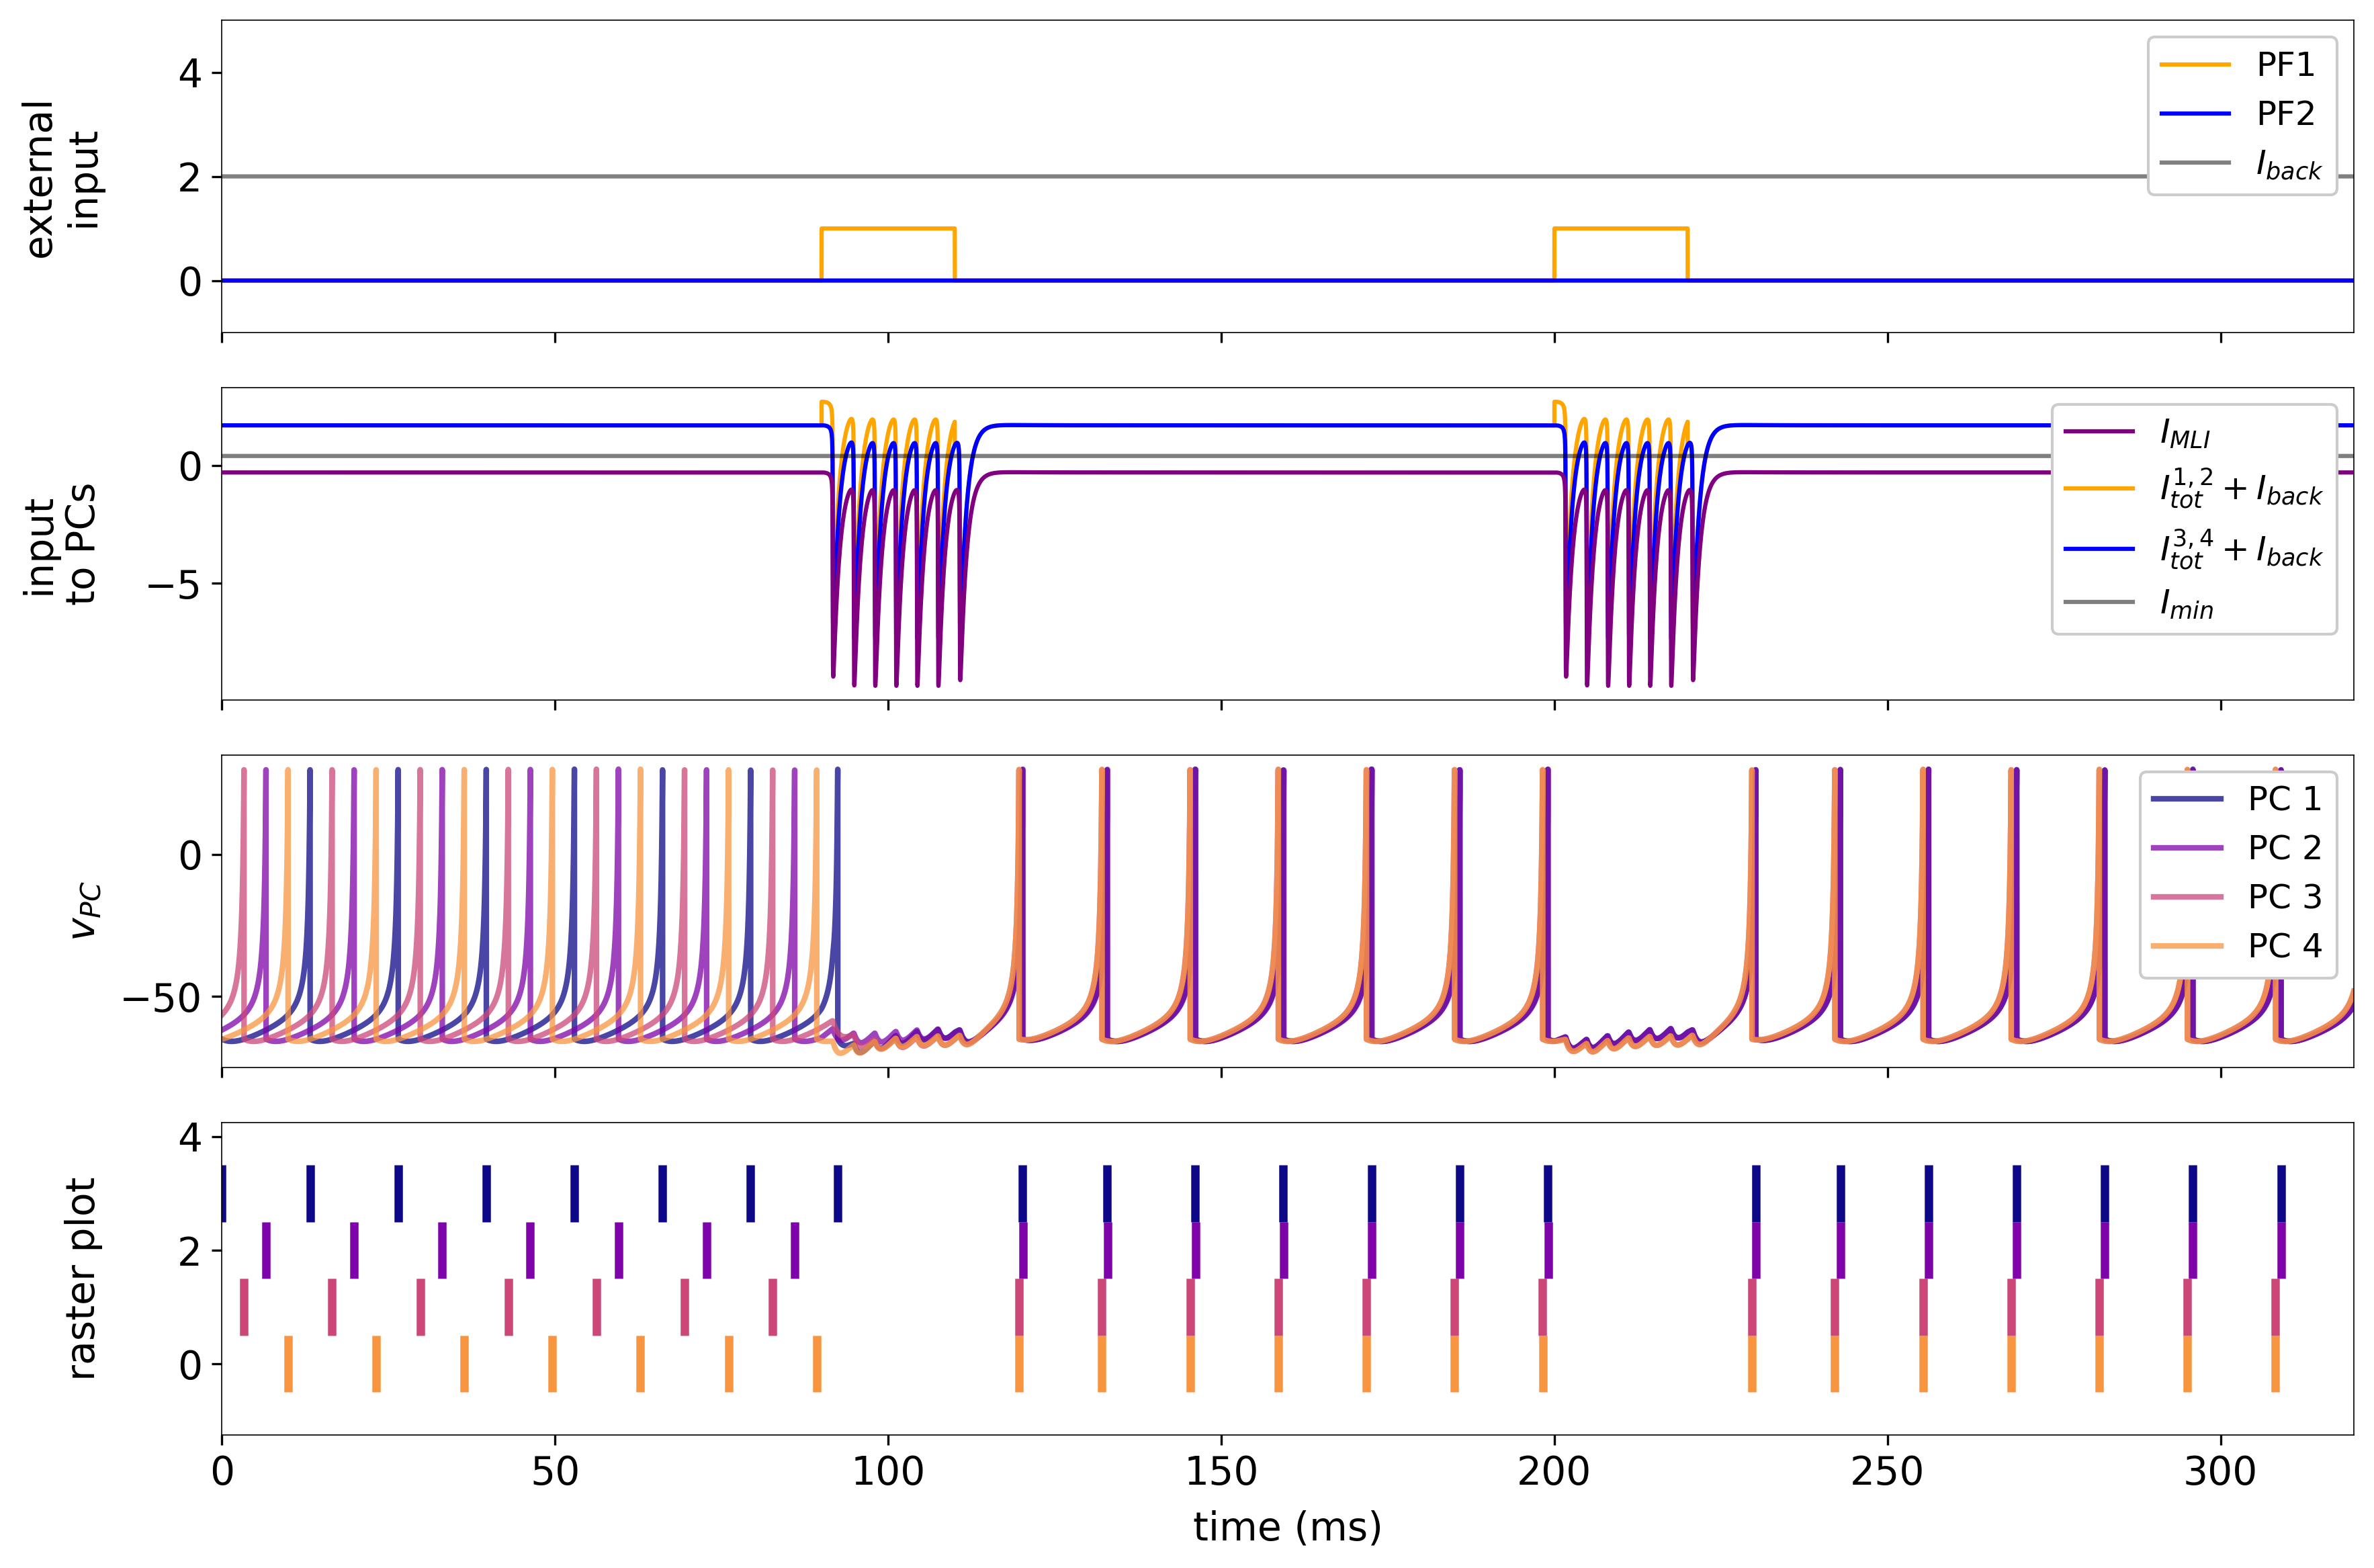

In [ ]:
# Generating subplots
fig, ax = plt.subplots(4, 1, figsize=(12,8), sharex=True)
color = plt.cm.plasma(np.linspace(0,0.75,N[1]))

# Plotting injected current I
times = [float(STEP*k) for k in range(len(PF1))]
ax[0].plot(times, PF1, color='orange', label='PF1', zorder=1)
ax[0].plot(times, PF2, color='blue', label='PF2', zorder=2)
ax[0].plot(times, I_background, color='grey', label=r'$I_{back}$')
ax[0].set_ylabel('external\ninput')
ax[0].set_ylim(-1,5)
ax[0].legend(loc='upper right', framealpha=1)

# Plotting output of BCs
times_v = [float(STEP*k) for k in range(len(v_BC_list))]
ax[1].plot(times_v, Jc*np.array(s_BC_list), c='purple', label=r'$I_{MLI}$',zorder=3)

ax[1].plot(times_v, I_background+PF1+Jc*np.array(s_BC_list), c='orange', label=r'$I_{tot}^{1,2} + I_{back}$', zorder=1)
ax[1].plot(times_v, I_background+PF2+Jc*np.array(s_BC_list), c='blue', label=r'$I_{tot}^{3,4} + I_{back}$', zorder=2)
ax[1].plot(times_v, 0.4*np.ones_like(s_BC_list), c='k', alpha=.5, label=r'$I_{min}$')

#ax[1].plot(times_v, np.array(s_BC_list))

ax[1].set_ylabel('input\nto PCs')
ax[1].legend(loc='upper right', framealpha=1)

# Plotting voltage of PCs
for n in range(N[1]):
    ax[2].plot(times_v, v_PC_list[n], label=f'PC {n+1}', linestyle='-', linewidth=2, alpha=.75, c=color[n])

ax[2].set_ylabel(r'$v_{PC}$')
ax[2].legend(loc='upper right', framealpha=1)

ax[2].set_xlim(0, 400)

# Plotting raster plot
ax[3].eventplot(raster[::-1], orientation='horizontal', colors=color[::-1], linewidths=3)
ax[3].set_xlabel('time (ms)')
ax[3].set_xlim(0, T)
ax[3].set_ylabel('raster plot')

fig.align_ylabels(ax)
plt.show()

## Silencing: opposite effect

In [ ]:
from jax import jit, numpy as jnp
import numpy as np
import math, jax, tqdm, os, matplotlib, random
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams
from matplotlib.colors import ListedColormap

# Parameters
T = 400
STEP = 1e-3
VR = -100
VP = 100

# Number of neurons in BCs, PCs
N = [1000, 4]

# Electrical coupling strength in BCs
g = 1

# Cross chemical coupling strength between BCs and PC
Jc = -8

# BC properties
tau_m = 2 #3.33 #3.6 #3
tau_d = 1 #2 #3
eta_mean = 0
delta = .3

I_base = 0
I_step = 2
I_back = 2

I_background = create_input([I_back], [T])
PF1 = create_input([I_base, I_step, I_base], [100, 50, 250])
PF2 = create_input([I_base], [T])

w_PF1_PC = np.concatenate((np.ones(int(N[1]/2)), np.zeros(int(N[1]/2))), axis=0)
w_PF2_PC = np.concatenate((np.zeros(int(N[1]/2)), np.ones(int(N[1]/2))), axis=0)

# Compute splayed state ICs
v_PC_ICs, u_PC_ICs, BC_ICs = initial_conditions(T, STEP, g, Jc, eta_mean, delta, tau_m, tau_d, I_background)

''' RUN THE SIMULATIONS OF BCs and PCs '''
def run():
    # Initialize BCs
    v_BC, r_BC, s_BC = BC_ICs[0], BC_ICs[1], BC_ICs[2]

    # Initialize PCs
    v_PC = v_PC_ICs
    u_PC = u_PC_ICs

    #c = list(zip(v_PC, u_PC))
    #random.shuffle(c)
    #v_PC, u_PC = zip(*c)

    v_PC, u_PC = np.array(v_PC), np.array(u_PC)

    for t in tqdm.tqdm(np.arange(0, T, STEP)):
        # Save values to list
        v_BC_list.append(v_BC)
        r_BC_list.append(r_BC)
        s_BC_list.append(s_BC)
        for n in range(N[1]):
            v_PC_list[n].append(v_PC[n])
            u_PC_list[n].append(u_PC[n])

        # Input to PCs
        I_PC = Jc*s_BC + w_PF1_PC*PF1[int(t/STEP)-1] + w_PF2_PC*PF2[int(t/STEP)-1] + I_background[int(t/STEP)-1]

        # Input to BCs
        I_BC = PF1[int(t/STEP)-1]+ PF2[int(t/STEP)-1]

        # Compute next value of BCs and PCs
        v_next_BC, r_next_BC, s_next_BC = make_step_BC(v_BC, r_BC, s_BC, I_BC)
        v_next_PC, u_next_PC = make_step_PC(t, v_PC, u_PC, I_PC)

        # Update values
        v_BC, v_PC = v_next_BC, v_next_PC
        u_PC = u_next_PC
        r_BC = r_next_BC
        s_BC = s_next_BC

''' MAIN '''
v_BC_list = []
r_BC_list = []
s_BC_list = []
v_PC_list = [[] for k in range(N[1])]
u_PC_list = [[] for k in range(N[1])]

run()

v_PC_list = np.array(v_PC_list)

raster = [[] for k in range(4)]
for k in range(len(v_PC_list)):
    raster[k] = np.where(v_PC_list[k] == c)[0]*STEP

100%|██████████| 400000/400000 [00:24<00:00, 16000.18it/s]


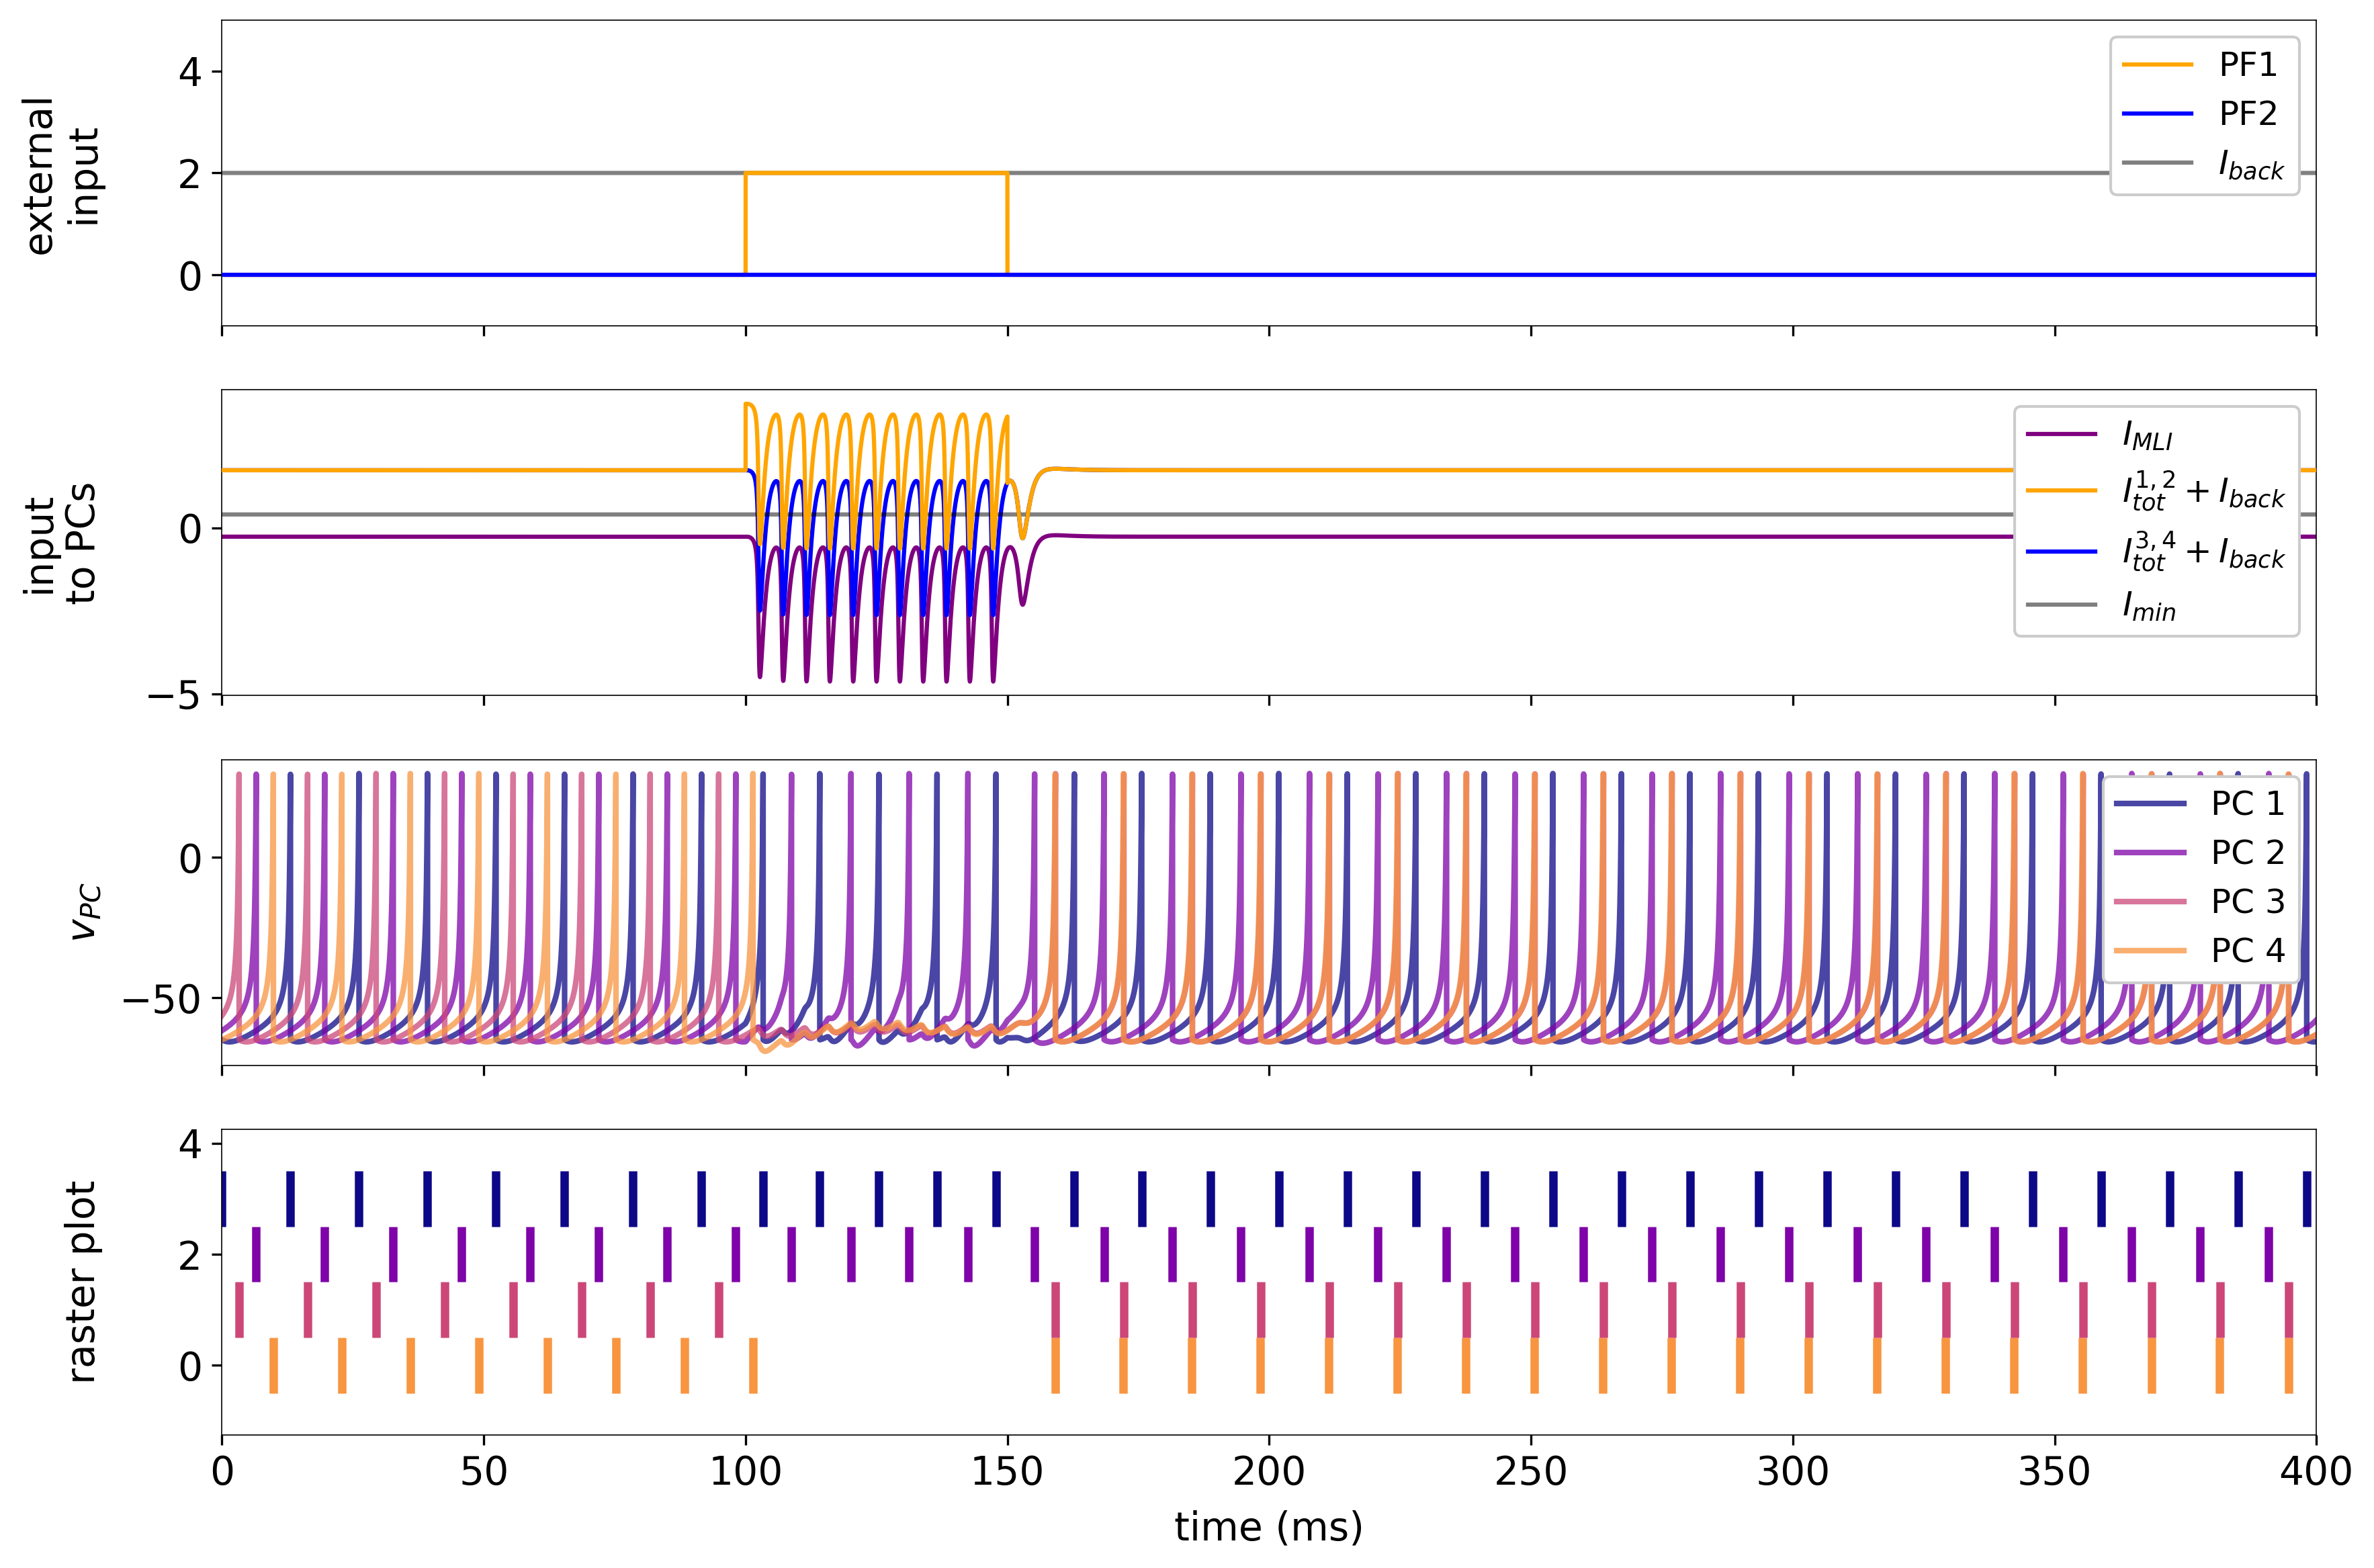

In [ ]:
# Generating subplots
fig, ax = plt.subplots(4, 1, figsize=(12,8), sharex=True)
color = plt.cm.plasma(np.linspace(0,0.75,N[1]))

# Plotting injected current I
times = [float(STEP*k) for k in range(len(PF1))]
ax[0].plot(times, PF1, color='orange', label='PF1', zorder=10)
ax[0].plot(times, PF2, color='blue', label='PF2', zorder=10)
ax[0].plot(times, I_background, color='grey', label=r'$I_{back}$')
ax[0].set_ylabel('external\ninput')
ax[0].set_ylim(-1,5)
ax[0].legend(loc='upper right', framealpha=1)

# Plotting output of BCs
times_v = [float(STEP*k) for k in range(len(v_BC_list))]
ax[1].plot(times_v, Jc*np.array(s_BC_list), c='purple', label=r'$I_{MLI}$')
ax[1].plot(times_v, I_background+PF1+Jc*np.array(s_BC_list), c='orange', label=r'$I_{tot}^{1,2}+I_{back}$', zorder=5)
ax[1].plot(times_v, I_background+PF2+Jc*np.array(s_BC_list), c='blue', label=r'$I_{tot}^{3,4}+I_{back}$')
ax[1].plot(times_v, 0.4*np.ones_like(s_BC_list), c='k', alpha=.5, label=r'$I_{min}$')

ax[1].set_ylabel('input\nto PCs')
ax[1].legend(loc='upper right', framealpha=1)

# Plotting voltage of PCs
for n in range(N[1]):
    ax[2].plot(times_v, v_PC_list[n], label=f'PC {n+1}', linestyle='-', linewidth=2, alpha=.75, c=color[n])
ax[2].set_ylabel(r'$v_{PC}$')
ax[2].legend(loc='upper right', framealpha=1)
ax[2].set_xlim(0, 400)

# Plotting raster plot
ax[3].eventplot(raster[::-1], orientation='horizontal', colors=color[::-1], linewidths=3)
ax[3].set_xlabel('time (ms)')
ax[3].set_xlim(0, T)
ax[3].set_ylabel('raster plot')

fig.align_ylabels(ax)
plt.show()

## Phase locking

In [ ]:
from jax import jit, numpy as jnp
import numpy as np
import math, jax, tqdm, os, matplotlib, random
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams
from matplotlib.colors import ListedColormap

# Parameters
T = 400
STEP = 1e-3
VR = -100
VP = 100

# Number of neurons in BCs, PCs
N = [1000, 4]

# Electrical coupling strength in BCs
g = 1 #1.44 #2

# Cross chemical coupling strength between BCs and PC
Jc = -7 #-10

# BC properties
tau_m = 3.5 #3.33 #3.6 #3
tau_d = 1 #2 #3
eta_mean = 0
delta = .3

I_base = 0
I_step = 1.3 #1.5
I_back = 2 #3 #4

I_background = create_input([I_back], [T])
PF1 = create_input([I_base, I_step, I_base], [100, 80, 220])
PF2 = create_input([I_base], [T])

w_PF1_PC = np.concatenate((np.ones(int(N[1]/2)), np.zeros(int(N[1]/2))), axis=0)
w_PF2_PC = np.concatenate((np.zeros(int(N[1]/2)), np.ones(int(N[1]/2))), axis=0)

# Compute splayed state ICs
v_PC_ICs, u_PC_ICs, BC_ICs = initial_conditions(T, STEP, g, Jc, eta_mean, delta, tau_m, tau_d, I_background)

''' RUN THE SIMULATIONS OF BCs and PCs '''
def run():
    # Initialize BCs
    v_BC, r_BC, s_BC = BC_ICs[0], BC_ICs[1], BC_ICs[2]

    # Initialize PCs
    v_PC = v_PC_ICs
    u_PC = u_PC_ICs

    #c = list(zip(v_PC, u_PC))
    #random.shuffle(c)
    #v_PC, u_PC = zip(*c)

    v_PC, u_PC = np.array(v_PC), np.array(u_PC)

    for t in tqdm.tqdm(np.arange(0, T, STEP)):
        # Save values to list
        v_BC_list.append(v_BC)
        r_BC_list.append(r_BC)
        s_BC_list.append(s_BC)
        for n in range(N[1]):
            v_PC_list[n].append(v_PC[n])
            u_PC_list[n].append(u_PC[n])

        # Input to PCs
        I_PC = Jc*s_BC + w_PF1_PC*PF1[int(t/STEP)-1] + w_PF2_PC*PF2[int(t/STEP)-1] + I_background[int(t/STEP)-1]

        # Input to BCs
        I_BC = PF1[int(t/STEP)-1]+ PF2[int(t/STEP)-1]

        # Compute next value of BCs and PCs
        v_next_BC, r_next_BC, s_next_BC = make_step_BC(v_BC, r_BC, s_BC, I_BC)
        v_next_PC, u_next_PC = make_step_PC(t, v_PC, u_PC, I_PC)

        # Update values
        v_BC, v_PC = v_next_BC, v_next_PC
        u_PC = u_next_PC
        r_BC = r_next_BC
        s_BC = s_next_BC

''' MAIN '''
v_BC_list = []
r_BC_list = []
s_BC_list = []
v_PC_list = [[] for k in range(N[1])]
u_PC_list = [[] for k in range(N[1])]

run()

v_PC_list = np.array(v_PC_list)

raster = [[] for k in range(4)]
for k in range(len(v_PC_list)):
    raster[k] = np.where(v_PC_list[k] == c)[0]*STEP

100%|██████████| 400000/400000 [00:28<00:00, 13922.58it/s]


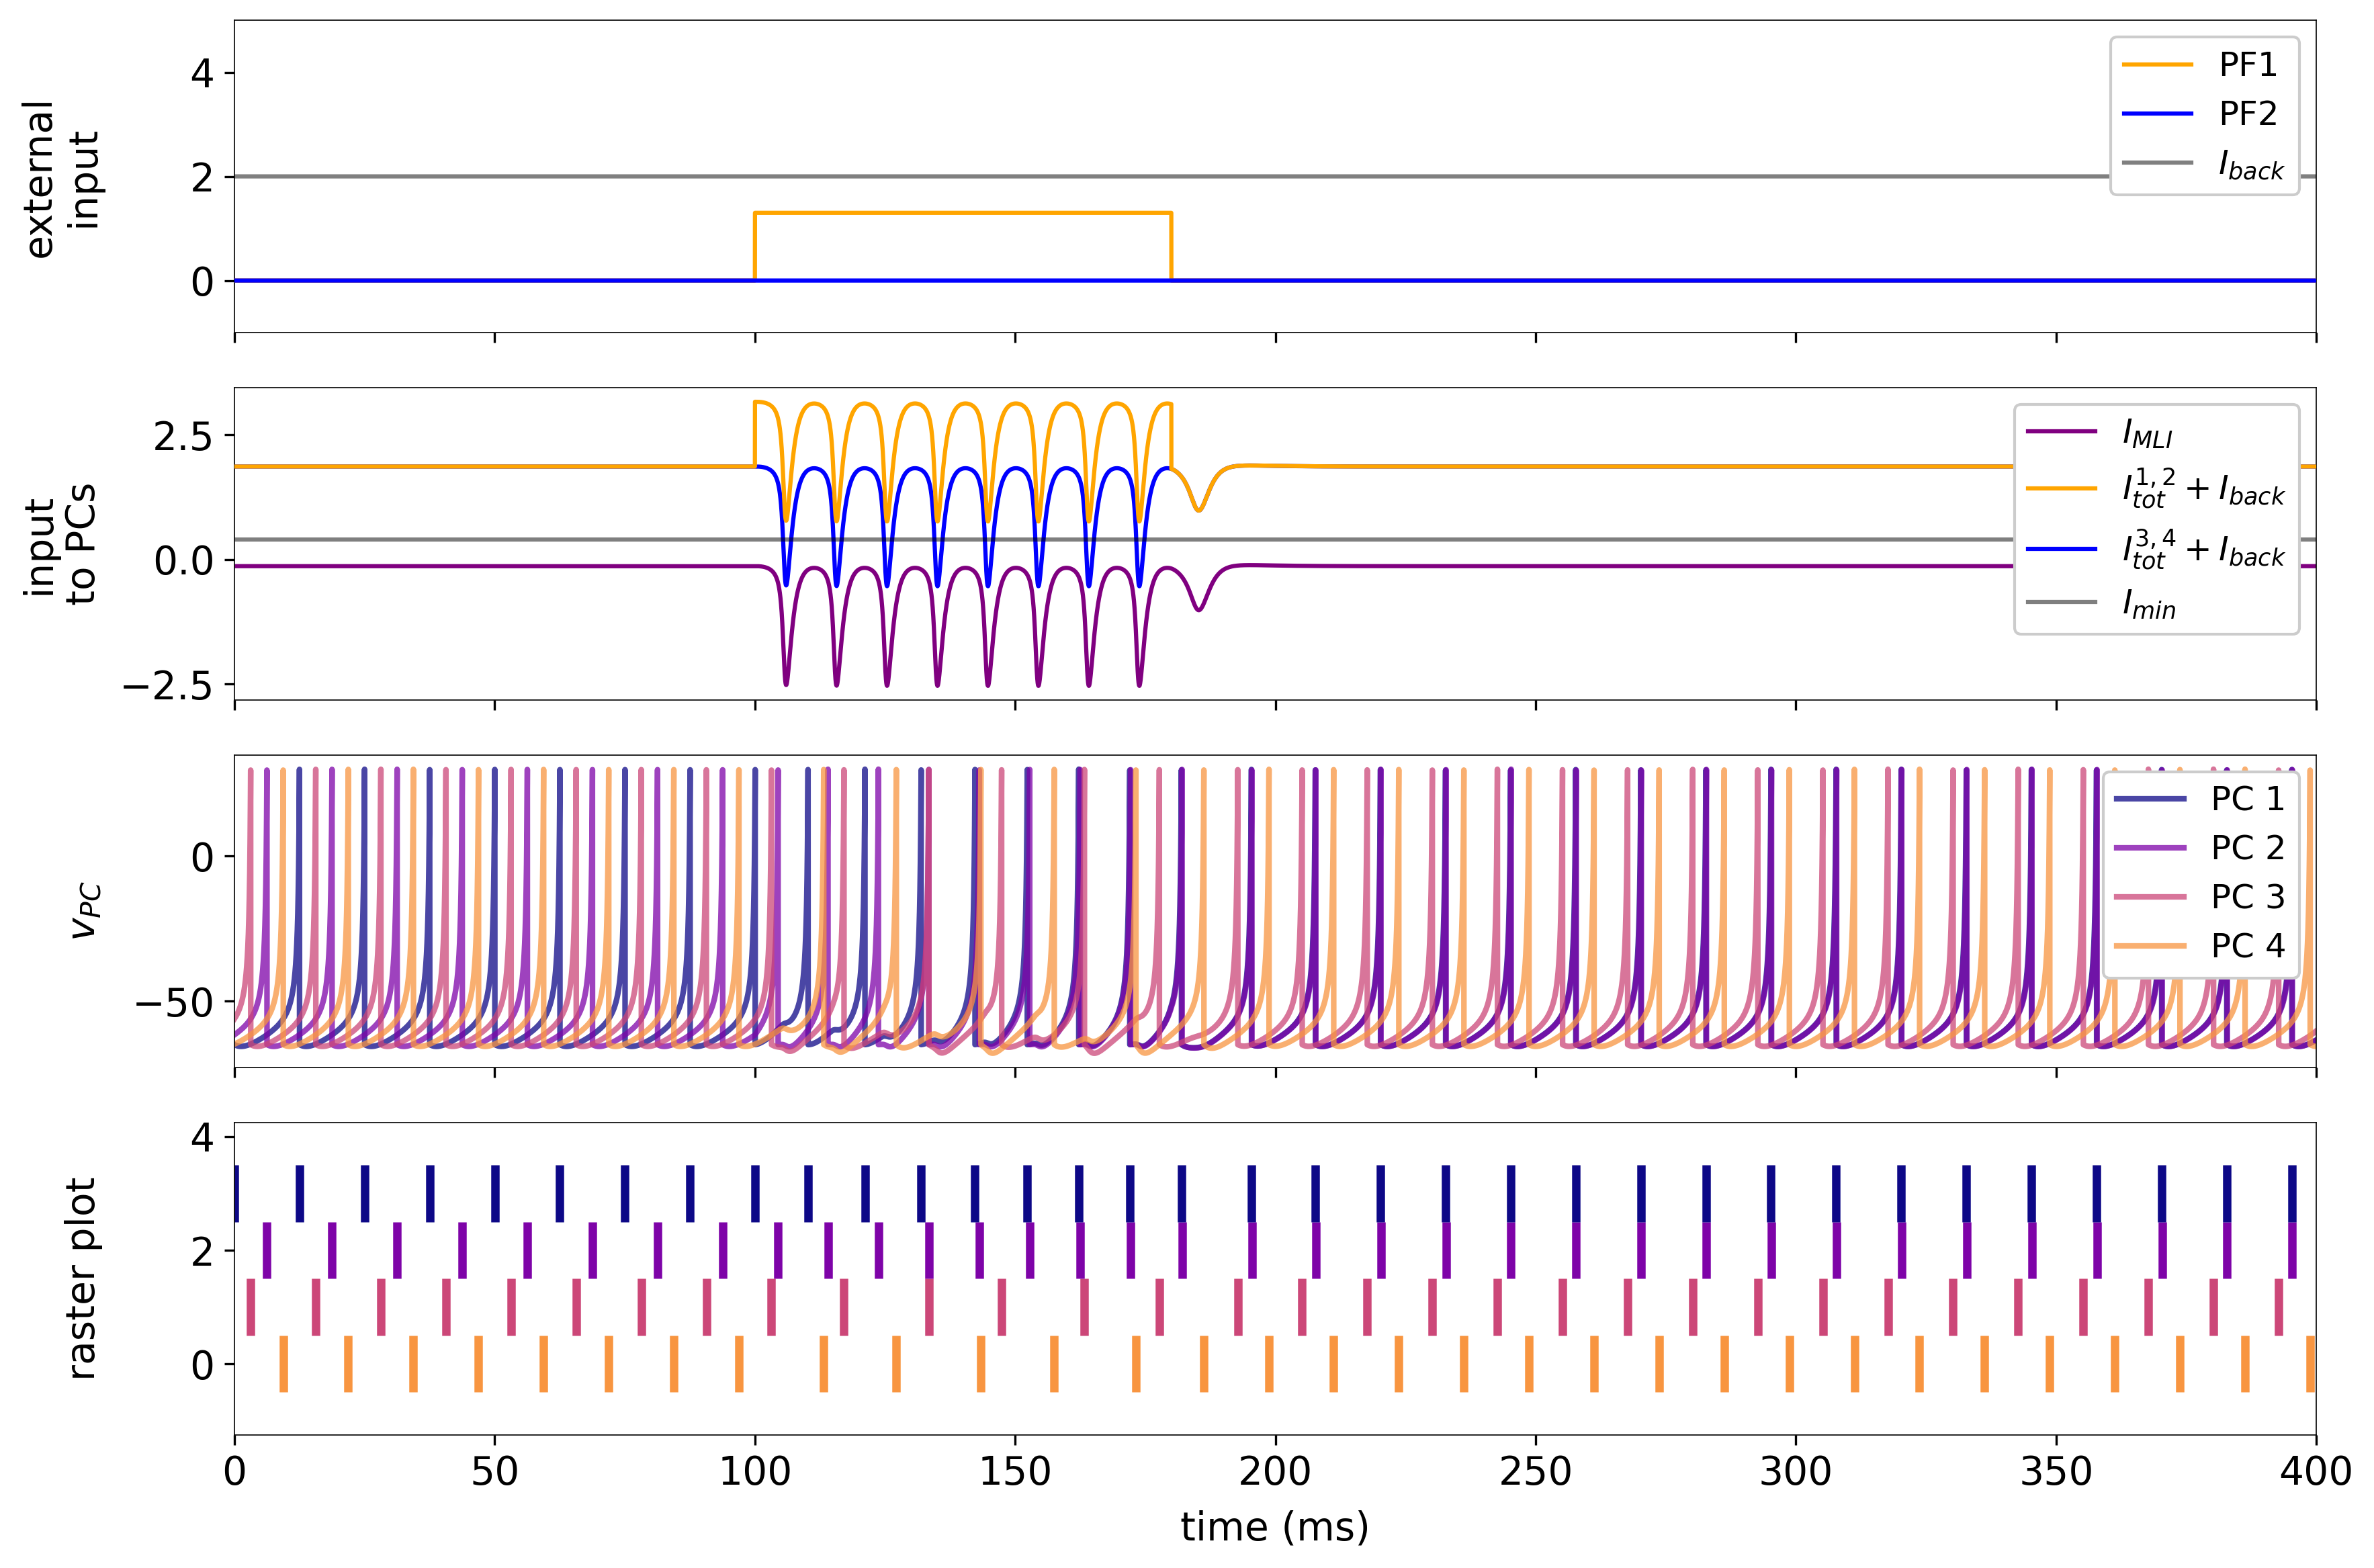

In [ ]:
# Generating subplots
fig, ax = plt.subplots(4, 1, figsize=(12,8), sharex=True)
color = plt.cm.plasma(np.linspace(0,0.75,N[1]))

# Plotting injected current I
times = [float(STEP*k) for k in range(len(PF1))]
ax[0].plot(times, PF1, color='orange', label='PF1', zorder=10)
ax[0].plot(times, PF2, color='blue', label='PF2', zorder=10)
ax[0].plot(times, I_background, color='grey', label=r'$I_{back}$')
ax[0].set_ylabel('external\ninput')
ax[0].set_ylim(-1,5)
ax[0].legend(loc='upper right', framealpha=1)

# Plotting output of BCs
times_v = [float(STEP*k) for k in range(len(v_BC_list))]
ax[1].plot(times_v, Jc*np.array(s_BC_list), c='purple', label=r'$I_{MLI}$')
ax[1].plot(times_v, I_background+PF1+Jc*np.array(s_BC_list), c='orange', label=r'$I_{tot}^{1,2}+I_{back}$', zorder=5)
ax[1].plot(times_v, I_background+PF2+Jc*np.array(s_BC_list), c='blue', label=r'$I_{tot}^{3,4}+I_{back}$')
ax[1].plot(times_v, 0.4*np.ones_like(s_BC_list), c='k', alpha=.5, label=r'$I_{min}$')

#ax[1].plot(times_v, np.array(s_BC_list))

ax[1].set_ylabel('input\nto PCs')
ax[1].legend(loc='upper right', framealpha=1)

# Plotting voltage of PCs
for n in range(N[1]):
    ax[2].plot(times_v, v_PC_list[n], label=f'PC {n+1}', linestyle='-', linewidth=2, alpha=.75, c=color[n])
ax[2].set_ylabel(r'$v_{PC}$')
ax[2].legend(loc='upper right', framealpha=1)
ax[2].set_xlim(0, 400)

# Plotting raster plot
ax[3].eventplot(raster[::-1], orientation='horizontal', colors=color[::-1], linewidths=3)
ax[3].set_xlabel('time (ms)')
ax[3].set_xlim(0, T)
ax[3].set_ylabel('raster plot')

fig.align_ylabels(ax)
plt.show()

## Noise

In [ ]:
from jax import jit, numpy as jnp
import numpy as np
import math, jax, tqdm, os, matplotlib, random
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams
from matplotlib.colors import ListedColormap

# Parameters
T = 400
STEP = 1e-3
VR = -100
VP = 100

# Number of neurons in BCs, PCs
N = [1000, 4]

# Electrical coupling strength in BCs
g = 1.44 #2

# Cross chemical coupling strength between BCs and PC
Jc = -10

# BC properties
tau_m = 3.33 #3.6 #3
tau_d = 2 #3
eta_mean = 0
delta = .3

# BC properties
tau_m = 3.33 #3.6 #3
tau_d = 2 #3
eta_mean = 0
delta = .3

I_base = 0
I_step = 1.5
I_back = 3

I_background_ = create_input([I_back], [T])
PF1_ = create_input([I_base, I_step, I_base], [100, 100, 200])
PF2_ = create_input([I_base], [T])

# Background noise to PCs (iid)
sigma1, sigma2, sigma3, sigma4 = 0.5, 0.5, 0.5, 0.5
dW1, dW2, dW3, dW4 = np.random.randn(int(T/STEP)), np.random.randn(int(T/STEP)), np.random.randn(int(T/STEP)), np.random.randn(int(T/STEP))
I_background = I_background_ + np.array([sigma1*dW1/math.sqrt(STEP), sigma2*dW2/math.sqrt(STEP), sigma3*dW3/math.sqrt(STEP), sigma4*dW4/math.sqrt(STEP)])

# Parallel Fibre inputs (iid)
sigma1, sigma2 = 0.1, 0.1
dW1, dW2 = np.random.randn(int(T/STEP)), np.random.randn(int(T/STEP))
PF1 = PF1_ + sigma1*dW1/math.sqrt(STEP)
PF2 = PF2_ + sigma2*dW2/math.sqrt(STEP)

w_PF1_PC = np.concatenate((np.ones(int(N[1]/2)), np.zeros(int(N[1]/2))), axis=0)
w_PF2_PC = np.concatenate((np.zeros(int(N[1]/2)), np.ones(int(N[1]/2))), axis=0)

# Compute splayed state ICs
v_PC_ICs, u_PC_ICs, BC_ICs = initial_conditions(T, STEP, g, Jc, eta_mean, delta, tau_m, tau_d, I_back*np.ones(int(T/STEP)))

''' RUN THE SIMULATIONS OF BCs and PCs '''
def run():
    # Initialize BCs
    v_BC, r_BC, s_BC = BC_ICs[0], BC_ICs[1], BC_ICs[2]

    # Initialize PCs
    v_PC = v_PC_ICs
    u_PC = u_PC_ICs

    c = list(zip(v_PC, u_PC))
    random.shuffle(c)
    v_PC, u_PC = zip(*c)

    v_PC, u_PC = np.array(v_PC), np.array(u_PC)

    for t in tqdm.tqdm(np.arange(0, T, STEP)):
        # Save values to list
        v_BC_list.append(v_BC)
        r_BC_list.append(r_BC)
        s_BC_list.append(s_BC)
        for n in range(N[1]):
            v_PC_list[n].append(v_PC[n])
            u_PC_list[n].append(u_PC[n])

        # Input to PCs
        I_PC = I_background[:,int(t/STEP)-1]  + Jc*s_BC + w_PF1_PC*PF1[int(t/STEP)-1] + w_PF2_PC*PF2[int(t/STEP)-1]

        # Input to BCs
        I_BC = PF1[int(t/STEP)-1]+ PF2[int(t/STEP)-1]

        # Compute next value of BCs and PCs
        v_next_BC, r_next_BC, s_next_BC = make_step_BC(v_BC, r_BC, s_BC, I_BC)
        v_next_PC, u_next_PC = make_step_PC(t, v_PC, u_PC, I_PC)

        # Update values
        v_BC, v_PC = v_next_BC, v_next_PC
        u_PC = u_next_PC
        r_BC = r_next_BC
        s_BC = s_next_BC

''' MAIN '''
v_BC_list = []
r_BC_list = []
s_BC_list = []
v_PC_list = [[] for k in range(N[1])]
u_PC_list = [[] for k in range(N[1])]

run()

v_PC_list = np.array(v_PC_list)

raster = [[] for k in range(4)]
for k in range(len(v_PC_list)):
    raster[k] = np.where(v_PC_list[k] == c)[0]*STEP

100%|██████████| 400000/400000 [00:16<00:00, 24197.80it/s]


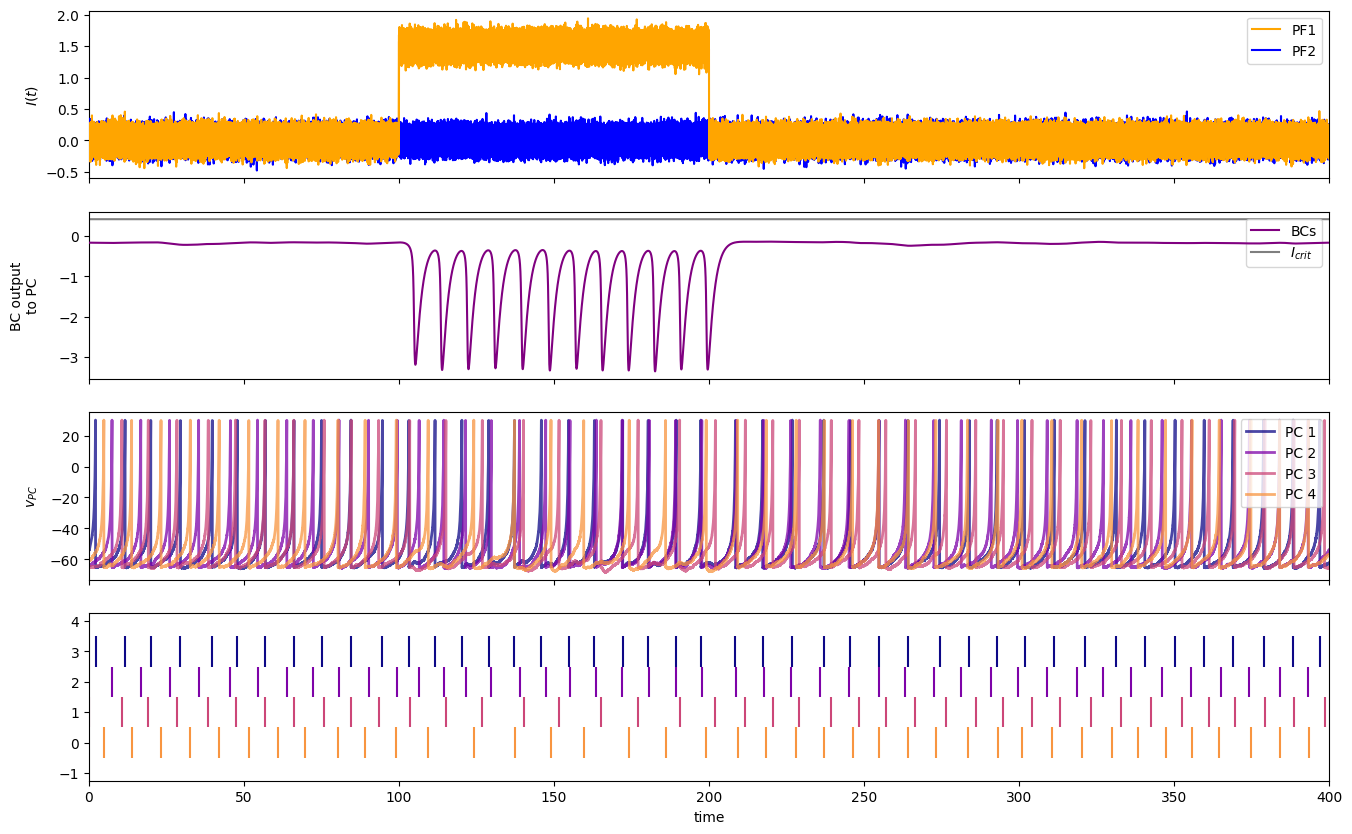

In [ ]:
# Generating subplots
fig, ax = plt.subplots(4, 1, figsize=(16,10), sharex=True)
color = plt.cm.plasma(np.linspace(0,0.75,N[1]))

# Plotting injected current I
times = [float(STEP*k) for k in range(len(I_background[0]))]
ax[0].plot(times, PF1_ + sigma1*dW1, color='orange', label='PF1', zorder=10)
ax[0].plot(times, PF2_ + sigma2*dW2, color='blue', label='PF2', zorder=9)
ax[0].set_ylabel(r'$I(t)$')
ax[0].legend(loc='upper right')

# Plotting output of BCs
times_v = [float(STEP*k) for k in range(len(v_BC_list))]
ax[1].plot(times_v, Jc*np.array(s_BC_list), c='purple', label=r'BCs', zorder=10)
#ax[1].plot(times_v, PF1+Jc*np.array(s_BC_list), c='red', label=r'total PC1 and 2', zorder=10)
#ax[1].plot(times_v, PF2+Jc*np.array(s_BC_list), c='blue', label=r'total PC3 and 4')
ax[1].plot(times_v, 0.4225*np.ones_like(s_BC_list), c='k', alpha=.5, label=r'$I_{crit}$')

ax[1].set_ylabel('BC output\nto PC')
ax[1].legend(loc='upper right')

# Plotting voltage of PCs
for n in range(N[1]):
    ax[2].plot(times_v, v_PC_list[n], label=f'PC {n+1}', linestyle='-', linewidth=2, alpha=.75, c=color[n])

ax[2].set_ylabel(r'$v_{PC}$')
ax[2].legend(loc='upper right')

# Plotting raster plot
ax[3].eventplot(raster[::-1], orientation='horizontal', colors=color[::-1])
ax[3].set_xlabel('time')
ax[3].set_xlim(0, T)

fig.align_ylabels(ax)
plt.show()

# Toy Model 3 (SCs & BCs)

In [ ]:
from jax import jit, numpy as jnp
import numpy as np
import math, jax, tqdm, os, matplotlib, random
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams
from matplotlib.colors import ListedColormap

# PC properties: class 1 Izhikevich neuron
a = 0.2
b = 0.26
c = -65
d = 0

''' INTERNEURONS SIMULATION '''
def Analytical_MLI(v1, v2, r1, r2, s1, s2, I, I_MLI):
    r1_dot = (delta/(tau_m*math.pi) + 2*r1*v1 - g1*r1)/tau_m
    r2_dot = (delta/(tau_m*math.pi) + 2*r2*v2 - g2*r2)/tau_m
    v1_dot = (v1**2 + eta_mean + J1*tau_m*s1 + Jc*tau_m*s2  + I - (math.pi*tau_m*r1)**2)/tau_m
    v2_dot = (v2**2 + eta_mean + J2*tau_m*s2 + Jc*tau_m*s1  + I + I_MLI - (math.pi*tau_m*r2)**2)/tau_m
    s1_dot = (-s1 + r1)/tau_d
    s2_dot = (-s2 + r2)/tau_d

    return v1_dot, v2_dot, r1_dot, r2_dot, s1_dot, s2_dot

def make_step_MLI(v, r, s, I, I_MLI):
    v1, v2 = v[0], v[1]
    r1, r2 = r[0], r[1]
    s1, s2 = s[0], s[1]

    dv1, dv2, dr1, dr2, ds1, ds2 = Analytical_MLI(v1, v2, r1, r2, s1, s2, I, I_MLI)

    v1_next = v1 + STEP*dv1
    v2_next = v2 + STEP*dv2
    r1_next = r1 + STEP*dr1
    r2_next = r2 + STEP*dr2
    s1_next = s1 + STEP*ds1
    s2_next = s2 + STEP*ds2

    return [v1_next, v2_next], [r1_next, r2_next], [s1_next, s2_next]

''' PURKINJE CELL SIMULATION '''
def Izh_PC(t, v, u, I):
    dv = 0.04*v**2 + 5*v + 140 - u + I
    du = a*(b*v-u)

    return dv, du

def make_step_PC(t, v, u, I):
    dv, du = Izh_PC(t, v, u, I)
    v_next, u_next = v + STEP*dv, u + STEP*du

    if isinstance(v, np.ndarray):
        v_next[v_next >= 30] = c
        u_next[v_next >= 30] = u[v_next >= 30] + d
    else:
        if v_next >= 30:
            v_next = c

    return v_next, u_next

def create_input(values, durations, STEP=1e-3):
    input = []
    for k in range(len(values)):
        for t in np.arange(0, durations[k], STEP):
            input.append(values[k])
    return np.array(input)

def create_noisy_input(values, durations, sigma, STEP=1e-3):
    input = []
    dW = np.random.randn(int(sum(durations)/STEP))
    for k in range(len(values)):
        for t in np.arange(0, durations[k], STEP):
            input.append(values[k])

    return np.array(input) + sigma*dW/math.sqrt(STEP)

In [ ]:
def initial_conditions(T, STEP, Jc, JbSC, JbBC, eta_mean, delta, tau_m, tau_d, I_background):
    v_PC_IC, u_PC_IC = [], []

    # Arbitrarily initialize BCs
    v_MLI, r_MLI, s_MLI = [0, -10], [0, 0], [0, 0] # Start in SF regime

    # Arbitrarily initialize PC
    v_PC = -60
    u_PC = 0

    for t in tqdm.tqdm(np.arange(0, T, STEP)):
        v_PC_IC.append(v_PC)
        u_PC_IC.append(u_PC)

        # Input to PC
        I_PC = JbSC*s_MLI[0] + JbBC*s_MLI[1] + 3 + 1 #PF receives input from mean BCs, background input=3, PF1=1 and PF2=0

        # Input to MLIs
        I_MLI = 1 # MLIs receive input from PF1=1 and PF2=0
        I_BC = 0 # BCs receive input from PC=0

        # Compute next value of BCs and PCs
        v_next_MLI, r_next_MLI, s_next_MLI = make_step_MLI(v_MLI, r_MLI, s_MLI, I_MLI, I_BC)
        v_next_PC, u_next_PC = make_step_PC(t, v_PC, u_PC, I_PC)

        # Update values
        v_PC, v_MLI = v_next_PC, v_next_MLI
        u_PC, r_MLI, s_MLI = u_next_PC, r_next_MLI, s_next_MLI

    v_PC_IC, u_PC_IC = np.array(v_PC_IC), np.array(u_PC_IC)
    spikes = np.where(v_PC_IC == c)[0]
    T1, T2 = spikes[-1], spikes[-2]
    inc = int((T2-T1)/4)

    return [v_PC_IC[T1], v_PC_IC[T1+2*inc], v_PC_IC[T1+inc], v_PC_IC[T1+3*inc]], [u_PC_IC[T1], u_PC_IC[T1+2*inc], u_PC_IC[T1+inc], u_PC_IC[T1+3*inc]], v_MLI, r_MLI, s_MLI

## Without noise

In [ ]:
# Parameters
T = 500
STEP = 1e-3
VR = -100
VP = 100

# Number of neurons in BCs, PCs
N = [1000, 4]

# Electrical coupling strength in BCs
g1, g2 = 0, 1.44
J1, J2 = -1, 0

Jc = -6 # Cross chemical coupling strength between MLIs
JbBC = -6 # Cross chemical coupling strength between BCs and PCs
JbSC = -2 # Cross chemical coupling strength between SCs and PCs

# BC properties
tau_m = 3.5
tau_d = 2
eta_mean = .5
delta = .3

I_back = 1.8

# Background noise to PCs (iid)
sigma1, sigma2, sigma3, sigma4 = 0., 0., 0., 0.
I_background1, I_background2 = create_noisy_input([I_back], [T], sigma1), create_noisy_input([I_back], [T], sigma2)
I_background3, I_background4 = create_noisy_input([I_back], [T], sigma3), create_noisy_input([I_back], [T], sigma4)
I_background = np.array([I_background1, I_background2, I_background3, I_background4])

# Parallel Fibre inputs (iid)
sigma1, sigma2 = 0., 0.
dW1, dW2 = np.random.randn(int(T/STEP)), np.random.randn(int(T/STEP))
PF1 = create_noisy_input([1], [T], sigma1)
PF1[int(100/STEP):int(102/STEP)] = 5 # no noise in pulse
PF2 = create_noisy_input([0.5], [T], sigma2)

PC_BC = create_input([0, -5, 0], [200, 5, 295]) # Pulse inhibition that shuts down oscillations, no noise

w_PF1_PC = np.concatenate((np.ones(int(N[1]/2)), np.zeros(int(N[1]/2))), axis=0)
w_PF2_PC = np.concatenate((np.zeros(int(N[1]/2)), np.ones(int(N[1]/2))), axis=0)

# Compute splayed state ICs
v_PC_ICs, u_PC_ICs, v_MLI_ICs, r_MLI_ICs, s_MLI_ICs = initial_conditions(T, STEP, Jc, JbSC, JbBC, eta_mean, delta, tau_m, tau_d, I_background)


''' RUN THE SIMULATIONS OF MLIs and PCs '''
def run():
    # Initialize BCs
    v_MLI, r_MLI, s_MLI = v_MLI_ICs, r_MLI_ICs, s_MLI_ICs

    # Initialize PCs
    v_PC = v_PC_ICs
    u_PC = u_PC_ICs

    #c = list(zip(v_PC, u_PC))
    #random.shuffle(c)
    #v_PC, u_PC = zip(*c)

    v_PC, u_PC = np.array(v_PC), np.array(u_PC)

    for t in tqdm.tqdm(np.arange(0, T, STEP)):

        # Save values to list
        v_MLI_list[0].append(v_MLI[0])
        v_MLI_list[1].append(v_MLI[1])
        r_MLI_list[0].append(r_MLI[0])
        r_MLI_list[1].append(r_MLI[1])
        s_MLI_list[0].append(s_MLI[0])
        s_MLI_list[1].append(s_MLI[1])

        for n in range(N[1]):
            v_PC_list[n].append(v_PC[n])
            u_PC_list[n].append(u_PC[n])

        # Input to PCs
        I_PC = JbSC*s_MLI[0] + JbBC*s_MLI[1] + w_PF1_PC*PF1[int(t/STEP)-1] + w_PF2_PC*PF2[int(t/STEP)-1] + I_background[:,int(t/STEP)-1]

        # Input to BCs
        I_MLI = PF1[int(t/STEP)-1]+ PF2[int(t/STEP)-1]
        I_BC = PC_BC[int(t/STEP)-1]

        # Compute next value of BCs and PCs
        v_next_MLI, r_next_MLI, s_next_MLI = make_step_MLI(v_MLI, r_MLI, s_MLI, I_MLI, I_BC)
        v_next_PC, u_next_PC = make_step_PC(t, v_PC, u_PC, I_PC)

        # Update values
        v_MLI, v_PC = v_next_MLI, v_next_PC
        u_PC = u_next_PC
        r_MLI = r_next_MLI
        s_MLI = s_next_MLI

''' MAIN '''
v_MLI_list = [[], []]
r_MLI_list = [[], []]
s_MLI_list = [[], []]
v_PC_list = [[] for k in range(N[1])]
u_PC_list = [[] for k in range(N[1])]

run()

v_PC_list = np.array(v_PC_list)

raster = [[] for k in range(4)]
for k in range(len(v_PC_list)):
    raster[k] = np.where(v_PC_list[k] == c)[0]*STEP

100%|██████████| 500000/500000 [00:42<00:00, 11723.97it/s]


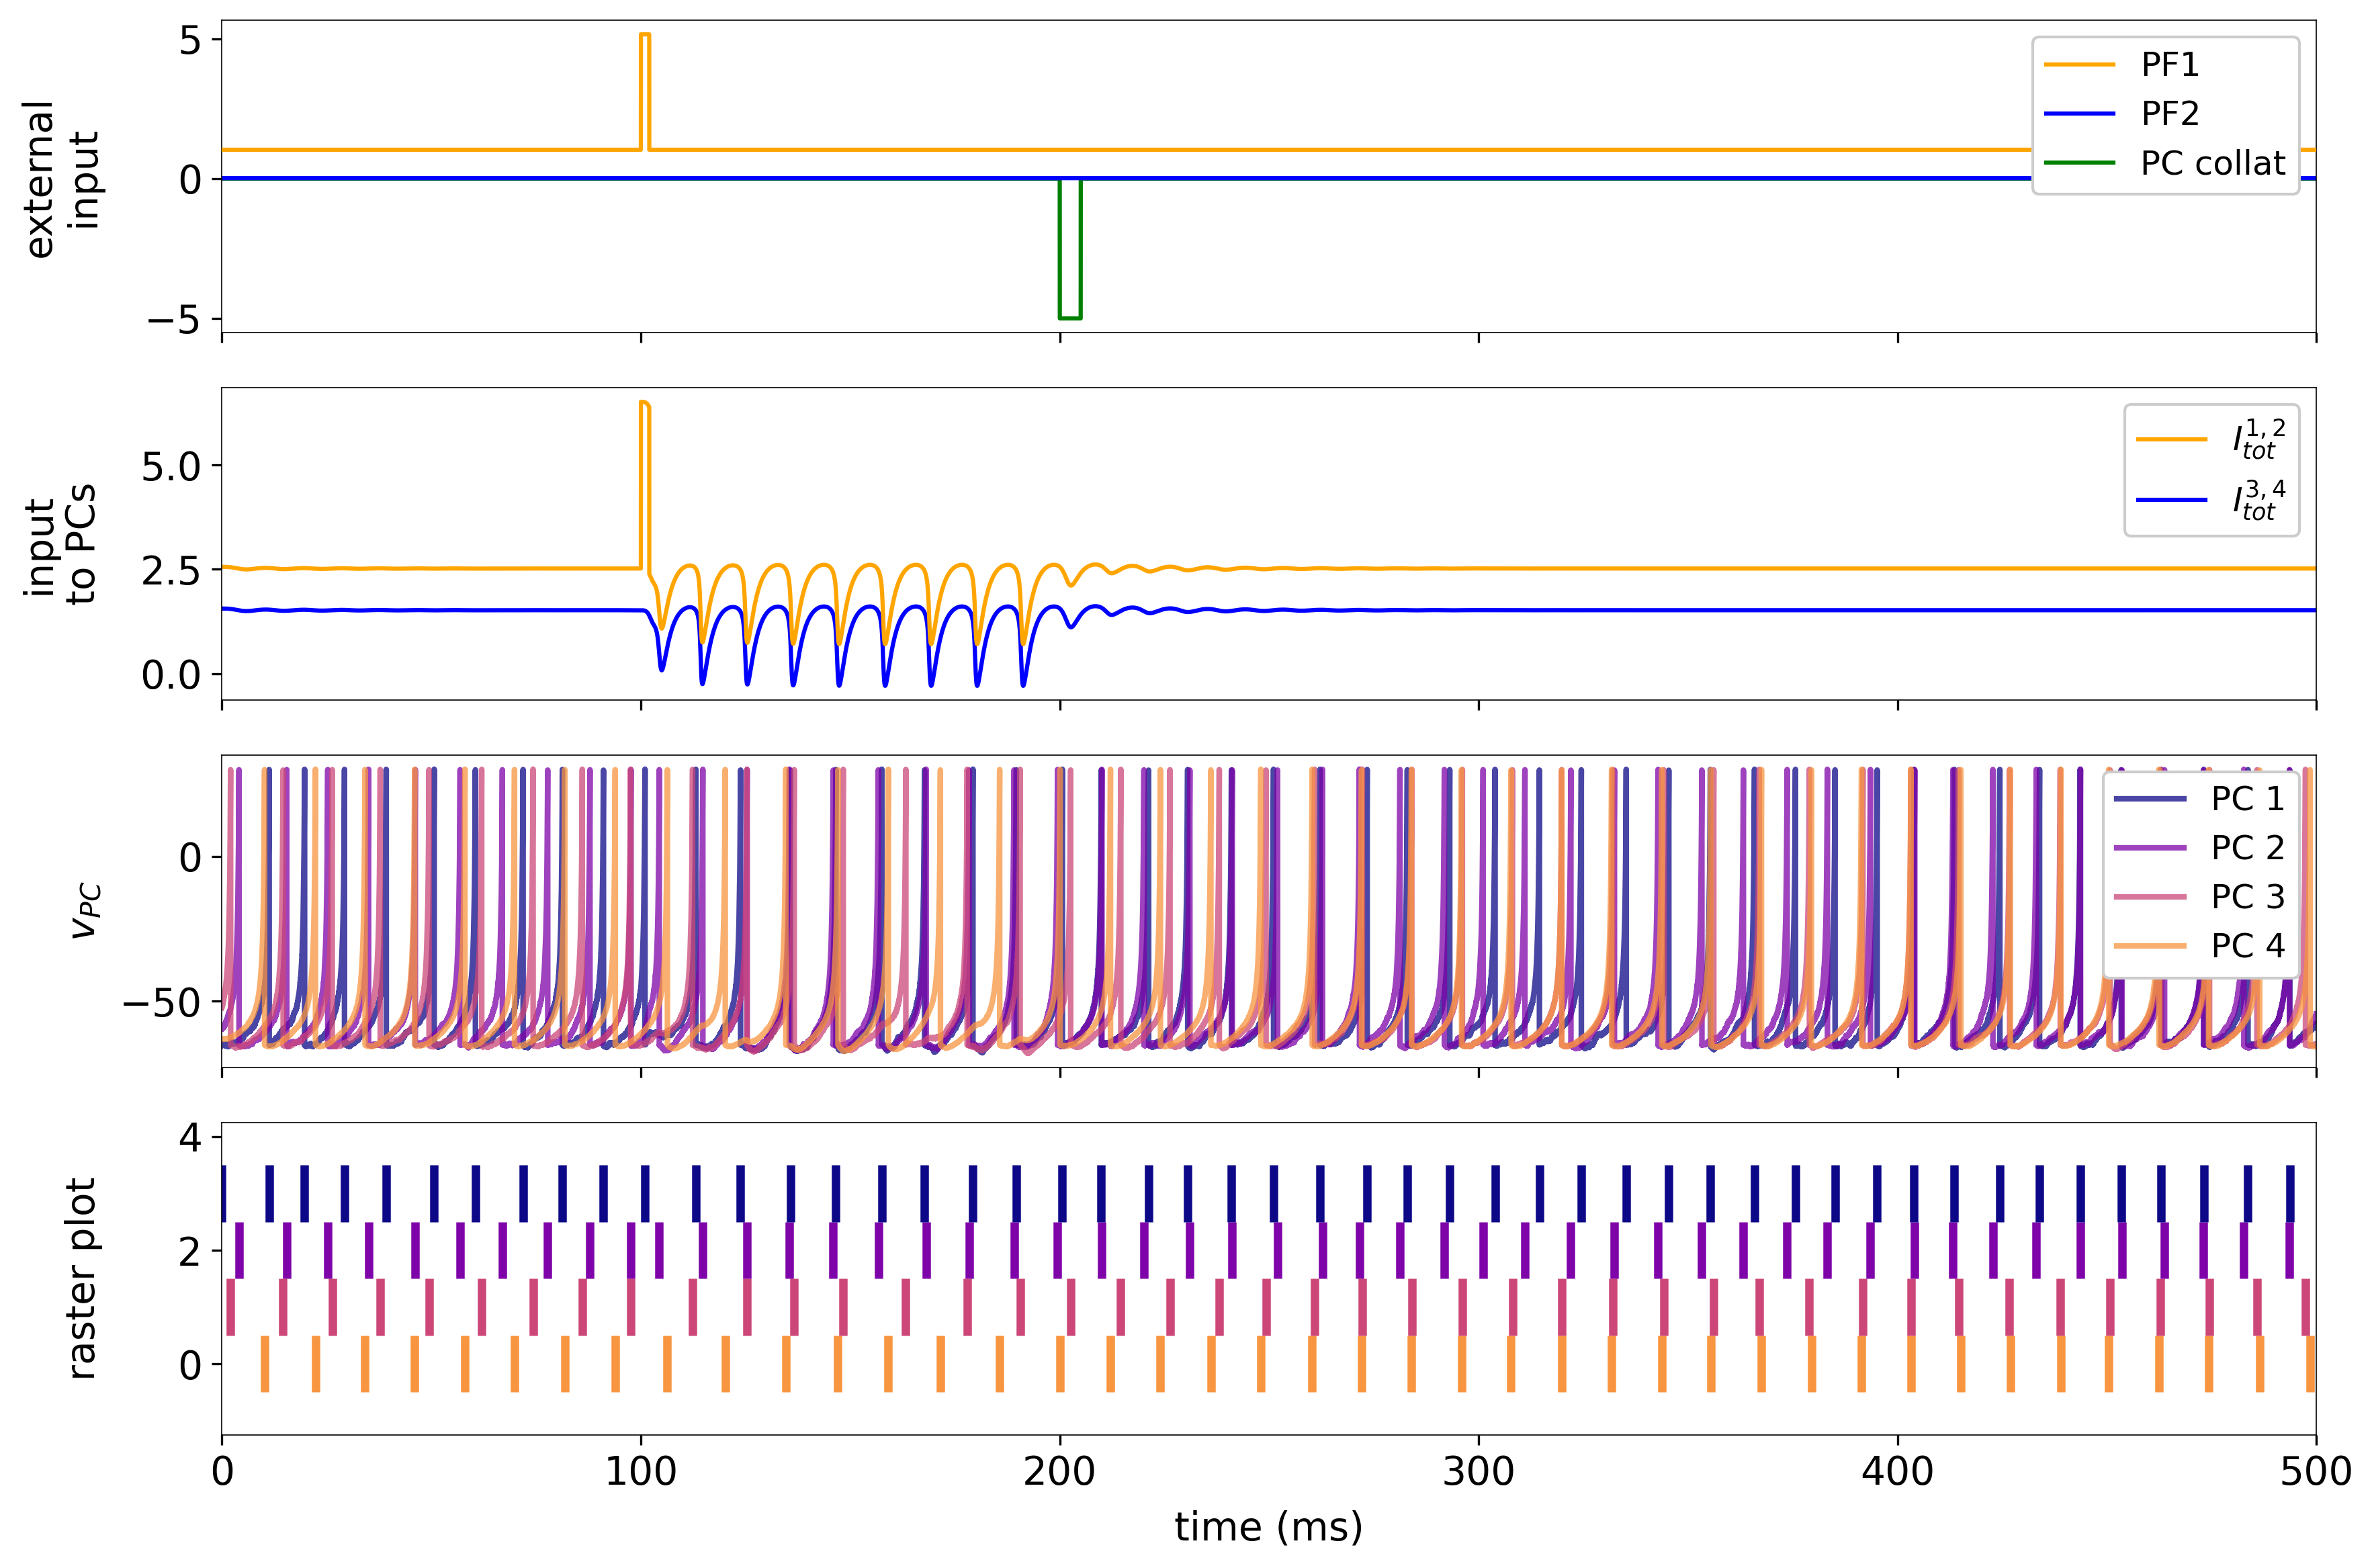

In [ ]:
from matplotlib.patches import Rectangle
from matplotlib.ticker import FormatStrFormatter
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 14#9
plt.rcParams['legend.fontsize'] = 12#7.
plt.rcParams['lines.markersize'] = 5
plt.rcParams['axes.labelsize'] = 14#9
plt.rcParams['axes.labelpad'] = 6
plt.rcParams['axes.linewidth'] = '0.4'
plt.rcParams['font.serif'] = 'Helvetica'
plt.rc('axes', axisbelow=True)
plt.rcParams['figure.dpi'] = 300

# Generating subplots
fig, ax = plt.subplots(4, 1, figsize=(12,8), sharex=True)
color = plt.cm.plasma(np.linspace(0,0.75,N[1]))

# Plotting injected current I
times = [float(STEP*k) for k in range(len(PF1))]
ax[0].plot(times, PF1*math.sqrt(STEP)+create_input([1, 5, 1], [100, 2, 398]), color='orange', label='PF1', zorder=3)
ax[0].plot(times, PF2*math.sqrt(STEP), color='blue', label='PF2', zorder=2)
ax[0].plot(times, PC_BC, color='green', label='PC collat', zorder=0)
ax[0].set_ylabel('external\ninput')
ax[0].legend(loc='upper right', framealpha=1)

# Plotting output of BCs
times_v = [float(STEP*k) for k in range(len(v_MLI_list[0]))]
#ax[1].plot(times_v, Jc*np.array(s_MLI_list[0]), c='purple', label=r'BCs', zorder=10)
ax[1].plot(times_v, create_input([I_back], [T])+create_input([1, 5, 1], [100, 2, 398])+JbSC*np.array(s_MLI_list[0])+JbBC*np.array(s_MLI_list[1]), c='orange', label='$I_{tot}^{1,2}$', zorder=1)
ax[1].plot(times_v, create_input([I_back], [T])++JbSC*np.array(s_MLI_list[0])+JbBC*np.array(s_MLI_list[1]), c='blue', label='$I_{tot}^{3,4}$', zorder=0)
#ax[1].plot(times_v, PF1+Jc*np.array(s_BC_list), c='red', label=r'total PC1 and 2', zorder=10)
#ax[1].plot(times_v, PF2+Jc*np.array(s_BC_list), c='blue', label=r'total PC3 and 4')
#ax[1].plot(times_v, 0.4225*np.ones_like(s_MLI_list[1]), c='k', alpha=.5, label=r'$I_{crit}$')

ax[1].set_ylabel('input\nto PCs')
ax[1].legend(loc='upper right', framealpha=1)

# Plotting voltage of PCs
for n in range(N[1]):
    if n == 2 or n == 3:
        ax[2].plot(times_v, v_PC_list[n], label=f'PC {n+1}', linestyle='-', linewidth=2, alpha=.75, c=color[n])
    else:
        ax[2].plot(times_v, v_PC_list[n], label=f'PC {n+1}', linestyle='-', linewidth=2, alpha=.75, c=color[n])

ax[2].set_ylabel(r'$v_{PC}$')
ax[2].legend(loc='upper right', framealpha=1)

# Plotting raster plot
ax[3].eventplot(raster[::-1], orientation='horizontal', colors=color[::-1], linewidths=3)
ax[3].set_xlabel('time (ms)')
ax[3].set_xlim(0, 500)
#ax[3].add_patch((Rectangle((100, 1.5), 100, 2, facecolor='#FAEDCB')))
ax[3].set_ylabel('raster plot')
fig.align_ylabels(ax)
plt.show()

## With noise

In [ ]:
# Parameters
T = 500
STEP = 1e-3
VR = -100
VP = 100

# Number of neurons in BCs, PCs
N = [1000, 4]

# Electrical coupling strength in BCs
g1, g2 = 0, 1.44
J1, J2 = -1, 0

Jc = -6 # Cross chemical coupling strength between MLIs
JbBC = -6 # Cross chemical coupling strength between BCs and PCs
JbSC = -2 # Cross chemical coupling strength between SCs and PCs

# BC properties
tau_m = 3.5
tau_d = 2
eta_mean = .5
delta = .3

I_back = 1.8

# Background noise to PCs (iid)
sigma1, sigma2, sigma3, sigma4 = 0.6, 0.5, 0.3, 0.1
I_background1, I_background2 = create_noisy_input([I_back], [T], sigma1), create_noisy_input([I_back], [T], sigma2)
I_background3, I_background4 = create_noisy_input([I_back], [T], sigma3), create_noisy_input([I_back], [T], sigma4)
I_background = np.array([I_background1, I_background2, I_background3, I_background4])

# Parallel Fibre inputs (iid)
sigma1, sigma2 = 0., 0.
dW1, dW2 = np.random.randn(int(T/STEP)), np.random.randn(int(T/STEP))
PF1 = create_noisy_input([1], [T], sigma1)
PF1[int(100/STEP):int(102/STEP)] = 5 # no noise in pulse
PF2 = create_noisy_input([0.5], [T], sigma2)

PC_BC = create_input([0, -5, 0], [200, 5, 295]) # Pulse inhibition that shuts down oscillations, no noise

w_PF1_PC = np.concatenate((np.ones(int(N[1]/2)), np.zeros(int(N[1]/2))), axis=0)
w_PF2_PC = np.concatenate((np.zeros(int(N[1]/2)), np.ones(int(N[1]/2))), axis=0)

# Compute splayed state ICs
v_PC_ICs, u_PC_ICs, v_MLI_ICs, r_MLI_ICs, s_MLI_ICs = initial_conditions(T, STEP, Jc, JbSC, JbBC, eta_mean, delta, tau_m, tau_d, I_background)


''' RUN THE SIMULATIONS OF MLIs and PCs '''
def run():
    # Initialize BCs
    v_MLI, r_MLI, s_MLI = v_MLI_ICs, r_MLI_ICs, s_MLI_ICs

    # Initialize PCs
    v_PC = v_PC_ICs
    u_PC = u_PC_ICs

    #c = list(zip(v_PC, u_PC))
    #random.shuffle(c)
    #v_PC, u_PC = zip(*c)

    v_PC, u_PC = np.array(v_PC), np.array(u_PC)

    for t in tqdm.tqdm(np.arange(0, T, STEP)):

        # Save values to list
        v_MLI_list[0].append(v_MLI[0])
        v_MLI_list[1].append(v_MLI[1])
        r_MLI_list[0].append(r_MLI[0])
        r_MLI_list[1].append(r_MLI[1])
        s_MLI_list[0].append(s_MLI[0])
        s_MLI_list[1].append(s_MLI[1])

        for n in range(N[1]):
            v_PC_list[n].append(v_PC[n])
            u_PC_list[n].append(u_PC[n])

        # Input to PCs
        I_PC = JbSC*s_MLI[0] + JbBC*s_MLI[1] + w_PF1_PC*PF1[int(t/STEP)-1] + w_PF2_PC*PF2[int(t/STEP)-1] + I_background[:,int(t/STEP)-1]

        # Input to BCs
        I_MLI = PF1[int(t/STEP)-1]+ PF2[int(t/STEP)-1]
        I_BC = PC_BC[int(t/STEP)-1]

        # Compute next value of BCs and PCs
        v_next_MLI, r_next_MLI, s_next_MLI = make_step_MLI(v_MLI, r_MLI, s_MLI, I_MLI, I_BC)
        v_next_PC, u_next_PC = make_step_PC(t, v_PC, u_PC, I_PC)

        # Update values
        v_MLI, v_PC = v_next_MLI, v_next_PC
        u_PC = u_next_PC
        r_MLI = r_next_MLI
        s_MLI = s_next_MLI

''' MAIN '''

v_MLI_list = [[], []]
r_MLI_list = [[], []]
s_MLI_list = [[], []]
v_PC_list = [[] for k in range(N[1])]
u_PC_list = [[] for k in range(N[1])]

run()

v_PC_list = np.array(v_PC_list)

raster = [[] for k in range(4)]
for k in range(len(v_PC_list)):
    raster[k] = np.where(v_PC_list[k] == c)[0]*STEP

100%|██████████| 500000/500000 [00:40<00:00, 12426.40it/s]


In [ ]:
from matplotlib.patches import Rectangle
from matplotlib.ticker import FormatStrFormatter
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 14#9
plt.rcParams['legend.fontsize'] = 12#7.
plt.rcParams['lines.markersize'] = 5
plt.rcParams['axes.labelsize'] = 14#9
plt.rcParams['axes.labelpad'] = 6
plt.rcParams['axes.linewidth'] = '0.4'
plt.rcParams['font.serif'] = 'Helvetica'
plt.rc('axes', axisbelow=True)
plt.rcParams['figure.dpi'] = 300

# Generating subplots
fig, ax = plt.subplots(4, 1, figsize=(12,8), sharex=True)
color = plt.cm.plasma(np.linspace(0,0.75,N[1]))

# Plotting injected current I
times = [float(STEP*k) for k in range(len(PF1))]
ax[0].plot(times, PF1, color='orange', label='PF1', zorder=3)
ax[0].plot(times, PF2, color='blue', label='PF2', zorder=2)
ax[0].plot(times, PC_BC, color='green', label='PC collat', zorder=0)
ax[0].set_ylabel('external\ninput')
ax[0].legend(loc='upper right', framealpha=1)

# Plotting output of BCs
times_v = [float(STEP*k) for k in range(len(v_MLI_list[0]))]
#ax[1].plot(times_v, Jc*np.array(s_MLI_list[0]), c='purple', label=r'BCs', zorder=10)
ax[1].plot(times_v, create_input([I_back], [T])+create_input([1, 5, 1], [100, 2, 398])+Jb*np.array(s_MLI_list[1]), c='red', label=r'BCs', zorder=1)
ax[1].plot(times_v, create_input([I_back], [T])+Jb*np.array(s_MLI_list[1]), c='blue', label=r'BCs', zorder=0)
#ax[1].plot(times_v, PF1+Jc*np.array(s_BC_list), c='red', label=r'total PC1 and 2', zorder=10)
#ax[1].plot(times_v, PF2+Jc*np.array(s_BC_list), c='blue', label=r'total PC3 and 4')
ax[1].plot(times_v, 0.4225*np.ones_like(s_MLI_list[1]), c='k', alpha=.5, label=r'$I_{crit}$')

ax[1].set_ylabel('input\nto PCs')
ax[1].legend(loc='upper right', framealpha=1)

# Plotting voltage of PCs
for n in range(N[1]):
    if n == 2 or n == 3:
        ax[2].plot(times_v, v_PC_list[n], label=f'PC {n+1}', linestyle='-', linewidth=2, alpha=.75, c=color[n])
    else:
        ax[2].plot(times_v, v_PC_list[n], label=f'PC {n+1}', linestyle='-', linewidth=2, alpha=.75, c=color[n])

ax[2].set_ylabel(r'$v_{PC}$')
ax[2].legend(loc='upper right', framealpha=1)

# Plotting raster plot
ax[3].eventplot(raster[::-1], orientation='horizontal', colors=color[::-1], linewidths=3)
ax[3].set_xlabel('time (ms)')
ax[3].set_xlim(0, 400)
ax[3].add_patch((Rectangle((120, 1.5), 150, 2, facecolor='#FAEDCB')))

fig.align_ylabels(ax)
plt.show()

NameError: name 'plt' is not defined

# More PCs

In [ ]:
from jax import jit, numpy as jnp
import numpy as np
import math, jax, tqdm, os, matplotlib, random
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams
from matplotlib.colors import ListedColormap

# PC properties: class 1 Izhikevich neuron
a = 0.2
b = 0.26
c = -65
d = 0

''' INTERNEURONS SIMULATION '''
def Analytical_MLI(v1, v2, r1, r2, s1, s2, I, I_BC):
    r1_dot = (delta/(tau_m*math.pi) + 2*r1*v1 - g1*r1)/tau_m
    r2_dot = (delta/(tau_m*math.pi) + 2*r2*v2 - g2*r2)/tau_m
    v1_dot = (v1**2 + eta_mean + J1*tau_m*s1 + Jc*tau_m*s2  + I - (math.pi*tau_m*r1)**2)/tau_m
    v2_dot = (v2**2 + eta_mean + J2*tau_m*s2 + Jc*tau_m*s1  + I + I_BC - (math.pi*tau_m*r2)**2)/tau_m
    s1_dot = (-s1 + r1)/tau_d
    s2_dot = (-s2 + r2)/tau_d

    return v1_dot, v2_dot, r1_dot, r2_dot, s1_dot, s2_dot

def make_step_MLI(v, r, s, I, I_BC):
    v1, v2 = v[0], v[1]
    r1, r2 = r[0], r[1]
    s1, s2 = s[0], s[1]

    dv1, dv2, dr1, dr2, ds1, ds2 = Analytical_MLI(v1, v2, r1, r2, s1, s2, I, I_BC)

    v1_next = v1 + STEP*dv1
    v2_next = v2 + STEP*dv2
    r1_next = r1 + STEP*dr1
    r2_next = r2 + STEP*dr2
    s1_next = s1 + STEP*ds1
    s2_next = s2 + STEP*ds2

    return [v1_next, v2_next], [r1_next, r2_next], [s1_next, s2_next]

''' PURKINJE CELL SIMULATION '''
def Izh_PC(t, v, u, I):
    dv = 0.04*v**2 + 5*v + 140 - u + I
    du = a*(b*v-u)

    return dv, du

def make_step_PC(t, v, u, I):
    dv, du = Izh_PC(t, v, u, I)
    v_next, u_next = v + STEP*dv, u + STEP*du

    if isinstance(v, np.ndarray):
        v_next[v_next >= 30] = c
        u_next[v_next >= 30] = u[v_next >= 30] + d
    else:
        if v_next >= 30:
            v_next = c

    return v_next, u_next

def create_input(values, durations, STEP=1e-3):
    input = []
    for k in range(len(values)):
        for t in np.arange(0, durations[k], STEP):
            input.append(values[k])
    return np.array(input)

def create_noisy_input(values, durations, sigma, STEP=1e-3):
    input = []
    dW = np.random.randn(int(sum(durations)/STEP))
    for k in range(len(values)):
        for t in np.arange(0, durations[k], STEP):
            input.append(values[k])

    return np.array(input) + sigma*dW/math.sqrt(STEP)

In [ ]:
def initial_conditions(T, STEP, Jc, Jb, eta_mean, delta, tau_m, tau_d, I_background):
    v_PC_IC, u_PC_IC = [], []

    # Arbitrarily initialize BCs
    v_MLI, r_MLI, s_MLI = [0, -10], [0, 0], [0, 0] # Start in SF regime

    # Arbitrarily initialize PC
    v_PC = -60
    u_PC = 0

    for t in tqdm.tqdm(np.arange(0, T, STEP)):
        v_PC_IC.append(v_PC)
        u_PC_IC.append(u_PC)

        # Input to PC
        I_PC = Jb*s_MLI[1] + 3 + 1 #PF receives input from mean BCs, background input=3, PF1=1 and PF2=0

        # Input to MLIs
        I_MLI = 1 # MLIs receive input from PF1=1 and PF2=0
        I_BC = 0 # BCs receive input from PC=0

        # Compute next value of BCs and PCs
        v_next_MLI, r_next_MLI, s_next_MLI = make_step_MLI(v_MLI, r_MLI, s_MLI, I_MLI, I_BC)
        v_next_PC, u_next_PC = make_step_PC(t, v_PC, u_PC, I_PC)

        # Update values
        v_PC, v_MLI = v_next_PC, v_next_MLI
        u_PC, r_MLI, s_MLI = u_next_PC, r_next_MLI, s_next_MLI

    v_PC_IC, u_PC_IC = np.array(v_PC_IC), np.array(u_PC_IC)
    spikes = np.where(v_PC_IC == c)[0]
    T1, T2 = spikes[-1], spikes[-2]
    inc = int((T2-T1)/4)

    return [v_PC_IC[T1], v_PC_IC[T1+2*inc], v_PC_IC[T1+inc], v_PC_IC[T1+3*inc]], [u_PC_IC[T1], u_PC_IC[T1+2*inc], u_PC_IC[T1+inc], u_PC_IC[T1+3*inc]], v_MLI, r_MLI, s_MLI

## With noise

In [ ]:
# Parameters
T = 500
STEP = 1e-3
VR = -100
VP = 100

# Number of neurons in BCs, PCs
N = [1000, 8]

# Electrical coupling strength in BCs
g1, g2 = 0, 1.44
J1, J2 = -1, 0

Jc = -6 # Cross chemical coupling strength between MLIs
Jb = -10 # Cross chemical coupling strength between  BCs and PCs

# BC properties
tau_m = 3.5
tau_d = 2
eta_mean = .5
delta = .3

I_back = 1.8

# Background noise to PCs (iid)
sigma1, sigma2, sigma3, sigma4 = 0., 0., 0., 0.
I_background1, I_background2 = create_noisy_input([I_back], [T], sigma1), create_noisy_input([I_back], [T], sigma2)
I_background3, I_background4 = create_noisy_input([I_back], [T], sigma3), create_noisy_input([I_back], [T], sigma4)
I_background = np.array([I_background1, I_background2, I_background1, I_background2, I_background3, I_background4, I_background3, I_background4])

# Parallel Fibre inputs (iid)
sigma1, sigma2 = 0., 0.
dW1, dW2 = np.random.randn(int(T/STEP)), np.random.randn(int(T/STEP))
PF1 = create_noisy_input([1], [T], sigma1)
PF1[int(100/STEP):int(102/STEP)] = 5 # no noise in pulse
PF2 = create_noisy_input([0.5], [T], sigma2)

PC_BC = create_input([0, 0, 0], [200, 5, 295]) # Pulse inhibition that shuts down oscillations, no noise

w_PF1_PC = np.concatenate((np.ones(int(N[1]/2)), np.zeros(int(N[1]/2))), axis=0)
w_PF2_PC = np.concatenate((np.zeros(int(N[1]/2)), np.ones(int(N[1]/2))), axis=0)

# Compute splayed state ICs
v_PC_ICs, u_PC_ICs, v_MLI_ICs, r_MLI_ICs, s_MLI_ICs = initial_conditions(T, STEP, Jc, Jb, eta_mean, delta, tau_m, tau_d, I_background)


''' RUN THE SIMULATIONS OF MLIs and PCs '''
def run():
    # Initialize BCs
    v_MLI, r_MLI, s_MLI = v_MLI_ICs, r_MLI_ICs, s_MLI_ICs

    # Initialize PCs
    v_PC = [v_PC_ICs]+[v_PC_ICs]
    u_PC = [u_PC_ICs]+[u_PC_ICs]

    v_PC, u_PC = np.array(v_PC).flatten(), np.array(u_PC).flatten()

    for t in tqdm.tqdm(np.arange(0, T, STEP)):

        # Save values to list
        v_MLI_list[0].append(v_MLI[0])
        v_MLI_list[1].append(v_MLI[1])
        r_MLI_list[0].append(r_MLI[0])
        r_MLI_list[1].append(r_MLI[1])
        s_MLI_list[0].append(s_MLI[0])
        s_MLI_list[1].append(s_MLI[1])

        for n in range(N[1]):
            v_PC_list[n].append(v_PC[n])
            u_PC_list[n].append(u_PC[n])

        # Input to PCs
        I_PC = Jb*s_MLI[1] + w_PF1_PC*PF1[int(t/STEP)-1] + w_PF2_PC*PF2[int(t/STEP)-1] + I_background[:,int(t/STEP)-1]

        # Input to BCs
        I_MLI = PF1[int(t/STEP)-1]+ PF2[int(t/STEP)-1]
        I_BC = PC_BC[int(t/STEP)-1]

        # Compute next value of BCs and PCs
        v_next_MLI, r_next_MLI, s_next_MLI = make_step_MLI(v_MLI, r_MLI, s_MLI, I_MLI, I_BC)
        v_next_PC, u_next_PC = make_step_PC(t, v_PC, u_PC, I_PC)

        # Update values
        v_MLI, v_PC = v_next_MLI, v_next_PC
        u_PC = u_next_PC
        r_MLI = r_next_MLI
        s_MLI = s_next_MLI

''' MAIN '''

v_MLI_list = [[], []]
r_MLI_list = [[], []]
s_MLI_list = [[], []]
v_PC_list = [[] for k in range(N[1])]
u_PC_list = [[] for k in range(N[1])]

run()

v_PC_list = np.array(v_PC_list)

raster = [[] for k in range(N[1])]
for k in range(len(v_PC_list)):
    raster[k] = np.where(v_PC_list[k] == c)[0]*STEP

 10%|█         | 50001/500000 [00:03<00:28, 15996.67it/s]


IndexError: index 50000 is out of bounds for axis 0 with size 50000

In [ ]:
from matplotlib.patches import Rectangle

# Generating subplots
fig, ax = plt.subplots(4, 1, figsize=(20,10), sharex=True)
color = plt.cm.plasma(np.linspace(0,0.75,N[1]))

# Plotting injected current I
times = [float(STEP*k) for k in range(len(PF1))]
ax[0].plot(times, PF1*math.sqrt(STEP)+create_input([1, 5, 1], [100, 2, 398]), color='orange', label='PF1', zorder=10)
ax[0].plot(times, PF2*math.sqrt(STEP), color='blue', label='PF2', zorder=9)
ax[0].plot(times, PC_BC, color='green', label='PC collat')
ax[0].set_ylabel(r'$I(t)$')
ax[0].legend(loc='upper right')

# Plotting output of BCs
times_v = [float(STEP*k) for k in range(len(v_MLI_list[0]))]
#ax[1].plot(times_v, Jc*np.array(s_MLI_list[0]), c='purple', label=r'BCs', zorder=10)
ax[1].plot(times_v, create_input([I_back], [T])+create_input([1, 5, 1], [100, 2, 398])+Jb*np.array(s_MLI_list[1]), c='red', label=r'BCs', zorder=1)
ax[1].plot(times_v, create_input([I_back], [T])+Jb*np.array(s_MLI_list[1]), c='blue', label=r'BCs', zorder=0)
#ax[1].plot(times_v, PF1+Jc*np.array(s_BC_list), c='red', label=r'total PC1 and 2', zorder=10)
#ax[1].plot(times_v, PF2+Jc*np.array(s_BC_list), c='blue', label=r'total PC3 and 4')
ax[1].plot(times_v, 0.4225*np.ones_like(s_MLI_list[1]), c='k', alpha=.5, label=r'$I_{crit}$')

ax[1].set_ylabel('BC output\nto PC')
ax[1].legend(loc='upper right')

# Plotting voltage of PCs
for n in range(N[1]):
    if n == 2 or n == 3:
        ax[2].plot(times_v, v_PC_list[n], label=f'PC {n+1}', linestyle='--', linewidth=2, alpha=.75, c=color[n])
    else:
        ax[2].plot(times_v, v_PC_list[n], label=f'PC {n+1}', linestyle='-', linewidth=2, alpha=.75, c=color[n])

ax[2].set_ylabel(r'$v_{PC}$')
ax[2].legend(loc='upper right')

# Plotting raster plot
ax[3].eventplot(raster[::-1], orientation='horizontal', colors=color[::-1], linewidths=3)
ax[3].set_xlabel('time')
ax[3].set_xlim(0, 500)
#ax[3].add_patch((Rectangle((100, 1.5), 100, 2, facecolor='#FAEDCB')))

fig.align_ylabels(ax)
plt.show()

# Toy Model 4

In [ ]:
from jax import jit, numpy as jnp
import numpy as np
import math, jax, tqdm, os, matplotlib, random
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams
from matplotlib.colors import ListedColormap

STEP=0.001

# PC properties: class 1 Izhikevich neuron
a = 0.2
b = 0.26
c = -65
d = 0

''' INTERNEURONS SIMULATION '''
def Analytical_MLI(v1, v2, r1, r2, s1, s2, I, I_BC):
    r1_dot = (delta/(tau_m*math.pi) + 2*r1*v1 - g1*r1)/tau_m
    r2_dot = (delta/(tau_m*math.pi) + 2*r2*v2 - g2*r2)/tau_m
    v1_dot = (v1**2 + eta_mean + J1*tau_m*s1 + Jc*tau_m*s2  + I - (math.pi*tau_m*r1)**2)/tau_m
    v2_dot = (v2**2 + eta_mean + J2*tau_m*s2 + Jc*tau_m*s1  + I + I_BC - (math.pi*tau_m*r2)**2)/tau_m
    s1_dot = (-s1 + r1)/tau_d
    s2_dot = (-s2 + r2)/tau_d

    return v1_dot, v2_dot, r1_dot, r2_dot, s1_dot, s2_dot

def make_step_MLI(v, r, s, I, I_BC):
    v1, v2 = v[0], v[1]
    r1, r2 = r[0], r[1]
    s1, s2 = s[0], s[1]

    dv1, dv2, dr1, dr2, ds1, ds2 = Analytical_MLI(v1, v2, r1, r2, s1, s2, I, I_BC)

    v1_next = v1 + STEP*dv1
    v2_next = v2 + STEP*dv2
    r1_next = r1 + STEP*dr1
    r2_next = r2 + STEP*dr2
    s1_next = s1 + STEP*ds1
    s2_next = s2 + STEP*ds2

    return [v1_next, v2_next], [r1_next, r2_next], [s1_next, s2_next]

''' PURKINJE CELL SIMULATION '''
def Izh_PC(t, v, u, I):
    dv = 0.04*v**2 + 5*v + 140 - u + I
    du = a*(b*v-u)

    return dv, du

def make_step_PC(t, v, u, I):
    dv, du = Izh_PC(t, v, u, I)
    v_next, u_next = v + STEP*dv, u + STEP*du

    if isinstance(v, np.ndarray):
        v_next[v_next > 30] = c
        u_next[v_next > 30] = u[v_next > 30] + d
    else:
        if v_next > 30:
            v_next = c

    return v_next, u_next

def create_input(values, durations, STEP=STEP):
    input = []
    for k in range(len(values)):
        for t in np.arange(0, durations[k], STEP):
            input.append(values[k])
    return np.array(input)

def create_wn(duration, sigma, STEP=STEP):
    dW = np.random.randn(int(duration/STEP))
    return sigma*dW/math.sqrt(STEP)

In [ ]:
def initial_conditions(T, STEP, Jc, Jb, eta_mean, delta, tau_m, tau_d, I_background):
    v_PC_IC, u_PC_IC = [], []

    # Arbitrarily initialize BCs
    v_MLI, r_MLI, s_MLI = [0, -10], [0, 0], [0, 0] # Start in SF regime

    # Arbitrarily initialize PC
    v_PC = -60
    u_PC = 0

    for t in tqdm.tqdm(np.arange(0, T, STEP)):
        v_PC_IC.append(v_PC)
        u_PC_IC.append(u_PC)

        # Input to PC
        I_PC = Jb*s_MLI[1] + 3 + 1 #PF receives input from mean BCs, background input=3, PF1=1 and PF2=0

        # Input to MLIs
        I_MLI = 1 # MLIs receive input from PF1=1 and PF2=0
        I_BC = 0 # BCs receive input from PC=0

        # Compute next value of BCs and PCs
        v_next_MLI, r_next_MLI, s_next_MLI = make_step_MLI(v_MLI, r_MLI, s_MLI, I_MLI, I_BC)
        v_next_PC, u_next_PC = make_step_PC(t, v_PC, u_PC, I_PC)

        # Update values
        v_PC, v_MLI = v_next_PC, v_next_MLI
        u_PC, r_MLI, s_MLI = u_next_PC, r_next_MLI, s_next_MLI

    v_PC_IC, u_PC_IC = np.array(v_PC_IC), np.array(u_PC_IC)
    spikes = np.where(v_PC_IC == c)[0]
    T1, T2 = spikes[-1], spikes[-2]
    inc = int((T2-T1)/4)

    return [v_PC_IC[T1], v_PC_IC[T1+2*inc], v_PC_IC[T1+inc], v_PC_IC[T1+3*inc]], [u_PC_IC[T1], u_PC_IC[T1+2*inc], u_PC_IC[T1+inc], u_PC_IC[T1+3*inc]], v_MLI, r_MLI, s_MLI

## Without noise

In [ ]:
# Parameters
T = 500
STEP = 0.001
VR = -100
VP = 100

# Number of neurons in BCs, PCs
N = [1000, 8]

# Electrical coupling strength in BCs
g1, g2 = 0, 1.5
J1, J2 = -1, 0

Jc = -6 # Cross chemical coupling strength between MLIs

Jb = -10 # Cross chemical coupling strength between  BCs and PCs
Jb1= -8
Jb2= -2

# BC properties
tau_m = 3.4
tau_d = 1
eta_mean = .5
delta = .3

I_back = 1.6

# Background noise to PCs
I_background = create_input([I_back], [T])

# Parallel Fibre inputs (iid)
PF1 = create_input([1], [T])
PF1[int(100/STEP):int(105/STEP)] = 4
PF2 = create_input([0.], [T])

PC_BC = create_input([0, -5, 0], [210, 2, 288]) # Pulse inhibition that shuts down oscillations, no noise

w_PF1_PC = np.concatenate((np.ones(int(N[1]/2)), np.zeros(int(N[1]/2))), axis=0)
w_PF2_PC = np.concatenate((np.zeros(int(N[1]/2)), np.ones(int(N[1]/2))), axis=0)

# Compute splayed state ICs
v_PC_ICs, u_PC_ICs, v_MLI_ICs, r_MLI_ICs, s_MLI_ICs = initial_conditions(T, STEP, Jc, Jb, eta_mean, delta, tau_m, tau_d, I_background)


''' RUN THE SIMULATIONS OF MLIs and PCs '''
def run():
    # Initialize BCs
    v_MLI, r_MLI, s_MLI = v_MLI_ICs, r_MLI_ICs, s_MLI_ICs

    # Initialize PCs
    v_PC = [v_PC_ICs]+[v_PC_ICs]
    u_PC = [u_PC_ICs]+[u_PC_ICs]

    v_PC, u_PC = np.array(v_PC).flatten(), np.array(u_PC).flatten()

    for t in tqdm.tqdm(np.arange(0, T, STEP)):

        # Save values to list
        v_MLI_list[0].append(v_MLI[0])
        v_MLI_list[1].append(v_MLI[1])
        r_MLI_list[0].append(r_MLI[0])
        r_MLI_list[1].append(r_MLI[1])
        s_MLI_list[0].append(s_MLI[0])
        s_MLI_list[1].append(s_MLI[1])

        for n in range(N[1]):
            v_PC_list[n].append(v_PC[n])
            u_PC_list[n].append(u_PC[n])

        # Input to PCs
        I_PC = Jb1*s_MLI[1] + Jb2*s_MLI[0] + w_PF1_PC*PF1[int(t/STEP)-1] + w_PF2_PC*PF2[int(t/STEP)-1] + I_background[int(t/STEP)-1]

        # Input to BCs
        I_MLI = PF1[int(t/STEP)-1]+ PF2[int(t/STEP)-1]
        I_BC = PC_BC[int(t/STEP)-1]

        # Compute next value of BCs and PCs
        v_next_MLI, r_next_MLI, s_next_MLI = make_step_MLI(v_MLI, r_MLI, s_MLI, I_MLI, I_BC)
        v_next_PC, u_next_PC = make_step_PC(t, v_PC, u_PC, I_PC)

        # Update values
        v_MLI, v_PC = v_next_MLI, v_next_PC
        u_PC = u_next_PC
        r_MLI = r_next_MLI
        s_MLI = s_next_MLI

''' MAIN '''

v_MLI_list = [[], []]
r_MLI_list = [[], []]
s_MLI_list = [[], []]
v_PC_list = [[] for k in range(N[1])]
u_PC_list = [[] for k in range(N[1])]

run()

v_PC_list = np.array(v_PC_list)

raster = [[] for k in range(N[1])]
for k in range(len(v_PC_list)):
    raster[k] = np.where(v_PC_list[k] == c)[0]*STEP

100%|██████████| 500000/500000 [00:54<00:00, 9128.09it/s] 


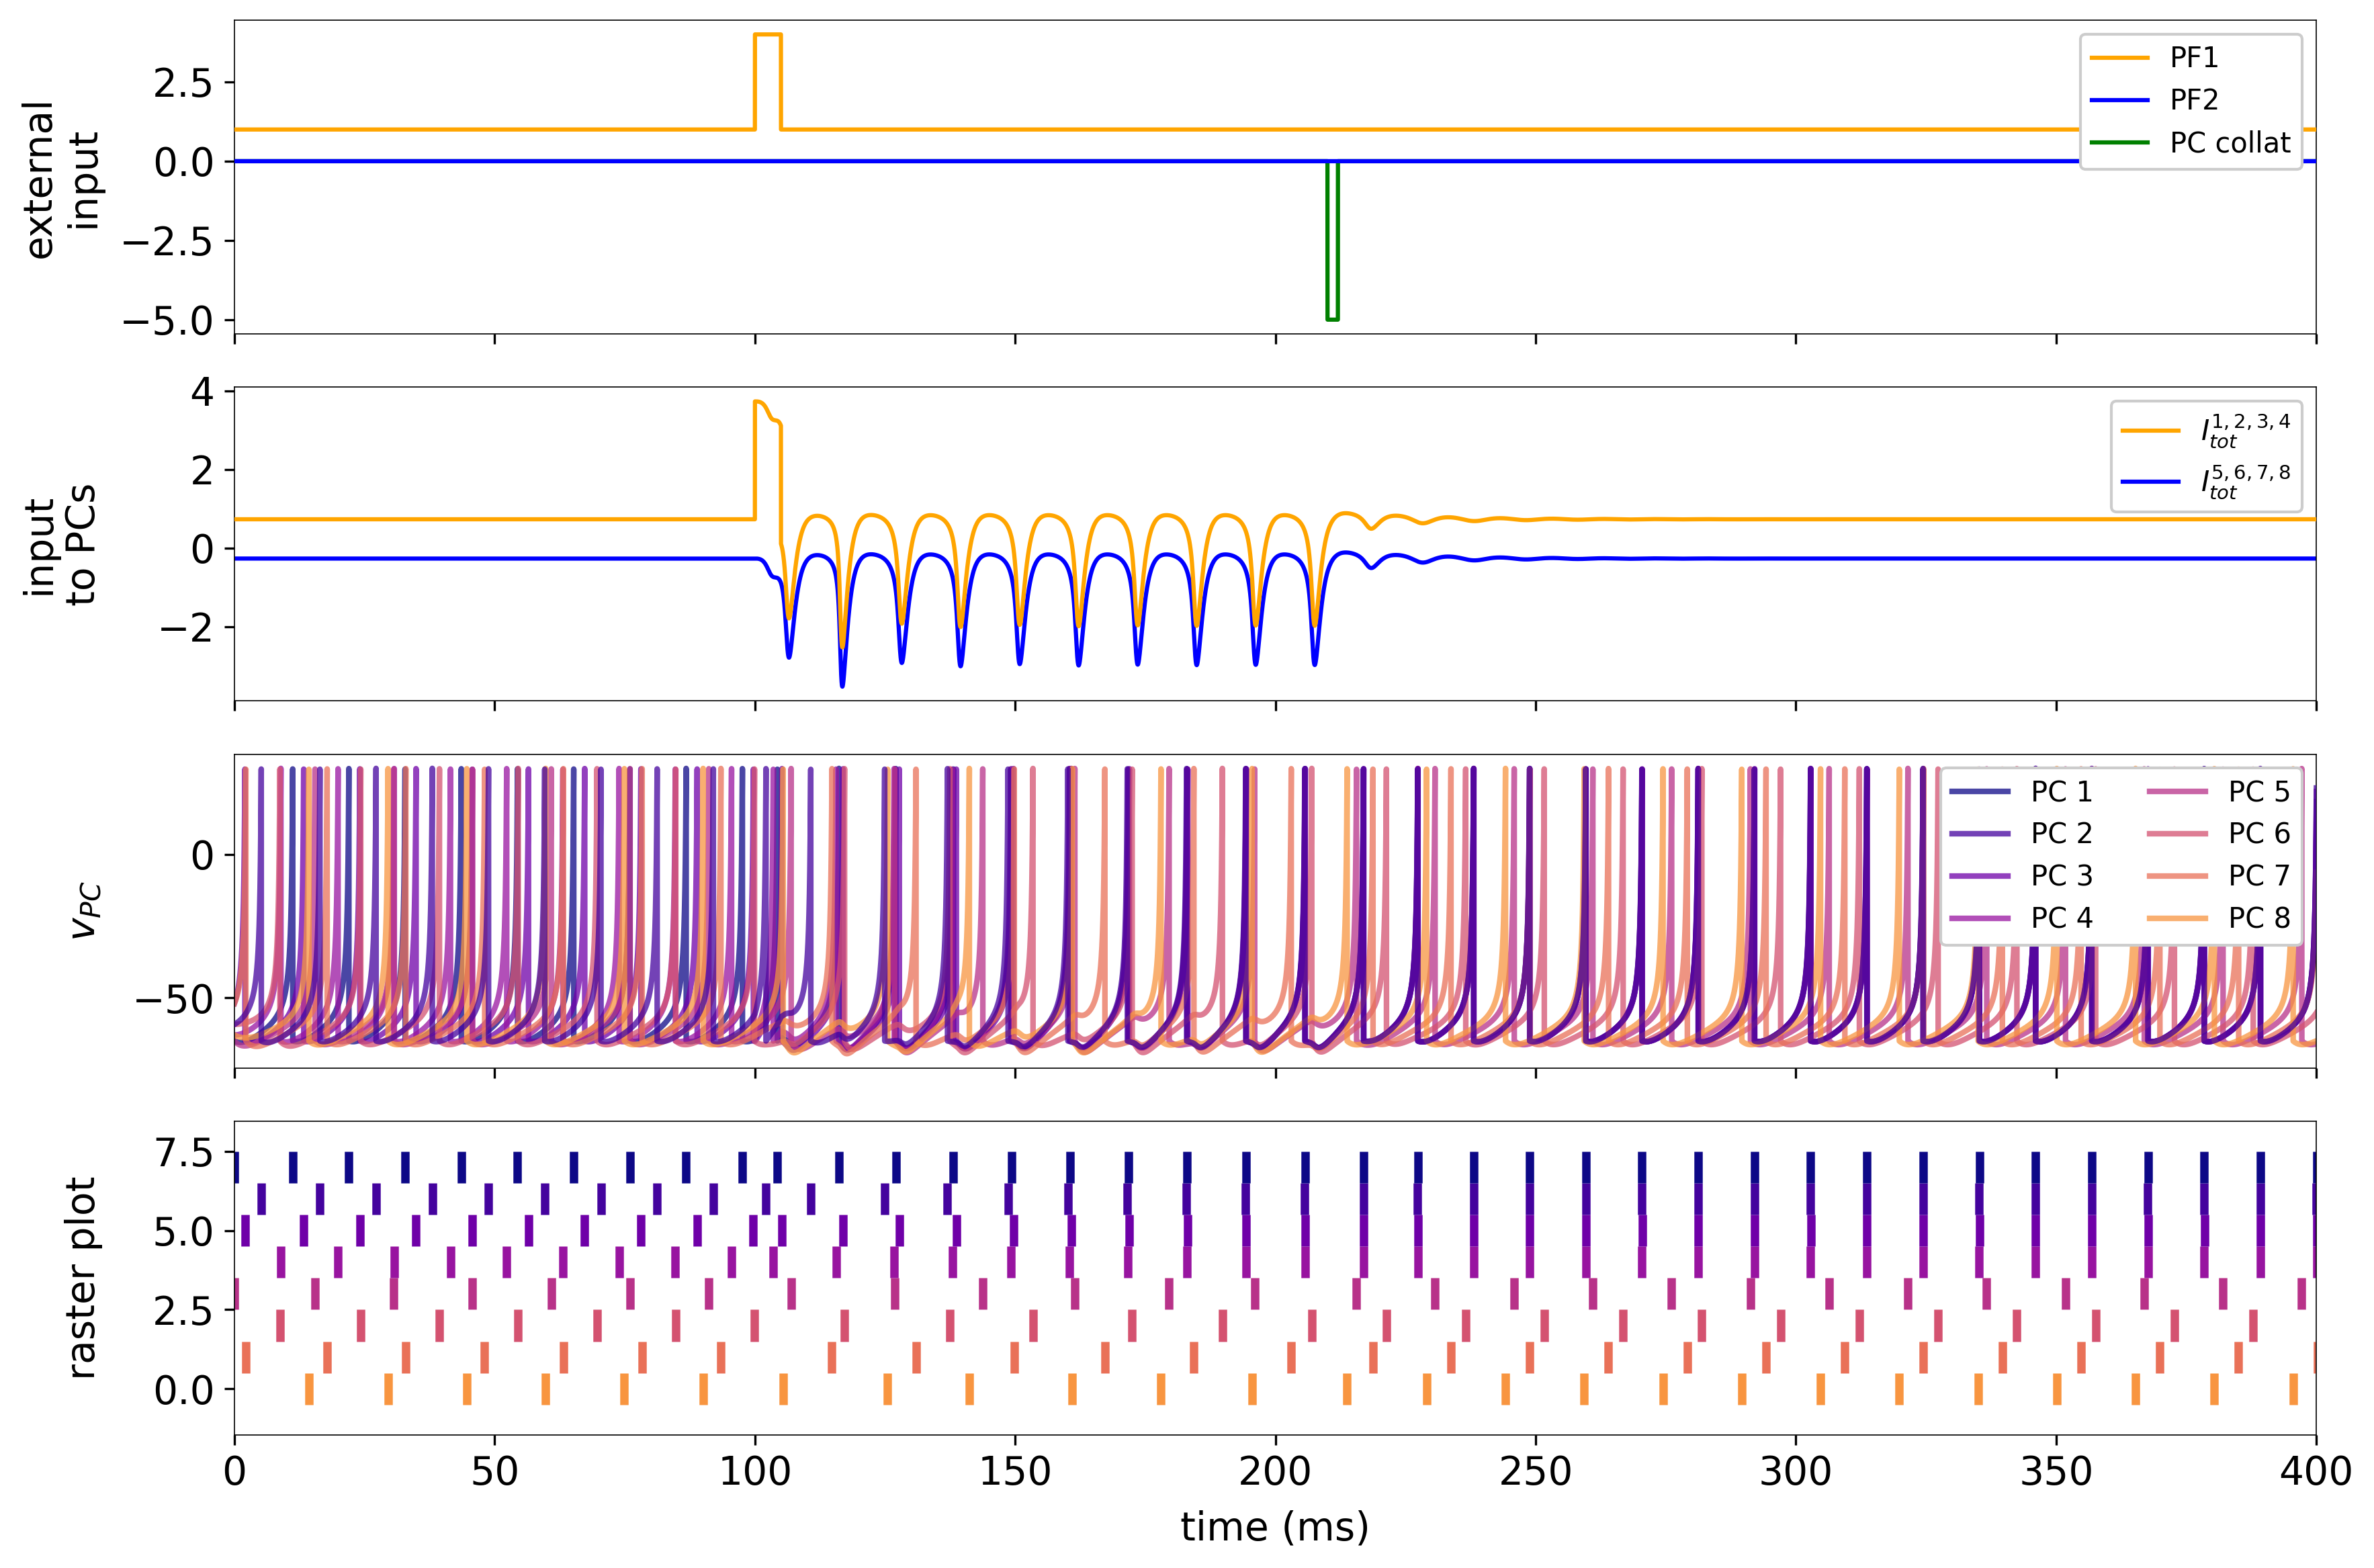

In [ ]:
from matplotlib.patches import Rectangle
from matplotlib.ticker import FormatStrFormatter
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 14#9
plt.rcParams['legend.fontsize'] = 10#7.
plt.rcParams['lines.markersize'] = 5
plt.rcParams['axes.labelsize'] = 14#9
plt.rcParams['axes.labelpad'] = 6
plt.rcParams['axes.linewidth'] = '0.4'
plt.rcParams['font.serif'] = 'Helvetica'
plt.rc('axes', axisbelow=True)
plt.rcParams['figure.dpi'] = 300

# Generating subplots
fig, ax = plt.subplots(4, 1, figsize=(12,8), sharex=True)
color = plt.cm.plasma(np.linspace(0,0.75,N[1]))

# Plotting injected current I
times = [float(STEP*k) for k in range(len(PF1))]
ax[0].plot(times, PF1, color='orange', label='PF1', zorder=4)
ax[0].plot(times, PF2, color='blue', label='PF2', zorder=3)
ax[0].plot(times, PC_BC, color='green', label='PC collat')
ax[0].set_ylabel('external\ninput')
ax[0].legend(loc='upper right', framealpha=1)

# Plotting output of BCs
times_v = [float(STEP*k) for k in range(len(v_MLI_list[0]))]
#ax[1].plot(times_v, Jc*np.array(s_MLI_list[0]), c='purple', label=r'BCs', zorder=10)
#ax[1].plot(times_v, create_input([I_back], [T])+create_input([1, 5, 1], [100, 2, 398])+Jb*np.array(s_MLI_list[1]), c='red', label=r'BCs', zorder=1)
#ax[1].plot(times_v, create_input([I_back], [T])+Jb*np.array(s_MLI_list[0]), c='blue', label=r'BCs', zorder=0)

#ax[1].plot(times_v, I_back+PF1+Jb*np.array(s_MLI_list[1]), c='red', label=r'BCs', zorder=1)
#ax[1].plot(times_v, I_back+PF1+Jb*np.array(s_MLI_list[0]), c='blue', label=r'BCs', zorder=0)

#ax[1].plot(times_v, np.array(s_MLI_list[1]), c='blue', label=r'BCs', zorder=2)
#ax[1].plot(times_v, np.array(s_MLI_list[0]), c='purple', label=r'BCs', zorder=2)

ax[1].plot(times_v, PF1+Jb1*np.array(s_MLI_list[1])+Jb2*np.array(s_MLI_list[0]), c='orange', label='$I_{tot}^{1,2,3,4}$', zorder=3)
ax[1].plot(times_v, PF2+Jb1*np.array(s_MLI_list[1])+Jb2*np.array(s_MLI_list[0]), c='blue', label='$I_{tot}^{5,6,7,8}$', zorder=2)
#ax[1].plot(times_v, 0.4*np.ones_like(s_MLI_list[1]), c='k', alpha=.5, label=r'$I_{min}$')

ax[1].set_ylabel('input\nto PCs')
ax[1].legend(loc='upper right', framealpha=1)

# Plotting voltage of PCs
for n in range(N[1]):
    if n ==1:
        ax[2].plot(times_v, v_PC_list[n], label=f'PC {n+1}', linestyle='-', linewidth=2, alpha=.75, c=color[n], zorder=4)
    else:
        ax[2].plot(times_v, v_PC_list[n], label=f'PC {n+1}', linestyle='-', linewidth=2, alpha=.75, c=color[n])
#ax[2].plot(times_v, v_MLI_list[1])
#ax[2].plot(times_v, v_MLI_list[0])
ax[2].set_ylabel(r'$v_{PC}$')
ax[2].legend(loc='upper right', framealpha=1, ncol=2)

# Plotting raster plot
ax[3].eventplot(raster[::-1], orientation='horizontal', colors=color[::-1], linewidths=3)
ax[3].set_xlabel('time (ms)')
ax[3].set_ylabel('raster plot')
ax[3].set_xlim(0, 400)
#ax[3].add_patch((Rectangle((100, 3.5), 110, 4, facecolor='#FAEDCB')))

fig.align_ylabels(ax)
plt.show()

## With noise

In [ ]:
# Parameters
T = 500
STEP = 0.001
VR = -100
VP = 100

# Number of neurons in BCs, PCs
N = [1000, 8]

# Electrical coupling strength in BCs
g1, g2 = 0, 1.5
J1, J2 = -1, 0

Jc = -6 # Cross chemical coupling strength between MLIs

Jb = -10 # Cross chemical coupling strength between  BCs and PCs
Jb1 = -8
Jb2 = -2

# BC properties
tau_m = 3.4
tau_d = 1
eta_mean = .5
delta = .3

I_back = 1.6

# Background noise to PCs (iid)
I_background = []
sigma = [0.4, 0.2, 0.5, 0.3, 0.2, 0.4, 0.6, 0.5]
for n in range(N[1]):
    I_backgroundn = create_wn(T, sigma[n])
    I_background.append(I_back + I_backgroundn)
I_background = np.array(I_background)

# Parallel Fibre inputs (iid)
sigma1, sigma2 = 0.05, 0.05
PF1_stoch = create_wn(T, sigma1)
PF1_det = np.ones(int(T/STEP))
PF1_det[int(100/STEP):int(105/STEP)] += 4

# Setting up PF1 for plots
PF1_plt = 1 + PF1_stoch*math.sqrt(STEP)
PF1_plt[int(100/STEP):int(105/STEP)] += 4

#PF1[int(100/STEP):int(105/STEP)] = 4 # no noise in pulse
PF2 = create_wn(T, sigma2)

PC_BC = create_input([0, -5, 0], [200, 2, 298]) # Pulse inhibition that shuts down oscillations, no noise

w_PF1_PC = np.concatenate((np.ones(int(N[1]/2)), np.zeros(int(N[1]/2))), axis=0)
w_PF2_PC = np.concatenate((np.zeros(int(N[1]/2)), np.ones(int(N[1]/2))), axis=0)

# Compute splayed state ICs
v_PC_ICs, u_PC_ICs, v_MLI_ICs, r_MLI_ICs, s_MLI_ICs = initial_conditions(T, STEP, Jc, Jb, eta_mean, delta, tau_m, tau_d, I_background)


''' RUN THE SIMULATIONS OF MLIs and PCs '''
def run():
    # Initialize BCs
    v_MLI, r_MLI, s_MLI = v_MLI_ICs, r_MLI_ICs, s_MLI_ICs

    # Initialize PCs
    v_PC = [v_PC_ICs]+[v_PC_ICs]
    u_PC = [u_PC_ICs]+[u_PC_ICs]

    v_PC, u_PC = np.array(v_PC).flatten(), np.array(u_PC).flatten()

    for t in tqdm.tqdm(np.arange(0, T, STEP)):

        # Save values to list
        v_MLI_list[0].append(v_MLI[0])
        v_MLI_list[1].append(v_MLI[1])
        r_MLI_list[0].append(r_MLI[0])
        r_MLI_list[1].append(r_MLI[1])
        s_MLI_list[0].append(s_MLI[0])
        s_MLI_list[1].append(s_MLI[1])

        for n in range(N[1]):
            v_PC_list[n].append(v_PC[n])
            u_PC_list[n].append(u_PC[n])

        # Input to PCs
        I_PC = Jb1*s_MLI[1] + Jb2*s_MLI[0] + w_PF1_PC*(PF1_det[int(t/STEP)-1]+PF1_stoch[int(t/STEP)-1]) + w_PF2_PC*PF2[int(t/STEP)-1] + I_background[:,int(t/STEP)-1]

        # Input to BCs
        I_MLI = PF1_det[int(t/STEP)-1]+ PF2[int(t/STEP)-1] + math.sqrt(tau_m)*PF1_stoch[int(t/STEP)-1]
        I_BC = PC_BC[int(t/STEP)-1]

        # Compute next value of BCs and PCs
        v_next_MLI, r_next_MLI, s_next_MLI = make_step_MLI(v_MLI, r_MLI, s_MLI, I_MLI, I_BC)
        v_next_PC, u_next_PC = make_step_PC(t, v_PC, u_PC, I_PC)

        # Update values
        v_MLI, v_PC = v_next_MLI, v_next_PC
        u_PC = u_next_PC
        r_MLI = r_next_MLI
        s_MLI = s_next_MLI

''' MAIN '''

v_MLI_list = [[], []]
r_MLI_list = [[], []]
s_MLI_list = [[], []]
v_PC_list = [[] for k in range(N[1])]
u_PC_list = [[] for k in range(N[1])]

run()

v_PC_list = np.array(v_PC_list)

raster = [[] for k in range(N[1])]
for k in range(len(v_PC_list)):
    raster[k] = np.where(v_PC_list[k] == c)[0]*STEP

100%|██████████| 500000/500000 [00:45<00:00, 11025.28it/s]


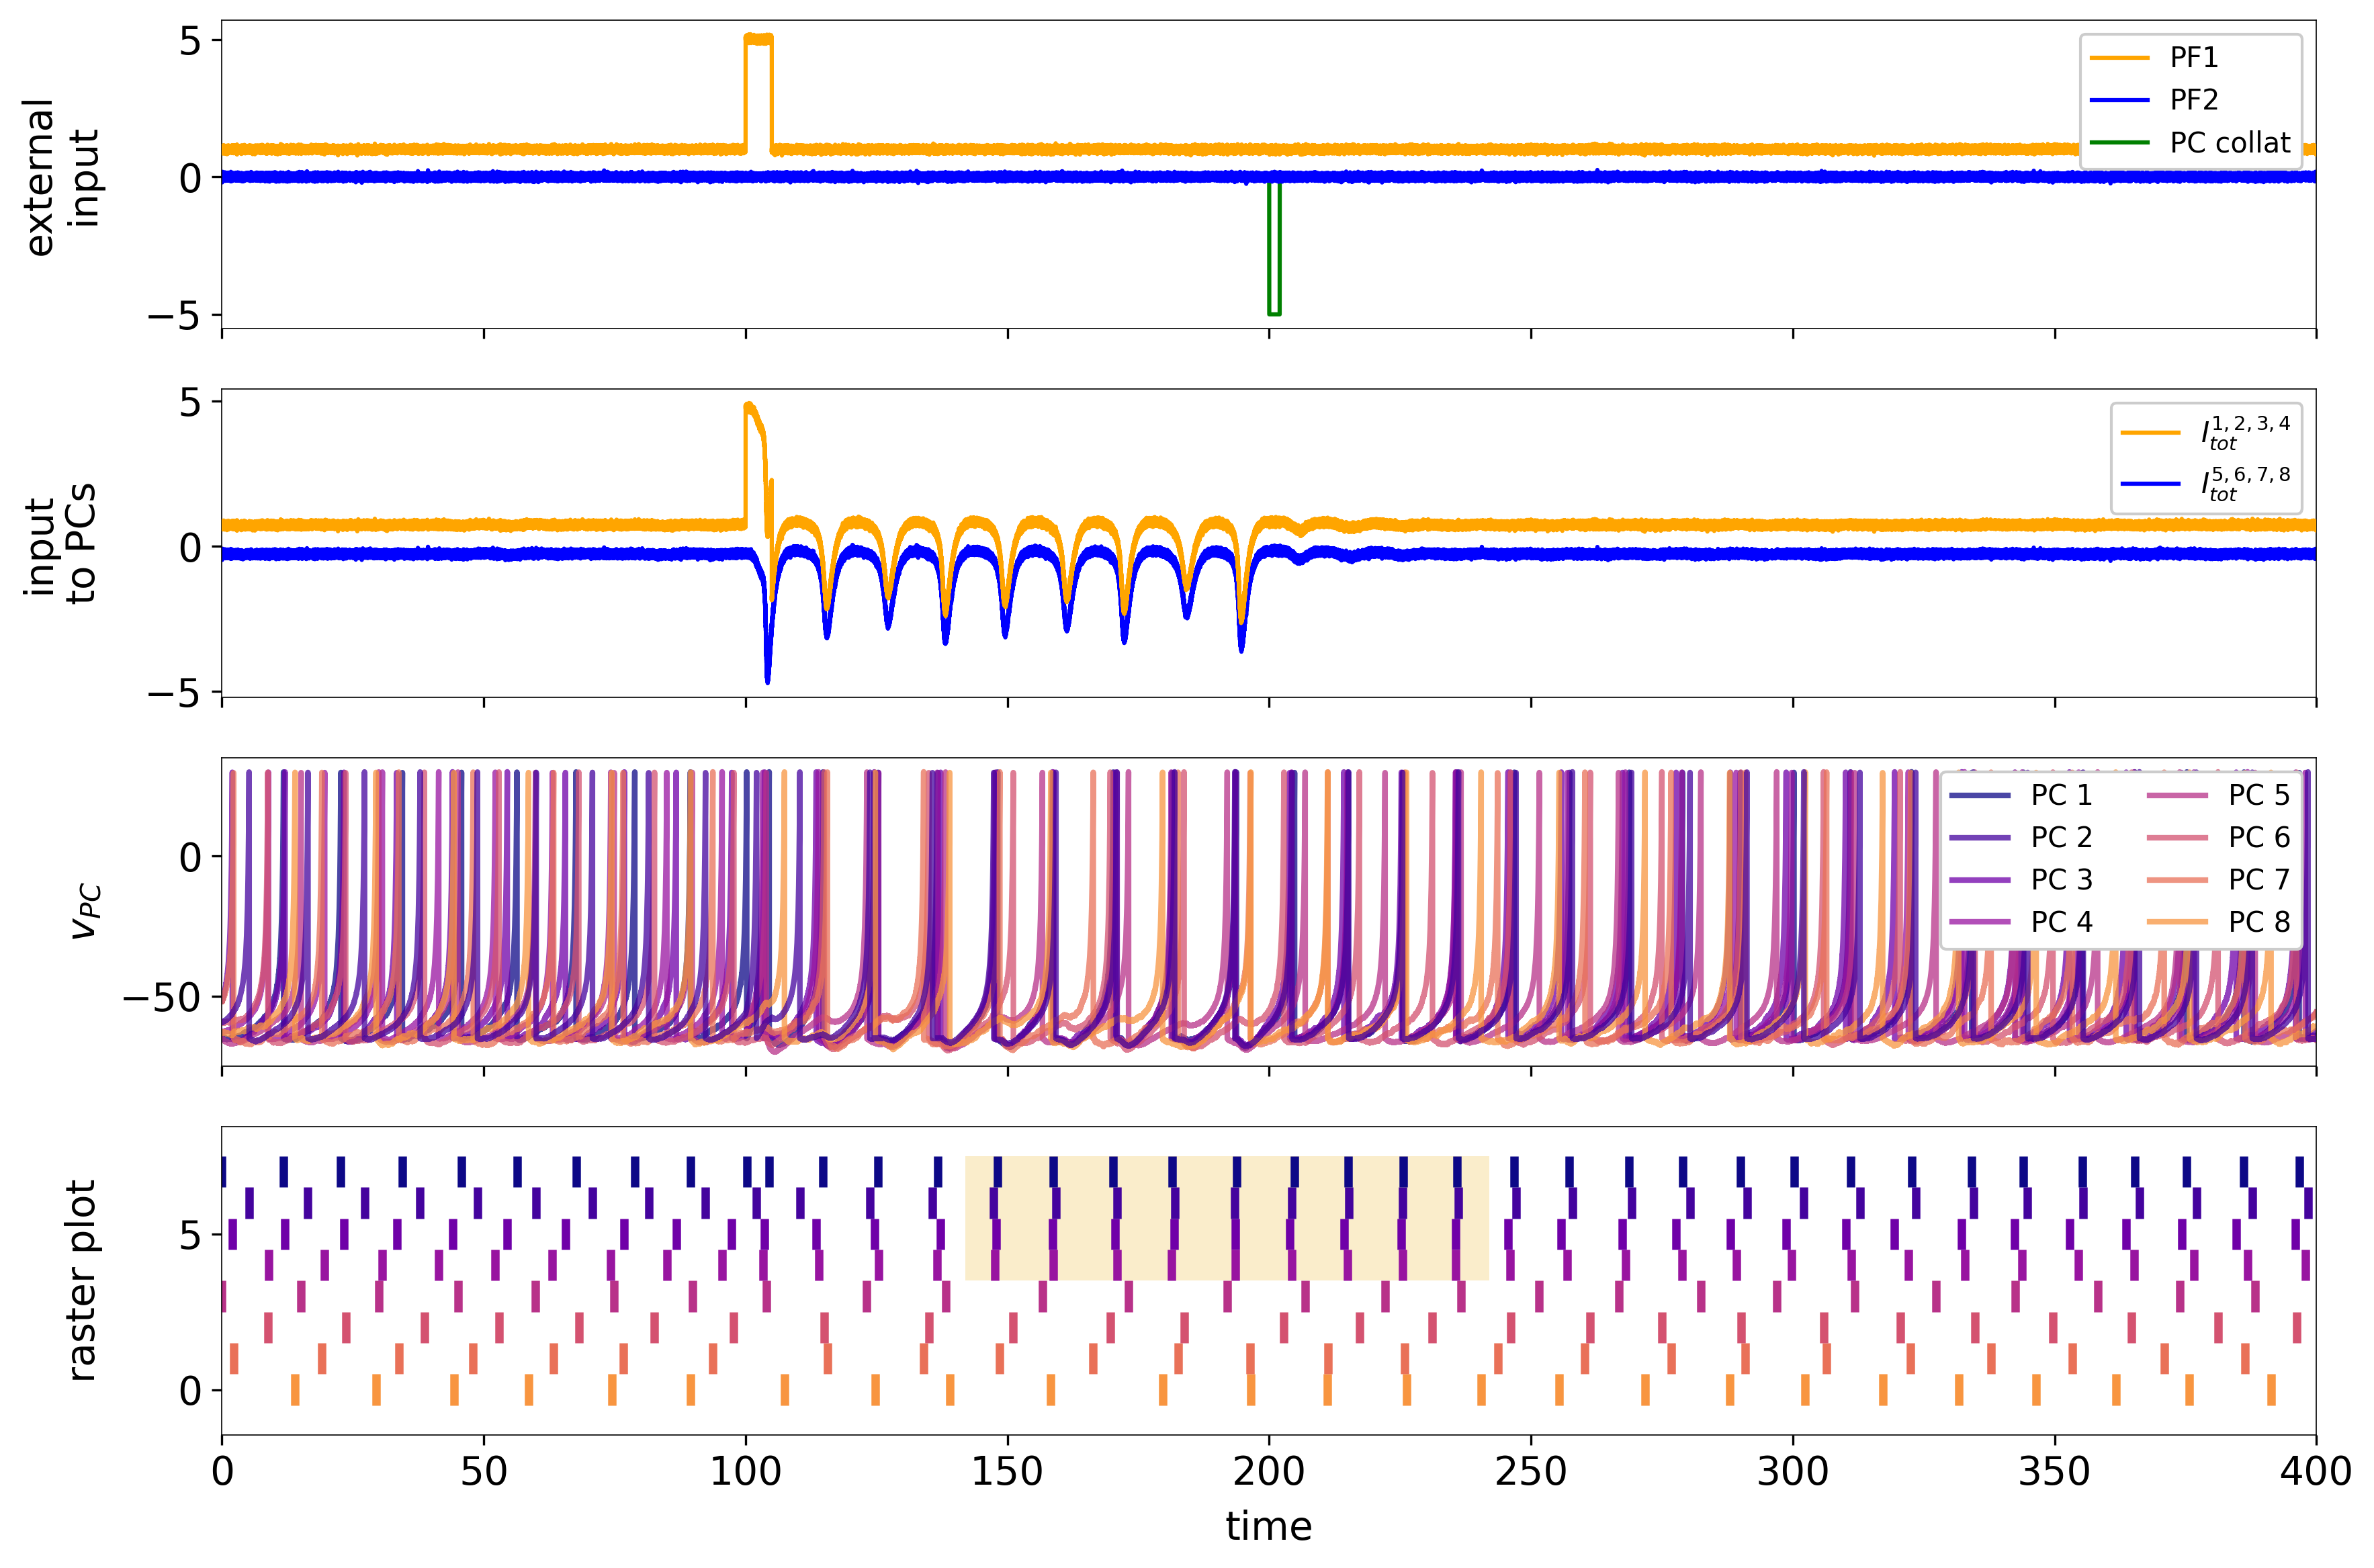

In [ ]:
from matplotlib.patches import Rectangle
from matplotlib.ticker import FormatStrFormatter
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 14#9
plt.rcParams['legend.fontsize'] = 10#7.
plt.rcParams['lines.markersize'] = 5
plt.rcParams['axes.labelsize'] = 14#9
plt.rcParams['axes.labelpad'] = 6
plt.rcParams['axes.linewidth'] = '0.4'
plt.rcParams['font.serif'] = 'Helvetica'
plt.rc('axes', axisbelow=True)
plt.rcParams['figure.dpi'] = 300

# Generating subplots
fig, ax = plt.subplots(4, 1, figsize=(12,8), sharex=True)
color = plt.cm.plasma(np.linspace(0,0.75,N[1]))

# Plotting injected current I
times = [float(STEP*k) for k in range(len(PF1_plt))]
ax[0].plot(times, PF1_plt, color='orange', label='PF1', zorder=3)
ax[0].plot(times, PF2*math.sqrt(STEP), color='blue', label='PF2', zorder=2)
ax[0].plot(times, PC_BC, color='green', label='PC collat', zorder=1)
ax[0].set_ylabel('external\ninput')
ax[0].legend(loc='upper right', framealpha=1)

# Plotting output of BCs
times_v = [float(STEP*k) for k in range(len(v_MLI_list[0]))]
#ax[1].plot(times_v, Jc*np.array(s_MLI_list[0]), c='purple', label=r'BCs', zorder=10)
#ax[1].plot(times_v, create_input([I_back], [T])+create_input([1, 5, 1], [100, 2, 398])+Jb*np.array(s_MLI_list[1]), c='red', label=r'BCs', zorder=1)
#ax[1].plot(times_v, create_input([I_back], [T])+Jb*np.array(s_MLI_list[0]), c='blue', label=r'BCs', zorder=0)

#ax[1].plot(times_v, I_back+PF1+Jb*np.array(s_MLI_list[1]), c='red', label=r'BCs', zorder=1)
#ax[1].plot(times_v, I_back+PF1+Jb*np.array(s_MLI_list[0]), c='blue', label=r'BCs', zorder=0)

ax[1].plot(times_v, PF1_plt+Jb1*np.array(s_MLI_list[1])+Jb2*np.array(s_MLI_list[0]), c='orange', label='$I_{tot}^{1,2,3,4}$', zorder=3)
ax[1].plot(times_v, PF2*math.sqrt(STEP)+Jb1*np.array(s_MLI_list[1])+Jb2*np.array(s_MLI_list[0]), c='blue', label='$I_{tot}^{5,6,7,8}$', zorder=2)
#ax[1].plot(times_v, 0.4225*np.ones_like(s_MLI_list[1]), c='k', alpha=.5, label=r'$I_{crit}$')
ax[1].set_ylabel('input\nto PCs')
ax[1].legend(loc='upper right', framealpha=1)

# Plotting voltage of PCs
for n in range(N[1]):
    if n ==1:
        ax[2].plot(times_v, v_PC_list[n], label=f'PC {n+1}', linestyle='-', linewidth=2, alpha=.75, c=color[n], zorder=4)
    else:
        ax[2].plot(times_v, v_PC_list[n], label=f'PC {n+1}', linestyle='-', linewidth=2, alpha=.75, c=color[n])

ax[2].set_ylabel(r'$v_{PC}$')
ax[2].legend(loc='upper right', framealpha=1, ncol=2)

# Plotting raster plot
ax[3].eventplot(raster[::-1], orientation='horizontal', colors=color[::-1], linewidths=3)
ax[3].set_xlabel('time')
ax[3].set_xlim(0, 400)
ax[3].set_ylabel('raster plot')
ax[3].add_patch((Rectangle((142, 3.5), 100, 4, facecolor='#FAEDCB')))

fig.align_ylabels(ax)
plt.show()

# LC-LC

In [ ]:
from jax import jit, numpy as jnp
import numpy as np
import math, jax, tqdm, os, matplotlib, random
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams
from matplotlib.colors import ListedColormap

STEP=0.001

# PC properties: class 1 Izhikevich neuron
a = 0.2
b = 0.26
c = -65
d = 0

''' INTERNEURONS SIMULATION '''
def Analytical_MLI(v1, v2, r1, r2, s1, s2, I, I_BC):
    r1_dot = (delta/(tau_m*math.pi) + 2*r1*v1 - g1*r1)/tau_m
    r2_dot = (delta/(tau_m*math.pi) + 2*r2*v2 - g2*r2)/tau_m
    v1_dot = (v1**2 + eta_mean + J1*tau_m*s1 + Jc*tau_m*s2  + I - (math.pi*tau_m*r1)**2)/tau_m
    v2_dot = (v2**2 + eta_mean + J2*tau_m*s2 + Jc*tau_m*s1  + I + I_BC - (math.pi*tau_m*r2)**2)/tau_m
    s1_dot = (-s1 + r1)/tau_d
    s2_dot = (-s2 + r2)/tau_d

    return v1_dot, v2_dot, r1_dot, r2_dot, s1_dot, s2_dot

def make_step_MLI(v, r, s, I, I_BC):
    v1, v2 = v[0], v[1]
    r1, r2 = r[0], r[1]
    s1, s2 = s[0], s[1]

    dv1, dv2, dr1, dr2, ds1, ds2 = Analytical_MLI(v1, v2, r1, r2, s1, s2, I, I_BC)

    v1_next = v1 + STEP*dv1
    v2_next = v2 + STEP*dv2
    r1_next = r1 + STEP*dr1
    r2_next = r2 + STEP*dr2
    s1_next = s1 + STEP*ds1
    s2_next = s2 + STEP*ds2

    return [v1_next, v2_next], [r1_next, r2_next], [s1_next, s2_next]

''' PURKINJE CELL SIMULATION '''
def Izh_PC(t, v, u, I):
    dv = 0.04*v**2 + 5*v + 140 - u + I
    du = a*(b*v-u)

    return dv, du

def make_step_PC(t, v, u, I):
    dv, du = Izh_PC(t, v, u, I)
    v_next, u_next = v + STEP*dv, u + STEP*du

    if isinstance(v, np.ndarray):
        v_next[v_next > 30] = c
        u_next[v_next > 30] = u[v_next > 30] + d
    else:
        if v_next > 30:
            v_next = c

    return v_next, u_next

def create_input(values, durations, STEP=STEP):
    input = []
    for k in range(len(values)):
        for t in np.arange(0, durations[k], STEP):
            input.append(values[k])
    return np.array(input)

def create_noisy_input(values, durations, sigma, STEP=STEP):
    input = []
    dW = np.random.randn(int(sum(durations)/STEP))
    for k in range(len(values)):
        for t in np.arange(0, durations[k], STEP):
            input.append(values[k])

    return np.array(input) + sigma*dW/math.sqrt(STEP)

In [ ]:
def initial_conditions(T, STEP, Jc, Jb1, Jb2, eta_mean, delta, tau_m, tau_d, I_background):
    v_PC_IC, u_PC_IC = [], []

    # Arbitrarily initialize BCs
    v_MLI, r_MLI, s_MLI = [0, -10], [0, 0], [0, 0] # Start in SF regime

    # Arbitrarily initialize PC
    v_PC = -60
    u_PC = 0

    for t in tqdm.tqdm(np.arange(0, T, STEP)):
        v_PC_IC.append(v_PC)
        u_PC_IC.append(u_PC)

        # Input to PC
        I_PC = Jb1*s_MLI[1] + Jb2*s_MLI[0] + I_back + 1 #PF receives input from mean BCs, background input=3, PF1=1 and PF2=0

        # Input to MLIs
        I_MLI = 1 # MLIs receive input from PF1=1 and PF2=0
        I_BC = 0 # BCs receive input from PC=0

        # Compute next value of BCs and PCs
        v_next_MLI, r_next_MLI, s_next_MLI = make_step_MLI(v_MLI, r_MLI, s_MLI, I_MLI, I_BC)
        v_next_PC, u_next_PC = make_step_PC(t, v_PC, u_PC, I_PC)

        # Update values
        v_PC, v_MLI = v_next_PC, v_next_MLI
        u_PC, r_MLI, s_MLI = u_next_PC, r_next_MLI, s_next_MLI

    v_PC_IC, u_PC_IC = np.array(v_PC_IC), np.array(u_PC_IC)
    spikes = np.where(v_PC_IC == c)[0]
    T1, T2 = spikes[-1], spikes[-2]
    inc = int((T2-T1)/4)

    return [v_PC_IC[T1], v_PC_IC[T1+2*inc], v_PC_IC[T1+inc], v_PC_IC[T1+3*inc]], [u_PC_IC[T1], u_PC_IC[T1+2*inc], u_PC_IC[T1+inc], u_PC_IC[T1+3*inc]], v_MLI, r_MLI, s_MLI

In [ ]:
# Parameters
T = 600
STEP = 0.001
VR = -100
VP = 100

# Number of neurons in BCs, PCs
N = [1000, 8]

# Electrical coupling strength in BCs
g1, g2 = 1, 1
J1, J2 = -2.5, -1

# Cross chemical coupling strength between MLIs
Jc = -8

# Cross chemical coupling strength between  BCs and PCs
Jb1= -6
Jb2= -4

# BC properties
tau_m = 2.8
tau_d = 2
eta_mean = 0
delta = .3

I_back = 1.6

# Background noise to PCs (iid)
sigma1, sigma2, sigma3, sigma4 = 0., 0., 0., 0.
I_background1, I_background2, I_background3, I_background4 = create_noisy_input([I_back], [T], sigma1), create_noisy_input([I_back], [T], sigma2), create_noisy_input([I_back], [T], sigma3), create_noisy_input([I_back], [T], sigma4)
I_background5, I_background6, I_background7, I_background8 = create_noisy_input([I_back], [T], sigma1), create_noisy_input([I_back], [T], sigma2), create_noisy_input([I_back], [T], sigma3), create_noisy_input([I_back], [T], sigma4)
I_background = np.array([I_background1, I_background2, I_background3, I_background4, I_background5, I_background6, I_background7, I_background8])

# Parallel Fibre inputs (iid)
sigma1, sigma2 = 0., 0.
dW1, dW2 = np.random.randn(int(T/STEP)), np.random.randn(int(T/STEP))
PF1 = create_noisy_input([1], [T], sigma1)

# Setting up PF1 for plots
PF1_plt = PF1*math.sqrt(STEP)
PF1_plt[int(100/STEP):int(105/STEP)] = 5

PF1[int(100/STEP):int(105/STEP)] = 5 # no noise in pulse

PF2 = create_noisy_input([0.], [T], sigma2)

'''
# Background noise to PCs
I_background = create_input([I_back], [T])

# Parallel Fibre inputs (iid)
PF1 = create_input([1], [T])
PF1[int(100/STEP):int(105/STEP)] = 5
PF2 = create_input([0.], [T])
'''

PC_BC = create_input([0, -5, 0], [250, 5, 345]) # Pulse inhibition that shuts down oscillations, no noise

w_PF1_PC = np.concatenate((np.ones(int(N[1]/2)), np.zeros(int(N[1]/2))), axis=0)
w_PF2_PC = np.concatenate((np.zeros(int(N[1]/2)), np.ones(int(N[1]/2))), axis=0)

# Compute splayed state ICs
v_PC_ICs, u_PC_ICs, v_MLI_ICs, r_MLI_ICs, s_MLI_ICs = initial_conditions(T, STEP, Jc, Jb1, Jb2, eta_mean, delta, tau_m, tau_d, I_background)


''' RUN THE SIMULATIONS OF MLIs and PCs '''
def run():
    # Initialize BCs
    v_MLI, r_MLI, s_MLI = v_MLI_ICs, r_MLI_ICs, s_MLI_ICs

    # Initialize PCs
    v_PC = [v_PC_ICs]+[v_PC_ICs]
    u_PC = [u_PC_ICs]+[u_PC_ICs]

    v_PC, u_PC = np.array(v_PC).flatten(), np.array(u_PC).flatten()

    for t in tqdm.tqdm(np.arange(0, T, STEP)):

        # Save values to list
        v_MLI_list[0].append(v_MLI[0])
        v_MLI_list[1].append(v_MLI[1])
        r_MLI_list[0].append(r_MLI[0])
        r_MLI_list[1].append(r_MLI[1])
        s_MLI_list[0].append(s_MLI[0])
        s_MLI_list[1].append(s_MLI[1])

        for n in range(N[1]):
            v_PC_list[n].append(v_PC[n])
            u_PC_list[n].append(u_PC[n])

        # Input to PCs
        I_PC = Jb1*s_MLI[1] + Jb2*s_MLI[0] + w_PF1_PC*PF1[int(t/STEP)-1] + w_PF2_PC*PF2[int(t/STEP)-1] + I_background[:,int(t/STEP)-1]

        # Input to BCs
        I_MLI = PF1[int(t/STEP)-1]+ PF2[int(t/STEP)-1]
        I_BC = PC_BC[int(t/STEP)-1]

        # Compute next value of BCs and PCs
        v_next_MLI, r_next_MLI, s_next_MLI = make_step_MLI(v_MLI, r_MLI, s_MLI, I_MLI, I_BC)
        v_next_PC, u_next_PC = make_step_PC(t, v_PC, u_PC, I_PC)

        # Update values
        v_MLI, v_PC = v_next_MLI, v_next_PC
        u_PC = u_next_PC
        r_MLI = r_next_MLI
        s_MLI = s_next_MLI

''' MAIN '''

v_MLI_list = [[], []]
r_MLI_list = [[], []]
s_MLI_list = [[], []]
v_PC_list = [[] for k in range(N[1])]
u_PC_list = [[] for k in range(N[1])]

run()

v_PC_list = np.array(v_PC_list)

raster = [[] for k in range(N[1])]
for k in range(len(v_PC_list)):
    raster[k] = np.where(v_PC_list[k] == c)[0]*STEP

100%|██████████| 600000/600000 [00:48<00:00, 12482.44it/s]


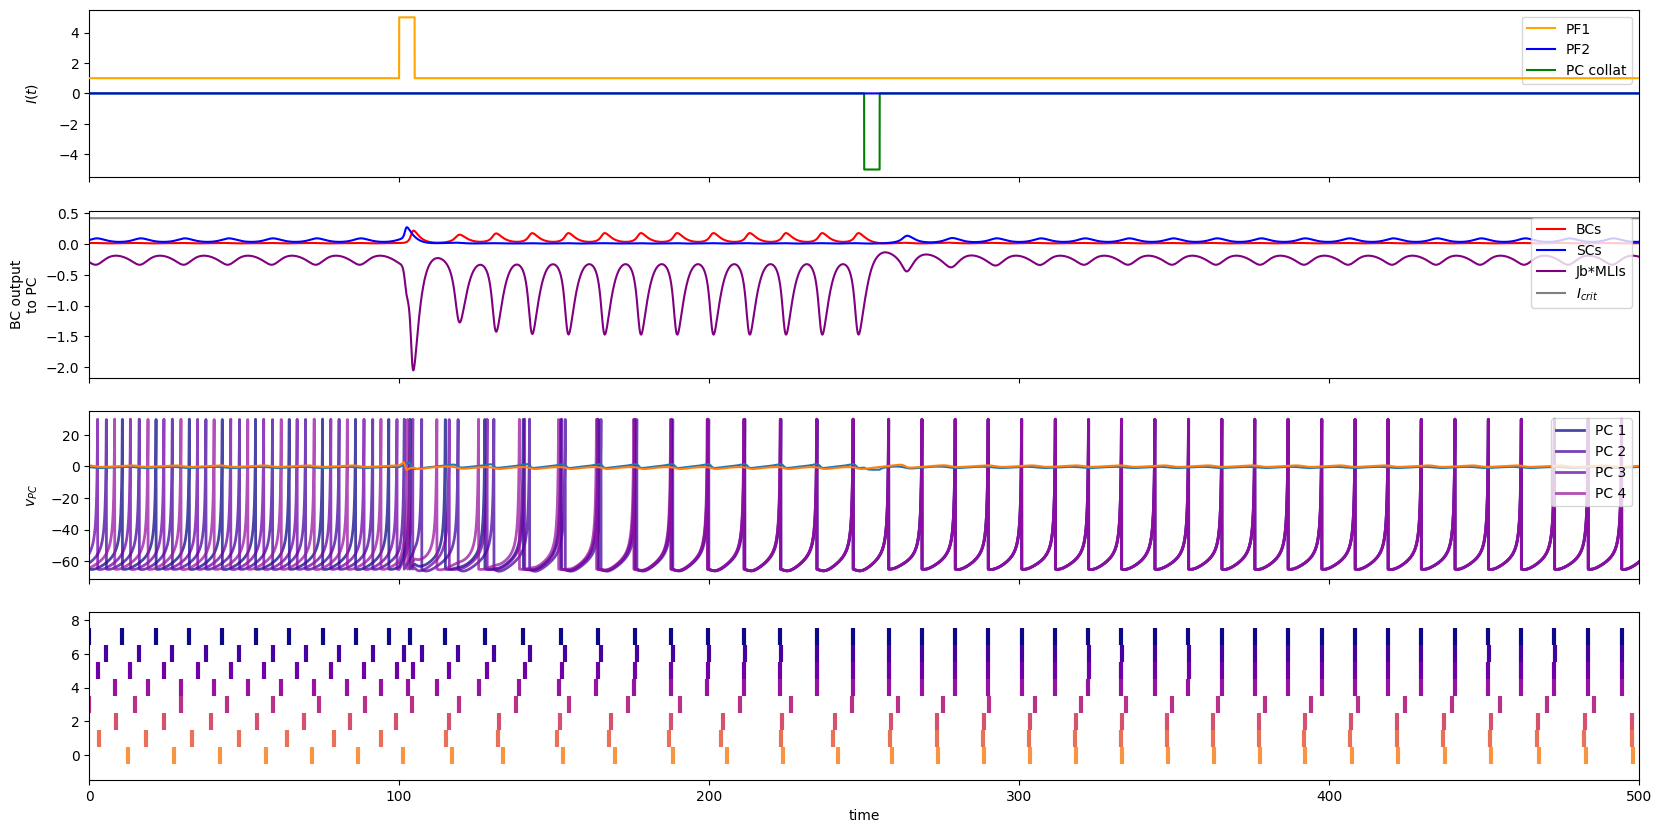

In [ ]:
from matplotlib.patches import Rectangle

# Generating subplots
fig, ax = plt.subplots(4, 1, figsize=(20,10), sharex=True)
color = plt.cm.plasma(np.linspace(0,0.75,N[1]))

# Plotting injected current I
times = [float(STEP*k) for k in range(len(PF1))]
ax[0].plot(times, PF1, color='orange', label='PF1', zorder=10)
ax[0].plot(times, PF2, color='blue', label='PF2', zorder=9)
ax[0].plot(times, PC_BC, color='green', label='PC collat')
ax[0].set_ylabel(r'$I(t)$')
ax[0].legend(loc='upper right')

# Plotting output of BCs
times_v = [float(STEP*k) for k in range(len(v_MLI_list[0]))]
#ax[1].plot(times_v, Jc*np.array(s_MLI_list[0]), c='purple', label=r'BCs', zorder=10)
#ax[1].plot(times_v, create_input([I_back], [T])+create_input([1, 5, 1], [100, 2, 398])+Jb*np.array(s_MLI_list[1]), c='red', label=r'BCs', zorder=1)
#ax[1].plot(times_v, create_input([I_back], [T])+Jb*np.array(s_MLI_list[0]), c='blue', label=r'BCs', zorder=0)

#ax[1].plot(times_v, I_back+PF1+Jb*np.array(s_MLI_list[1]), c='red', label=r'BCs', zorder=1)
#ax[1].plot(times_v, I_back+PF1+Jb*np.array(s_MLI_list[0]), c='blue', label=r'BCs', zorder=0)

ax[1].plot(times_v, np.array(s_MLI_list[1]), c='red', label=r'BCs', zorder=2)
ax[1].plot(times_v, np.array(s_MLI_list[0]), c='blue', label=r'SCs', zorder=2)
ax[1].plot(times_v, Jb2*np.array(s_MLI_list[0])+Jb1*np.array(s_MLI_list[1]), c='purple', label=r'Jb*MLIs', zorder=2)

#ax[1].plot(times_v, I_back+PF2+Jb1*np.array(s_MLI_list[1])+Jb2*np.array(s_MLI_list[0]), c='blue', label=r'BCs', zorder=2)
#ax[1].plot(times_v, I_back+PF1+Jb1*np.array(s_MLI_list[1])+Jb2*np.array(s_MLI_list[0]), c='purple', label=r'BCs', zorder=2)

#ax[1].plot(times_v, PF1+Jc*np.array(s_BC_list), c='red', label=r'total PC1 and 2', zorder=10)
#ax[1].plot(times_v, PF2+Jc*np.array(s_BC_list), c='blue', label=r'total PC3 and 4')
ax[1].plot(times_v, 0.4225*np.ones_like(s_MLI_list[1]), c='k', alpha=.5, label=r'$I_{crit}$')

ax[1].set_ylabel('BC output\nto PC')
ax[1].legend(loc='upper right')

# Plotting voltage of PCs

for n in range(N[1]):
    if n < 4:
        ax[2].plot(times_v, v_PC_list[n], label=f'PC {n+1}', linestyle='-', linewidth=2, alpha=.75, c=color[n])
ax[2].plot(times_v, v_MLI_list[1])
ax[2].plot(times_v, v_MLI_list[0])

ax[2].set_ylabel(r'$v_{PC}$')
ax[2].legend(loc='upper right')

# Plotting raster plot
ax[3].eventplot(raster[::-1], orientation='horizontal', colors=color[::-1], linewidths=3)
ax[3].set_xlabel('time')
ax[3].set_xlim(0, 500)
#ax[3].add_patch((Rectangle((100, 1.5), 100, 4, facecolor='#FAEDCB')))

fig.align_ylabels(ax)
plt.show()

# Misc: additionnal simulations with other parameters

In [ ]:
from jax import jit, numpy as jnp
import numpy as np
import math, jax, tqdm, os, matplotlib, random
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams
from matplotlib.colors import ListedColormap

# PC properties: class 1 Izhikevich neuron
a = 0.2
b = 0.26
c = -65
d = 0

''' INTERNEURONS SIMULATION '''
def Analytical_MLI(v1, v2, r1, r2, s1, s2, I, I_BC):
    r1_dot = (delta/(tau_m*math.pi) + 2*r1*v1 - g1*r1)/tau_m
    r2_dot = (delta/(tau_m*math.pi) + 2*r2*v2 - g2*r2)/tau_m
    v1_dot = (v1**2 + eta_mean + J1*tau_m*s1 + Jc*tau_m*s2  + I - (math.pi*tau_m*r1)**2)/tau_m
    v2_dot = (v2**2 + eta_mean + J2*tau_m*s2 + Jc*tau_m*s1  + I + I_BC - (math.pi*tau_m*r2)**2)/tau_m
    s1_dot = (-s1 + r1)/tau_d
    s2_dot = (-s2 + r2)/tau_d

    return v1_dot, v2_dot, r1_dot, r2_dot, s1_dot, s2_dot

def make_step_MLI(v, r, s, I, I_BC):
    v1, v2 = v[0], v[1]
    r1, r2 = r[0], r[1]
    s1, s2 = s[0], s[1]

    dv1, dv2, dr1, dr2, ds1, ds2 = Analytical_MLI(v1, v2, r1, r2, s1, s2, I, I_BC)

    v1_next = v1 + STEP*dv1
    v2_next = v2 + STEP*dv2
    r1_next = r1 + STEP*dr1
    r2_next = r2 + STEP*dr2
    s1_next = s1 + STEP*ds1
    s2_next = s2 + STEP*ds2

    return [v1_next, v2_next], [r1_next, r2_next], [s1_next, s2_next]

''' PURKINJE CELL SIMULATION '''
def Izh_PC(t, v, u, I):
    dv = 0.04*v**2 + 5*v + 140 - u + I
    du = a*(b*v-u)

    return dv, du

def make_step_PC(t, v, u, I):
    dv, du = Izh_PC(t, v, u, I)
    v_next, u_next = v + STEP*dv, u + STEP*du

    if isinstance(v, np.ndarray):
        v_next[v_next >= 30] = c
        u_next[v_next >= 30] = u[v_next >= 30] + d
    else:
        if v_next >= 30:
            v_next = c

    return v_next, u_next

def create_input(values, durations, STEP=1e-3):
    input = []
    for k in range(len(values)):
        for t in np.arange(0, durations[k], STEP):
            input.append(values[k])

    return np.array(input)

In [ ]:
def initial_conditions(T, STEP, Jc, Jb, eta_mean, delta, tau_m, tau_d, I_background):
    v_PC_IC, u_PC_IC = [], []

    # Arbitrarily initialize BCs
    v_MLI, r_MLI, s_MLI = [0, -10], [0, 0], [0, 0] # Start in SF regime

    # Arbitrarily initialize PC
    v_PC = -60
    u_PC = 0

    for t in tqdm.tqdm(np.arange(0, T, STEP)):
        v_PC_IC.append(v_PC)
        u_PC_IC.append(u_PC)

        # Input to PC
        I_PC = Jb*s_MLI[1] + I_background[int(t/STEP)-1] + 1 # PF receives input from BCs only

        # Input to MLIs
        I_MLI = 1
        I_BC = 0

        # Compute next value of BCs and PCs
        v_next_MLI, r_next_MLI, s_next_MLI = make_step_MLI(v_MLI, r_MLI, s_MLI, I_MLI, I_BC)
        v_next_PC, u_next_PC = make_step_PC(t, v_PC, u_PC, I_PC)

        # Update values
        v_PC, v_MLI = v_next_PC, v_next_MLI
        u_PC, r_MLI, s_MLI = u_next_PC, r_next_MLI, s_next_MLI

    v_PC_IC, u_PC_IC = np.array(v_PC_IC), np.array(u_PC_IC)
    spikes = np.where(v_PC_IC == c)[0]
    T1, T2 = spikes[-1], spikes[-2]
    inc = int((T2-T1)/4)

    return [v_PC_IC[T1], v_PC_IC[T1+inc], v_PC_IC[T1+2*inc], v_PC_IC[T1+3*inc]], [u_PC_IC[T1], u_PC_IC[T1+inc], u_PC_IC[T1+2*inc], u_PC_IC[T1+3*inc]], v_MLI, r_MLI, s_MLI

In [ ]:
# Parameters
T = 400
STEP = 1e-3
VR = -100
VP = 100

# Number of neurons in BCs, PCs
N = [1000, 4]

# Electrical coupling strength in BCs
g1, g2 = 0, 1.44
J1, J2 = -1, 0

Jc = -6 # Cross chemical coupling strength between MLIs
Jb = -10 # Cross chemical coupling strength between  BCs and PCs

# BC properties
tau_m = 2.8
tau_d = 2
eta_mean = 1
delta = .3

I_base = 0
I_step = 1.5
I_back = 3

I_background = create_input([I_back], [T])
PF1 = create_input([1, 5, 1], [100, 2, 298])
PF2 = create_input([I_base], [T])

PC_BC = create_input([0, -5, 0], [200, 5, 195]) # Pulse inhibition that shuts down oscillations

w_PF1_PC = np.concatenate((np.ones(int(N[1]/2)), np.zeros(int(N[1]/2))), axis=0)
w_PF2_PC = np.concatenate((np.zeros(int(N[1]/2)), np.ones(int(N[1]/2))), axis=0)

# Compute splayed state ICs
v_PC_ICs, u_PC_ICs, v_MLI_ICs, r_MLI_ICs, s_MLI_ICs = initial_conditions(T, STEP, Jc, Jb, eta_mean, delta, tau_m, tau_d, I_background)


''' RUN THE SIMULATIONS OF MLIs and PCs '''
def run():
    # Initialize BCs
    v_MLI, r_MLI, s_MLI = v_MLI_ICs, r_MLI_ICs, s_MLI_ICs

    # Initialize PCs
    v_PC = v_PC_ICs
    u_PC = u_PC_ICs

    c = list(zip(v_PC, u_PC))
    random.shuffle(c)
    v_PC, u_PC = zip(*c)

    v_PC, u_PC = np.array(v_PC), np.array(u_PC)

    for t in tqdm.tqdm(np.arange(0, T, STEP)):

        # Save values to list
        v_MLI_list[0].append(v_MLI[0])
        v_MLI_list[1].append(v_MLI[1])
        r_MLI_list[0].append(r_MLI[0])
        r_MLI_list[1].append(r_MLI[1])
        s_MLI_list[0].append(s_MLI[0])
        s_MLI_list[1].append(s_MLI[1])

        for n in range(N[1]):
            v_PC_list[n].append(v_PC[n])
            u_PC_list[n].append(u_PC[n])

        # Input to PCs
        I_PC = Jb*s_MLI[1] + w_PF1_PC*PF1[int(t/STEP)-1] + w_PF2_PC*PF2[int(t/STEP)-1] + I_background[int(t/STEP)-1]

        # Input to BCs
        I_MLI = PF1[int(t/STEP)-1]+ PF2[int(t/STEP)-1]
        I_BC = PC_BC[int(t/STEP)-1]

        # Compute next value of BCs and PCs
        v_next_MLI, r_next_MLI, s_next_MLI = make_step_MLI(v_MLI, r_MLI, s_MLI, I_MLI, I_BC)
        v_next_PC, u_next_PC = make_step_PC(t, v_PC, u_PC, I_PC)

        # Update values
        v_MLI, v_PC = v_next_MLI, v_next_PC
        u_PC = u_next_PC
        r_MLI = r_next_MLI
        s_MLI = s_next_MLI

''' MAIN '''

v_MLI_list = [[], []]
r_MLI_list = [[], []]
s_MLI_list = [[], []]
v_PC_list = [[] for k in range(N[1])]
u_PC_list = [[] for k in range(N[1])]

run()

v_PC_list = np.array(v_PC_list)

raster = [[] for k in range(4)]
for k in range(len(v_PC_list)):
    raster[k] = np.where(v_PC_list[k] == c)[0]*STEP

100%|██████████| 400000/400000 [00:20<00:00, 19864.43it/s]


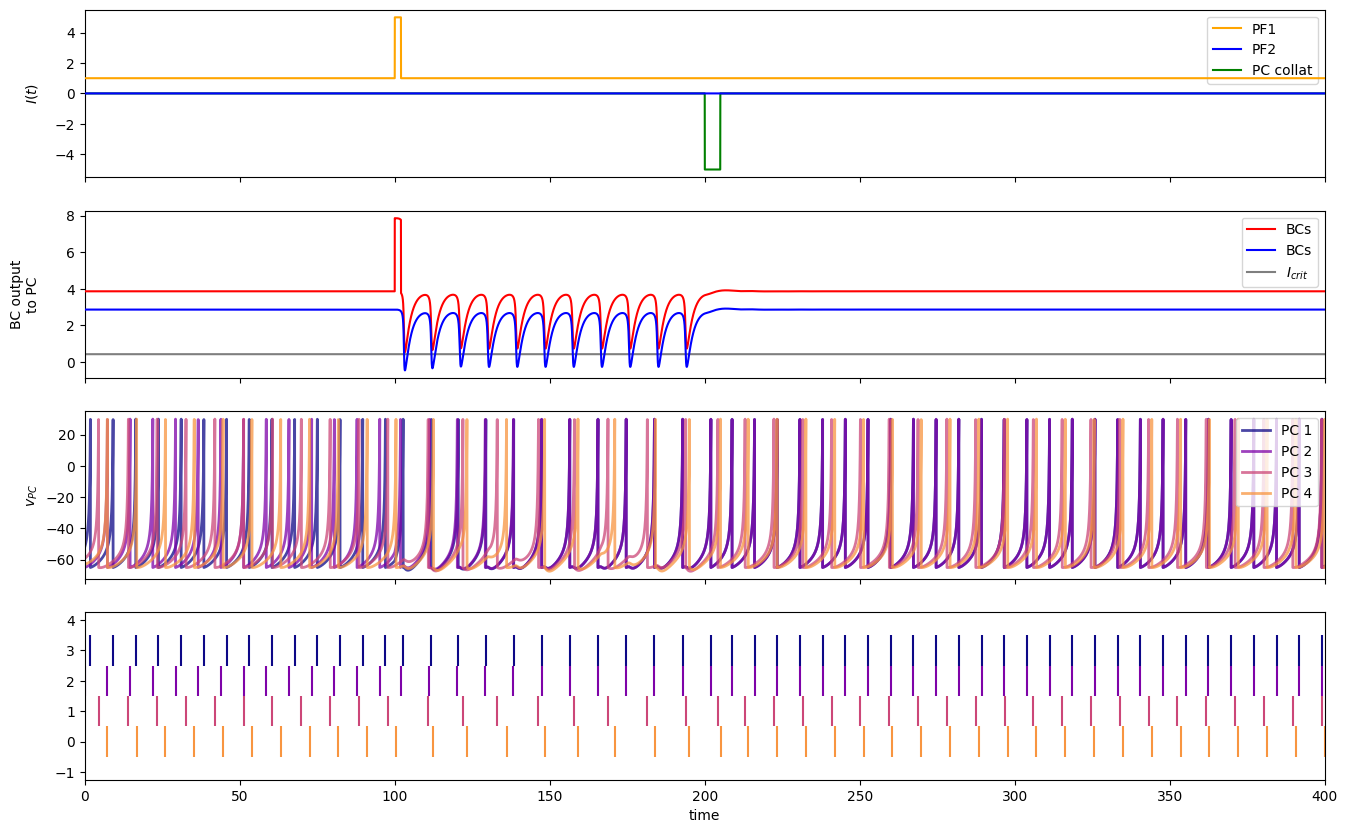

In [ ]:
# Generating subplots
fig, ax = plt.subplots(4, 1, figsize=(16,10), sharex=True)
color = plt.cm.plasma(np.linspace(0,0.75,N[1]))

# Plotting injected current I
times = [float(STEP*k) for k in range(len(I_background))]
ax[0].plot(times, PF1, color='orange', label='PF1', zorder=10)
ax[0].plot(times, PF2, color='blue', label='PF2', zorder=9)
ax[0].plot(times, PC_BC, color='green', label='PC collat')
ax[0].set_ylabel(r'$I(t)$')
ax[0].legend(loc='upper right')

# Plotting output of BCs
times_v = [float(STEP*k) for k in range(len(v_MLI_list[0]))]
#ax[1].plot(times_v, Jc*np.array(s_MLI_list[0]), c='purple', label=r'BCs', zorder=10)
ax[1].plot(times_v, I_background+PF1+Jb*np.array(s_MLI_list[1]), c='red', label=r'BCs', zorder=10)
ax[1].plot(times_v, I_background+PF2+Jb*np.array(s_MLI_list[1]), c='blue', label=r'BCs', zorder=10)
#ax[1].plot(times_v, PF1+Jc*np.array(s_BC_list), c='red', label=r'total PC1 and 2', zorder=10)
#ax[1].plot(times_v, PF2+Jc*np.array(s_BC_list), c='blue', label=r'total PC3 and 4')
ax[1].plot(times_v, 0.4225*np.ones_like(s_MLI_list[1]), c='k', alpha=.5, label=r'$I_{crit}$')

ax[1].set_ylabel('BC output\nto PC')
ax[1].legend(loc='upper right')

# Plotting voltage of PCs
for n in range(N[1]):
    ax[2].plot(times_v, v_PC_list[n], label=f'PC {n+1}', linestyle='-', linewidth=2, alpha=.75, c=color[n])

ax[2].set_ylabel(r'$v_{PC}$')
ax[2].legend(loc='upper right')

# Plotting raster plot
ax[3].eventplot(raster[::-1], orientation='horizontal', colors=color[::-1])
ax[3].set_xlabel('time')
ax[3].set_xlim(0, T)

fig.align_ylabels(ax)
plt.show()

In [ ]:
# Parameters
T = 500
STEP = 1e-3
VR = -100
VP = 100

# Number of neurons in BCs, PCs
N = [1000, 4]

# Electrical coupling strength in BCs
g1, g2 = 0, 1.44
J1, J2 = -1, 0

Jc = -6 # Cross chemical coupling strength between MLIs
Jb = -10 # Cross chemical coupling strength between  BCs and PCs

# BC properties
tau_m = 2.8
tau_d = 2
eta_mean = 1
delta = .3

I_back = 3

# Background noise to PCs (iid)
sigma1, sigma2, sigma3, sigma4 = .6, .6, .6, .6
I_background1, I_background2 = create_noisy_input([I_back], [T], sigma1), create_noisy_input([I_back], [T], sigma2)
I_background3, I_background4 = create_noisy_input([I_back], [T], sigma3), create_noisy_input([I_back], [T], sigma4)
I_background = np.array([I_background1, I_background2, I_background3, I_background4])

# Parallel Fibre inputs (iid)
sigma1, sigma2 = 0.1, 0.1
dW1, dW2 = np.random.randn(int(T/STEP)), np.random.randn(int(T/STEP))
PF1 = create_noisy_input([1], [T], sigma1)
PF1[int(100/STEP):int(102/STEP)] = 5 # no noise in pulse
PF2 = create_noisy_input([0], [T], sigma2)

PC_BC = create_input([0, -5, 0], [200, 5, 295]) # Pulse inhibition that shuts down oscillations, no noise

w_PF1_PC = np.concatenate((np.ones(int(N[1]/2)), np.zeros(int(N[1]/2))), axis=0)
w_PF2_PC = np.concatenate((np.zeros(int(N[1]/2)), np.ones(int(N[1]/2))), axis=0)

# Compute splayed state ICs
v_PC_ICs, u_PC_ICs, v_MLI_ICs, r_MLI_ICs, s_MLI_ICs = initial_conditions(T, STEP, Jc, Jb, eta_mean, delta, tau_m, tau_d, I_background)


''' RUN THE SIMULATIONS OF MLIs and PCs '''
def run():
    # Initialize BCs
    v_MLI, r_MLI, s_MLI = v_MLI_ICs, r_MLI_ICs, s_MLI_ICs

    # Initialize PCs
    v_PC = v_PC_ICs
    u_PC = u_PC_ICs

    #c = list(zip(v_PC, u_PC))
    #random.shuffle(c)
    #v_PC, u_PC = zip(*c)

    v_PC, u_PC = np.array(v_PC), np.array(u_PC)

    for t in tqdm.tqdm(np.arange(0, T, STEP)):

        # Save values to list
        v_MLI_list[0].append(v_MLI[0])
        v_MLI_list[1].append(v_MLI[1])
        r_MLI_list[0].append(r_MLI[0])
        r_MLI_list[1].append(r_MLI[1])
        s_MLI_list[0].append(s_MLI[0])
        s_MLI_list[1].append(s_MLI[1])

        for n in range(N[1]):
            v_PC_list[n].append(v_PC[n])
            u_PC_list[n].append(u_PC[n])

        # Input to PCs
        I_PC = Jb*s_MLI[1] + w_PF1_PC*PF1[int(t/STEP)-1] + w_PF2_PC*PF2[int(t/STEP)-1] + I_background[:,int(t/STEP)-1]

        # Input to BCs
        I_MLI = PF1[int(t/STEP)-1]+ PF2[int(t/STEP)-1]
        I_BC = PC_BC[int(t/STEP)-1]

        # Compute next value of BCs and PCs
        v_next_MLI, r_next_MLI, s_next_MLI = make_step_MLI(v_MLI, r_MLI, s_MLI, I_MLI, I_BC)
        v_next_PC, u_next_PC = make_step_PC(t, v_PC, u_PC, I_PC)

        # Update values
        v_MLI, v_PC = v_next_MLI, v_next_PC
        u_PC = u_next_PC
        r_MLI = r_next_MLI
        s_MLI = s_next_MLI

''' MAIN '''

v_MLI_list = [[], []]
r_MLI_list = [[], []]
s_MLI_list = [[], []]
v_PC_list = [[] for k in range(N[1])]
u_PC_list = [[] for k in range(N[1])]

run()

v_PC_list = np.array(v_PC_list)

raster = [[] for k in range(4)]
for k in range(len(v_PC_list)):
    raster[k] = np.where(v_PC_list[k] == c)[0]*STEP

100%|██████████| 500000/500000 [00:25<00:00, 19740.86it/s]


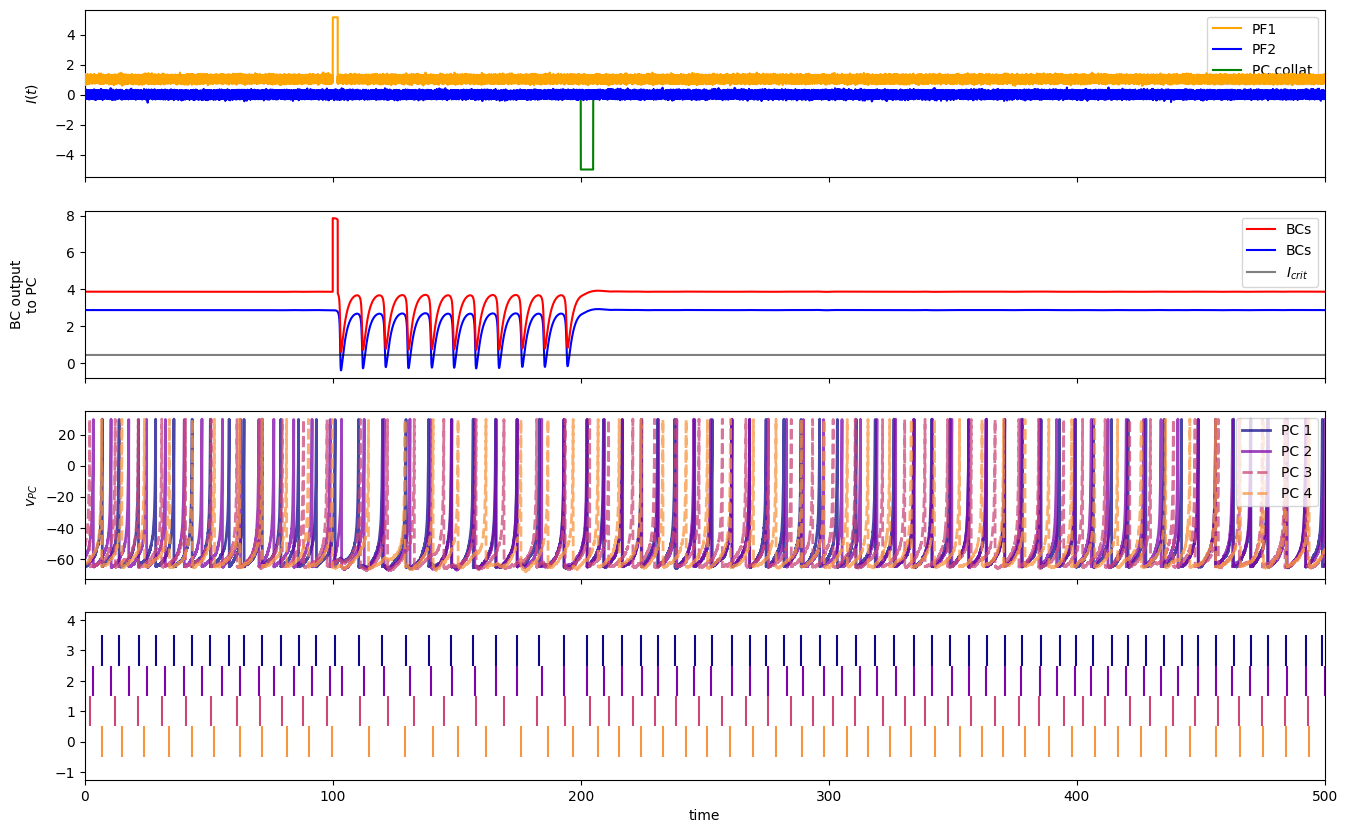

In [ ]:
# Generating subplots
fig, ax = plt.subplots(4, 1, figsize=(16,10), sharex=True)
color = plt.cm.plasma(np.linspace(0,0.75,N[1]))

# Plotting injected current I
times = [float(STEP*k) for k in range(len(PF1))]
ax[0].plot(times, PF1*math.sqrt(STEP)+create_input([1, 5, 1], [100, 2, 398]), color='orange', label='PF1', zorder=10)
ax[0].plot(times, PF2*math.sqrt(STEP), color='blue', label='PF2', zorder=9)
ax[0].plot(times, PC_BC, color='green', label='PC collat')
ax[0].set_ylabel(r'$I(t)$')
ax[0].legend(loc='upper right')

# Plotting output of BCs
times_v = [float(STEP*k) for k in range(len(v_MLI_list[0]))]
#ax[1].plot(times_v, Jc*np.array(s_MLI_list[0]), c='purple', label=r'BCs', zorder=10)
ax[1].plot(times_v, create_input([3], [T])+create_input([1, 5, 1], [100, 2, 398])+Jb*np.array(s_MLI_list[1]), c='red', label=r'BCs', zorder=1)
ax[1].plot(times_v, create_input([3], [T])+Jb*np.array(s_MLI_list[1]), c='blue', label=r'BCs', zorder=0)
#ax[1].plot(times_v, PF1+Jc*np.array(s_BC_list), c='red', label=r'total PC1 and 2', zorder=10)
#ax[1].plot(times_v, PF2+Jc*np.array(s_BC_list), c='blue', label=r'total PC3 and 4')
ax[1].plot(times_v, 0.4225*np.ones_like(s_MLI_list[1]), c='k', alpha=.5, label=r'$I_{crit}$')

ax[1].set_ylabel('BC output\nto PC')
ax[1].legend(loc='upper right')

# Plotting voltage of PCs
for n in range(N[1]):
    if n == 2 or n == 3:
        ax[2].plot(times_v, v_PC_list[n], label=f'PC {n+1}', linestyle='--', linewidth=2, alpha=.75, c=color[n])
    else:
        ax[2].plot(times_v, v_PC_list[n], label=f'PC {n+1}', linestyle='-', linewidth=2, alpha=.75, c=color[n])

ax[2].set_ylabel(r'$v_{PC}$')
ax[2].legend(loc='upper right')

# Plotting raster plot
ax[3].eventplot(raster[::-1], orientation='horizontal', colors=color[::-1])
ax[3].set_xlabel('time')
ax[3].set_xlim(0, T)

fig.align_ylabels(ax)
plt.show()